# 1. EXPLORATORY DATA ANALYSIS
It is process of getting insights from data as much as we can. It includes the following:


1. data collection
2. data cleaning (removing duplicates and handling missing values)
3. univariate analysis
4. bivariate analysis
5. multivariate analysis
6. with data visuallization

for understanding every aspect of data which is relevant for a use case.

---
We will be beginning to learn EDA by first loading our datset into a dataframe which is a variable for performing operations on data.
---

In [ ]:
# prompt: code snippet to get dataset from github

!wget -O dataset.csv "https://raw.githubusercontent.com/username/repo/main/dataset.csv"


### 1.1 Downloading the data from source (it's like data collection step)

In [ ]:
# IMPORTING DATASET https://huggingface.co/datasets/allenai/qasper and trying to understand it using EDA
!pip install -U mlcroissant > install_mlcroissant.out
from mlcroissant import Dataset
ds = Dataset(jsonld="https://huggingface.co/api/datasets/allenai/qasper/croissant")
records = ds.records("qasper")
print(records)

  -  [Metadata(qasper)] Property "http://mlcommons.org/croissant/citeAs" is recommended, but does not exist.
  -  [Metadata(qasper)] Property "https://schema.org/datePublished" is recommended, but does not exist.
  -  [Metadata(qasper)] Property "https://schema.org/version" is recommended, but does not exist.


Records(dataset=Dataset(jsonld='https://huggingface.co/api/datasets/allenai/qasper/croissant', operations=OperationGraph(issues=Issues(_errors=set(), _warnings={('Property "http://mlcommons.org/croissant/citeAs" is recommended, but does not exist.', Metadata(uuid="_:N0088b1bf51ab4ac6b4e579614bffdfc7")), ('Property "https://schema.org/datePublished" is recommended, but does not exist.', Metadata(uuid="_:N0088b1bf51ab4ac6b4e579614bffdfc7")), ('Property "https://schema.org/version" is recommended, but does not exist.', Metadata(uuid="_:N0088b1bf51ab4ac6b4e579614bffdfc7"))}), operations=<mlcroissant._src.operation_graph.base_operation.Operations object at 0x7bc25196afe0>), metadata=Metadata(uuid="_:N0088b1bf51ab4ac6b4e579614bffdfc7"), debug=False, mapping=None), record_set='qasper', filters=None, debug=False)


### 1.2 Loading the downloaded data into appropriate data structure for performing analysis

In [ ]:
# converting records to DataFrame
from pandas import DataFrame
!pip install -U GitPython >> install_GitPython.out
df = DataFrame(records)
df.tail(2)

qasper/id                                       qasper/title  \
1583  b'1701.05574'  b'Harnessing Cognitive Features for Sarcasm De...   
1584  b'1907.01468'  b'How we do things with words: Analyzing text ...   

                                        qasper/abstract  
1583  b'In this paper, we propose a novel mechanism ...  
1584  b'In this article we describe our experiences ...

### 1.3 summarising data

First we observed the dataframe in a tabular format. We have two ways to visualize the dataframe in tabular way. One from top and other from bottom using `head()` and `tail()` functions respectively. We can also print the whole dataframe, in that case the lower values will be truncated and represented with dots. Now we will see soem metadata of dataframe, that includes the column names, their datatypes and also central tendency of numerical column as shown below:
---

In [ ]:
print('\n'.join(df.columns)) # Columns in our data

qasper/id
qasper/title
qasper/abstract


In [ ]:
df.dtypes # checking data types

qasper/id          object
qasper/title       object
qasper/abstract    object
dtype: object

In [ ]:
df.shape # checking the number of rows and columns seperately

(1585, 3)

In [ ]:
df.info() # Concise summary of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1585 entries, 0 to 1584
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   qasper/id        1585 non-null   object
 1   qasper/title     1585 non-null   object
 2   qasper/abstract  1585 non-null   object
dtypes: object(3)
memory usage: 37.3+ KB


In [ ]:
df.describe() # Concise summary of central tendency and dispersion of numerical columns of data

qasper/id                                       qasper/title  \
count            1585                                               1585   
unique           1585                                               1585   
top     b'1911.10742'  b'End-to-End Trainable Non-Collaborative Dialo...   
freq                1                                                  1   

                                          qasper/abstract  
count                                                1585  
unique                                               1585  
top     b'End-to-end task-oriented dialog models have ...  
freq                                                    1

### 1.4 Univariate Analysis

Since we have only categorical columns in data, the central tendency is not showing a significant results.

> And we have get an overview of our data. Now we can proceed with UNIVARIATE ANALYSIS.
```
In Univariate analysis, we visualize each columns one by one. We may not visualize all columns if there are so much columns in data. In that case we visualize the relevant columns which seems to have potential information for our use case.
Since we have already seen the unique values in data as above. For demonstration let's see again:
```

In [ ]:
df.nunique() # prints number of unique values in each columns

qasper/id          1585
qasper/title       1585
qasper/abstract    1585
dtype: int64

In [ ]:
print("\n\n".join(str(df[c].unique()) for c in df.columns)) # prints all the unique values of all columns seperated with double lines

[b'1911.10742' b'1904.09131' b'1611.06322' ... b'1908.06267' b'1701.05574'
 b'1907.01468']

[b'End-to-End Trainable Non-Collaborative Dialog System'
 b'OpenTapioca: Lightweight Entity Linking for Wikidata'
 b'Spotting Rumors via Novelty Detection' ...
 b'Message Passing Attention Networks for Document Understanding'
 b'Harnessing Cognitive Features for Sarcasm Detection'
 b'How we do things with words: Analyzing text as social and cultural data']

[b'End-to-end task-oriented dialog models have achieved promising performance on collaborative tasks where users willingly coordinate with the system to complete a given task. While in non-collaborative settings, for example, negotiation and persuasion, users and systems do not share a common goal. As a result, compared to collaborate tasks, people use social content to build rapport and trust in these non-collaborative settings in order to advance their goals. To handle social content, we introduce a hierarchical intent annotation scheme, wh

In [ ]:
df.count() # counts the number of values in each column

qasper/id          1585
qasper/title       1585
qasper/abstract    1585
dtype: int64

In [ ]:
df.value_counts() # this we can column wise or for all dataframe at once

qasper/id      qasper/title                                                                                      qasper/abstract                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             
b'1503.00841'  b'Robustly Leveraging Prior Knowledge in Text Classification'                                     b'Prior knowledge has been shown very useful to address many natural language processing tasks. Many approaches have been proposed to formalise a variety of knowledge, however, whether the proposed approach is robust or sensitive to the knowledge supplied to the model has rarely been discussed. In this paper, we propose three regularization terms on top of generalized expectation criteria, and conduct extensive experiments to justify the robustness of the proposed methods. Experimental results demonstrate that our proposed methods obtain remarkable improvements and are much more robust than baselines.'                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               1
b'1909.07863'  b'Character-Centric Storytelling'                                                                 b'Sequential vision-to-language or visual storytelling has recently been one of the areas of focus in computer vision and language modeling domains. Though existing models generate narratives that read subjectively well, there could be cases when these models miss out on generating stories that account and address all prospective human and animal characters in the image sequences. Considering this scenario, we propose a model that implicitly learns relations

In univariate analysis of categorical column which has large textual data, one of method of visualizing it is word cloud, This word cloud is made using writing the words with higher frequency being there size proportional to there frequenchy. Also we can see the words which are more frequent in rows.
---

In [ ]:
from pandas import read_csv
from numpy import mean
from matplotlib.pyplot import figure, imshow, axis, show
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk import download
download('all', quiet=True)
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [t for t in tokens if t.isalpha() and t not in stop_words]
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    return ' '.join(tokens)

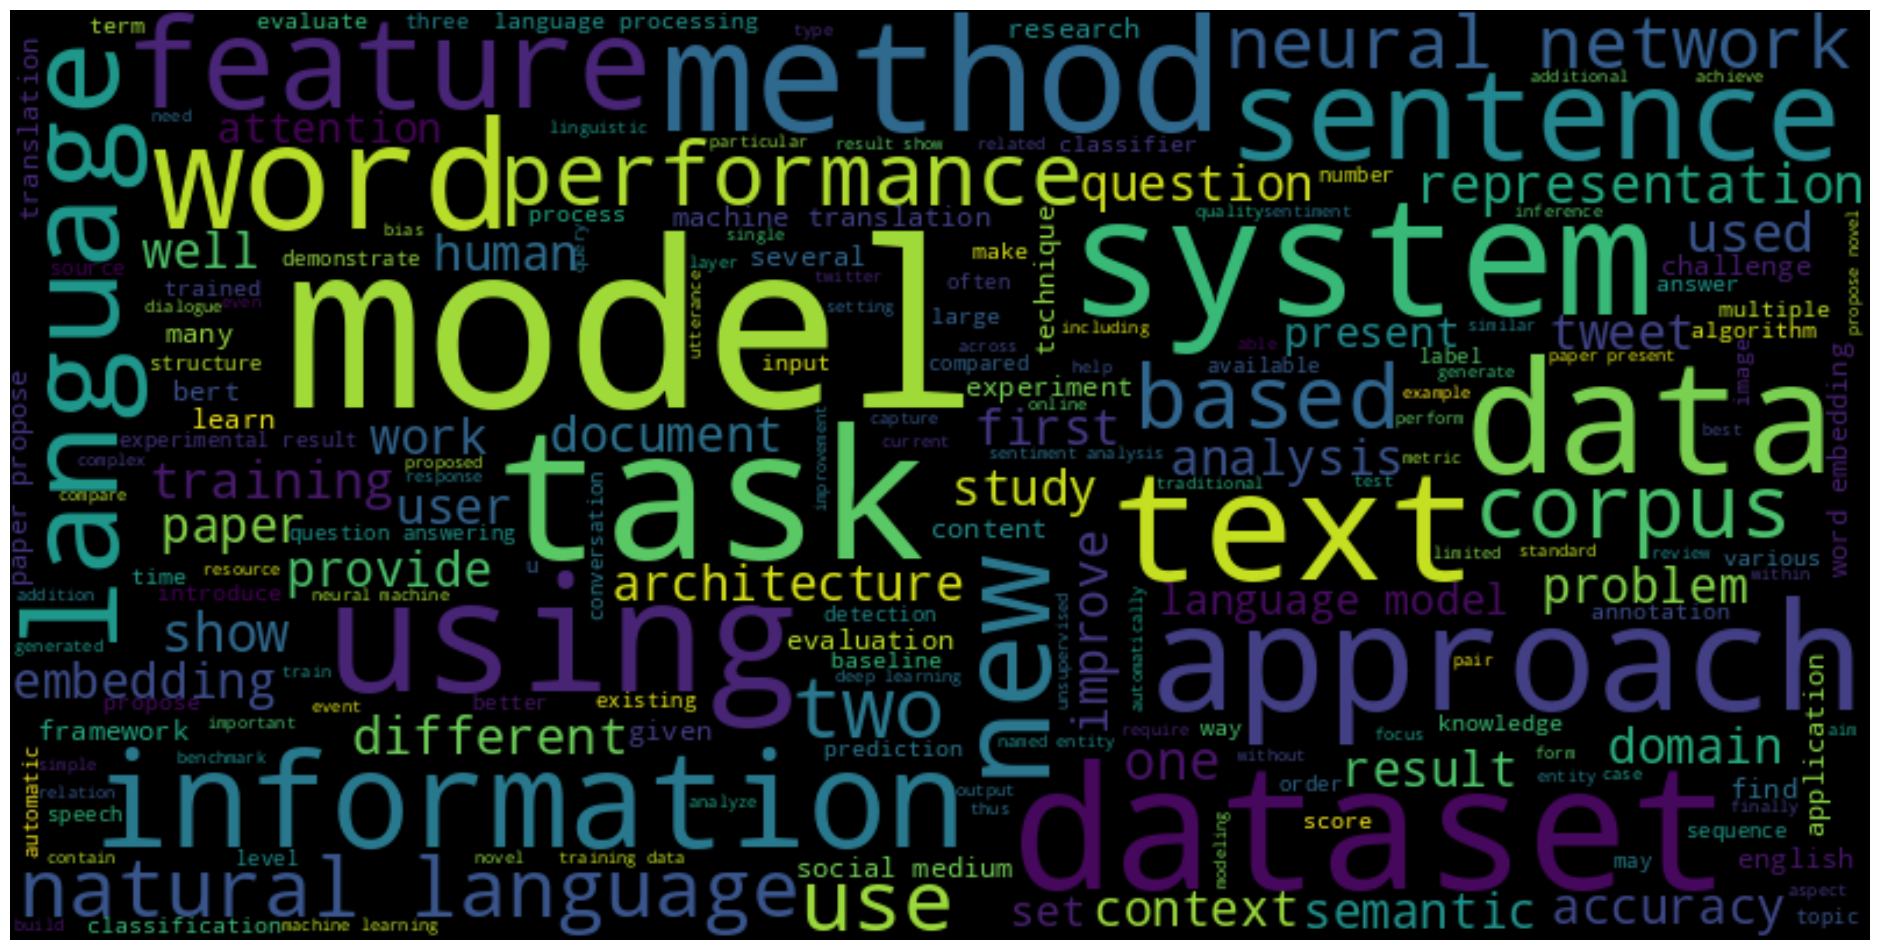

In [ ]:
# Word Cloud
figure(figsize=(24, 15))
imshow(WordCloud(width=800, height=400, max_font_size=100).generate("    ".join(df['qasper/abstract'].str.decode('utf-8').apply(preprocess_text))), interpolation='bilinear')
axis('off')
show()

We also need to calculate the most frequent words to understamd which type of text is inside the rows. This will also led to analysing sentiment value of texts.
---

In [ ]:
# Frequency Analysis
df['qasper/abstract'].str.decode('utf-8').apply(lambda x: x.split()).apply(lambda x: [word for word in x if word.lower() not in stop_words]).value_counts().head(1)

qasper/abstract
[End-to-end, task-oriented, dialog, models, achieved, promising, performance, collaborative, tasks, users, willingly, coordinate, system, complete, given, task., non-collaborative, settings,, example,, negotiation, persuasion,, users, systems, share, common, goal., result,, compared, collaborate, tasks,, people, use, social, content, build, rapport, trust, non-collaborative, settings, order, advance, goals., handle, social, content,, introduce, hierarchical, intent, annotation, scheme,, generalized, different, non-collaborative, dialog, tasks., Building, upon, TransferTransfo, (Wolf, et, al., 2019),, propose, end-to-end, neural, network, model, generate, diverse, coherent, responses., model, utilizes, intent, semantic, slots, intermediate, sentence, representation, guide, generation, process., addition,, design, filter, select, appropriate, responses, based, whether, intermediate, representations, fit, designed, task, conversation, constraints., non-collaborative, dialog, model, ...]    1
Name: count, dtype: int64

Then, we can see other statistical measures of text as below:
---

In [ ]:
# Text Statistics
mean_word_len = df["qasper/abstract"].apply(lambda x: mean([len(w) for w in x.split()]))
mean_sent_len = df["qasper/abstract"].str.decode("utf-8").apply(lambda x: mean([len(s) for s in x.split('.')]))
unique_words = df["qasper/abstract"].apply(lambda x: len(set(x.split())))
print("Mean word length = ", mean_word_len.mean().round(), "\nMean Sentence Length = ", mean_sent_len.mean().round(), '\nNumber of Unique words = ', unique_words.mean().round())

Mean word length =  6.0 
Mean Sentence Length =  123.0 
Number of Unique words =  100.0


> Sentiment Score of text

In [ ]:
# Sentiment Analysis
sia = SentimentIntensityAnalyzer()
sentiments = df["qasper/abstract"].str.decode("utf-8").apply(lambda x: sia.polarity_scores(x)['compound'])
print(sentiments.mean().round(2))  # Average sentiment score

0.55


```The above sentiment score reprensents that the text is near to neutral and some towards positive sentiment.```

In [ ]:
from gensim.models import Word2Vec
model = Word2Vec(df['qasper/abstract'].str.decode("utf-8").apply(lambda x: x.split()), vector_size=100, window=5, min_count=1)
print(model.wv.most_similar('the'))  # Similar words to 'End-to-end'

[('The', 0.970596432685852), ('training', 0.9686198830604553), ('F1-score', 0.9656857252120972), ('analysis', 0.9648351073265076), ('result', 0.9641672968864441), ('participation', 0.9638767838478088), ('types.', 0.9635830521583557), ('version', 0.9634116291999817), ('state', 0.9632580280303955), ('Portuguese', 0.9631357789039612)]


## 1.4 Data Cleaning

Above we have seen the most similar words in text to the most frequent word 'End-to-end'. Like Deep is most similar in context.
---
Now let's see the stats that are related to data cleaning like identifying null values, missing values and duplicate values.
---

In [ ]:
df.isnull().sum() # calculates number of null values

qasper/id          0
qasper/title       0
qasper/abstract    0
dtype: int64

In [ ]:
df.isna().sum() # calculates number of missing values

qasper/id          0
qasper/title       0
qasper/abstract    0
dtype: int64

In [ ]:
df.duplicated().sum() # checks the number of duplicate values in dataframe

0

# 2 Numerical Dataset

Since our data is very clean we not need to remove duplicates using `drop_duplicates(inplace=True)` function. Also since we have not any missing values or else we may need to fill those missing values using fillna(value) or remove the missing values using `dropna(inplace=True)` as per the situation.

In Bivariate analysis we do see the relation between 2 variables and their relative distribution of data.
> Numerical - Numerical

> Categorical - Numerical

> categorical - categorical

Since  we have only categorical columns, for other bivariate representation we will do them with another dataset. For now let's see what analysis can we do on these categorical columns. We can clearly see that first column is just an unique id , so that is not going to give any valuable insights. We can analyse the title vs abstract columns.

But listen, this datset have long text columns only, and we have almost perform a good EDA over it. For demonstrating all the EDA process we will load a new dataset that will have various columns.

Let's load the dataset:

In [ ]:
!pip install yfinance >> install_yfinace.out
from yfinance import Ticker
df = Ticker("SBIN.NS")
df = df.history(period='1y')  # Get historical data for the last 1 year in dataframe

We have loaded a SBI stock market dataset, and now we will analyse and understand this data well.

In [ ]:
df.head(1) # First we will see the dataset first row

Open        High         Low       Close  \
Date                                                                        
2023-08-16 00:00:00+05:30  549.583676  557.058365  544.862855  556.025635   

                             Volume  Dividends  Stock Splits  
Date                                                          
2023-08-16 00:00:00+05:30  15725767        0.0           0.0

In [ ]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

In [ ]:
df.shape

(245, 7)

In [ ]:
df.dtypes

Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 245 entries, 2023-08-16 00:00:00+05:30 to 2024-08-16 00:00:00+05:30
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          245 non-null    float64
 1   High          245 non-null    float64
 2   Low           245 non-null    float64
 3   Close         245 non-null    float64
 4   Volume        245 non-null    int64  
 5   Dividends     245 non-null    float64
 6   Stock Splits  245 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 15.3 KB


In [ ]:
df['Open']

Date
2023-08-16 00:00:00+05:30    549.583676
2023-08-17 00:00:00+05:30    556.419033
2023-08-18 00:00:00+05:30    560.598948
2023-08-21 00:00:00+05:30    563.500319
2023-08-22 00:00:00+05:30    563.057685
                                ...    
2024-08-09 00:00:00+05:30    816.000000
2024-08-12 00:00:00+05:30    820.599976
2024-08-13 00:00:00+05:30    813.500000
2024-08-14 00:00:00+05:30    800.950012
2024-08-16 00:00:00+05:30    803.000000
Name: Open, Length: 245, dtype: float64

In [ ]:
df.describe()

Open        High         Low       Close        Volume  \
count  245.000000  245.000000  245.000000  245.000000  2.450000e+02   
mean   696.684317  703.721760  688.936697  696.388439  1.820678e+07   
std    113.041374  114.917763  110.458674  112.608706  1.146877e+07   
min    540.928832  543.780986  534.240957  537.978271  1.263661e+06   
25%    583.662181  587.153661  577.908671  582.383667  1.225208e+07   
50%    713.190091  722.238291  693.913267  713.288391  1.520504e+07   
75%    809.000000  818.326949  797.820799  806.278931  2.037889e+07   
max    897.000000  912.000000  883.299988  905.650024  1.223812e+08   

        Dividends  Stock Splits  
count  245.000000         245.0  
mean     0.055918           0.0  
std      0.875261           0.0  
min      0.000000           0.0  
25%      0.000000           0.0  
50%      0.000000           0.0  
75%      0.000000           0.0  
max     13.700000           0.0

In [ ]:
df.nunique()

Open            241
High            243
Low             241
Close           244
Volume          245
Dividends         2
Stock Splits      1
dtype: int64

Here we see that the last column has only one unique value, that means it has only one value for all rows that really not going to help us a lot for getting any insights in visuallisation. So , we will drop this column now.
---

In [ ]:
df.drop('Stock Splits', axis=1, inplace=True)

In [ ]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Volume       0
Dividends    0
dtype: int64

In [ ]:
df.isna().sum()

Open         0
High         0
Low          0
Close        0
Volume       0
Dividends    0
dtype: int64

In [ ]:
df.duplicated().sum()

0

## 2.1 Univariate plots

> Now we have done the preleminary analysis on the stock market dataset which includes summary of dataset, missing values, duplicate values and since those values are nor present in our dataset. Now we will proceed to univariate analysis for numerical columns.

```
Now we are plotting box plot on each of the columns. This box plot ios a visualization of the distribution of range of values of the columns. The line at top and bottom are the maximum and minimum values of the column except the outliers, we can say they are outlier boundary. We have many methods for calculating outliers like z-score method and interquartile range.
*   z-score: Data is assumed to be normally distributed. We calulate that how many standard deviations away is a data point from mean. Simply we divide the difference of mean and data point with standard deviation. If that value is more than 3 or less than -3 we declare that as outlier.
*   IQR: This is calculated by ordering the all values and calculating medians in data. First we calculate median of whole data, then the median of first half is termed as first quartile and median of second half is termed as 3rd quartile. The difference between these quartile is Inter Quartile range. And when we substract the 1.5 times IQR to first quartile we get lower outlier boundary and similarly addition to 3rd quartile gives upper outlier boundary.
```

Boxplot for  Open


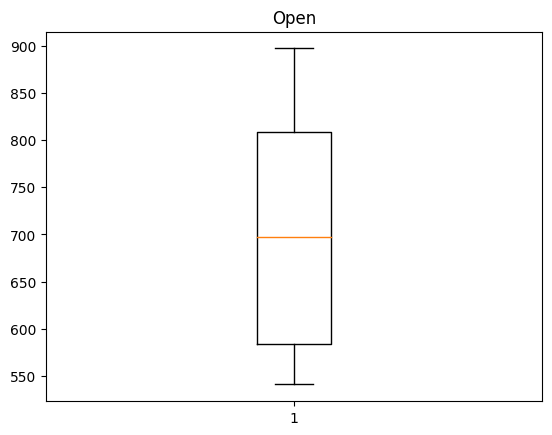


Boxplot for  High


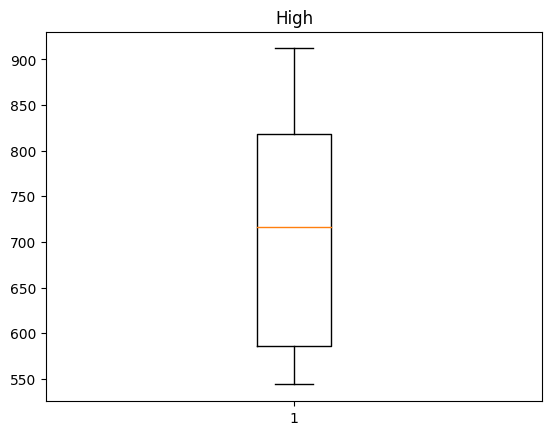


Boxplot for  Low


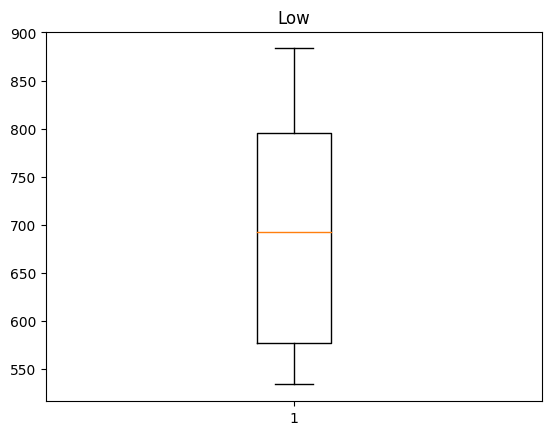


Boxplot for  Close


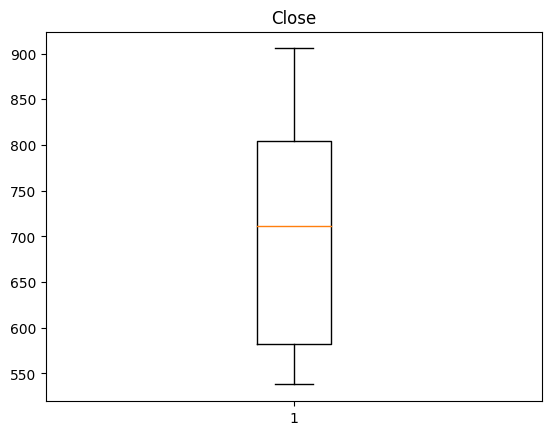


Boxplot for  Volume


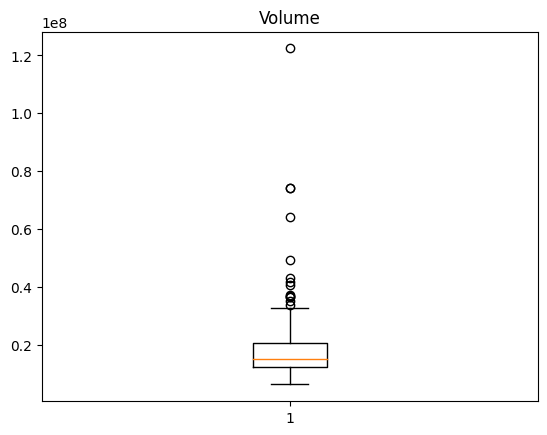


Boxplot for  Dividends


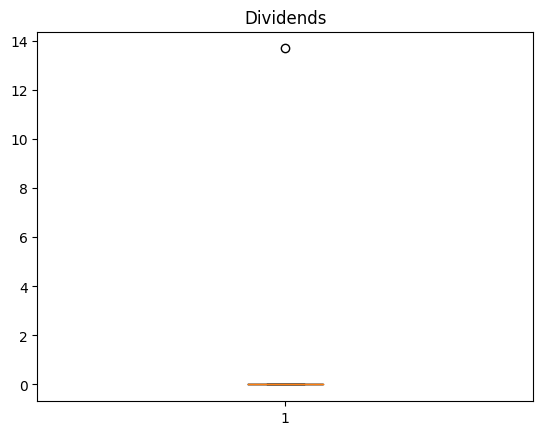

In [ ]:
from matplotlib.pyplot import boxplot, title
for col in df.columns:
    print("Boxplot for ", col)
    boxplot(df[col])
    title(col)
    show()
    print()

    Histogram of columns

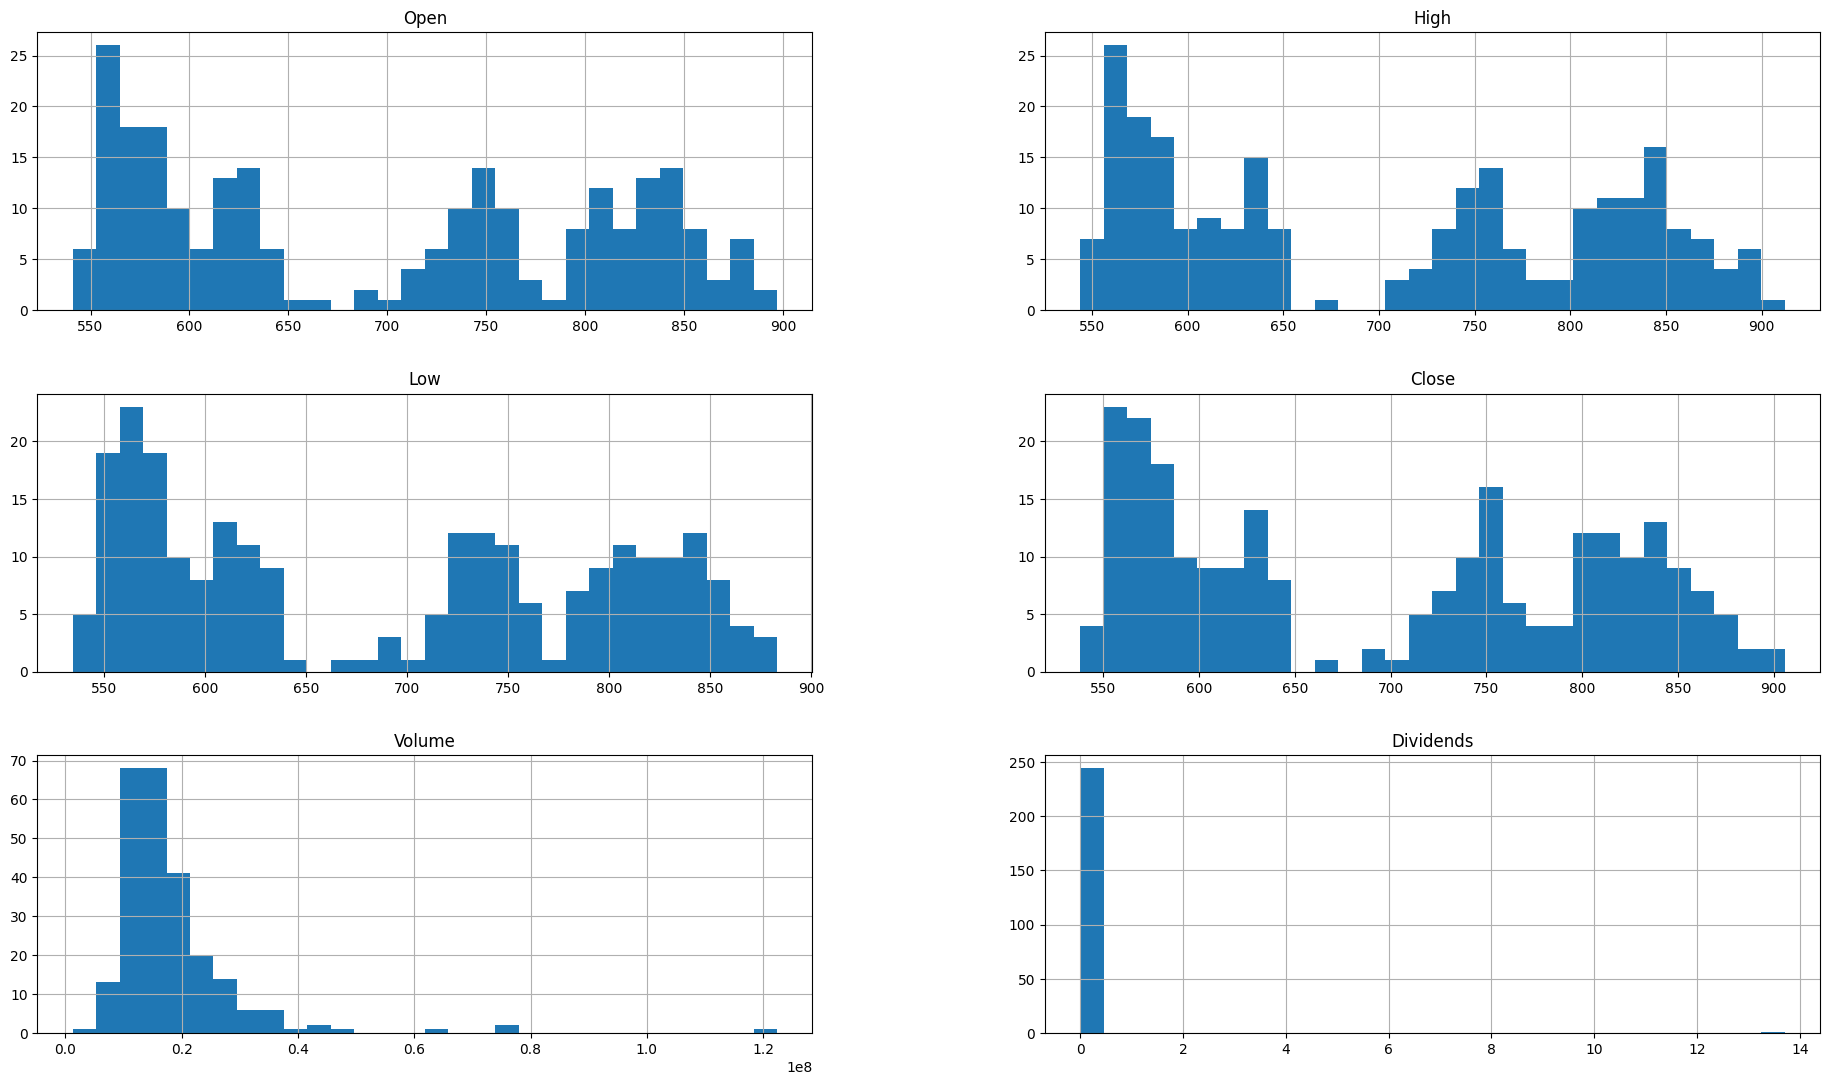

In [ ]:
df.hist(figsize=(23, 13), bins=30)
show()

## 2.2 Multivariate Analysis
---
```
Correlation Matrix is a good way to perform bivariate analysis between numerical columns. In this matrix each cell shows the correlation between corresponding variables as shown below.
correlation shows the proportionality between 2 variables and lies between -1 to 1, -1 corresponds to inversely proportional and 1 to directly proportional. 0 as non linear relationship. It is calulated for two variable x, y as:
```
`{n∑xy - (∑x)(∑y)}/√{(n∑x^2 - (∑x)^2)(n∑y^2 - (∑y)^2)}`

---

In [ ]:
df.corr(method='spearman') # correlation matrix

Open      High       Low     Close    Volume  Dividends
Open       1.000000  0.997170  0.992255  0.990808  0.196939   0.068793
High       0.997170  1.000000  0.992777  0.994983  0.218873   0.064268
Low        0.992255  0.992777  1.000000  0.996744  0.167469   0.068793
Close      0.990808  0.994983  0.996744  1.000000  0.193654   0.066983
Volume     0.196939  0.218873  0.167469  0.193654  1.000000   0.044354
Dividends  0.068793  0.064268  0.068793  0.066983  0.044354   1.000000

We can also visualize this correlation matrix as heatmap. Let's see how
---

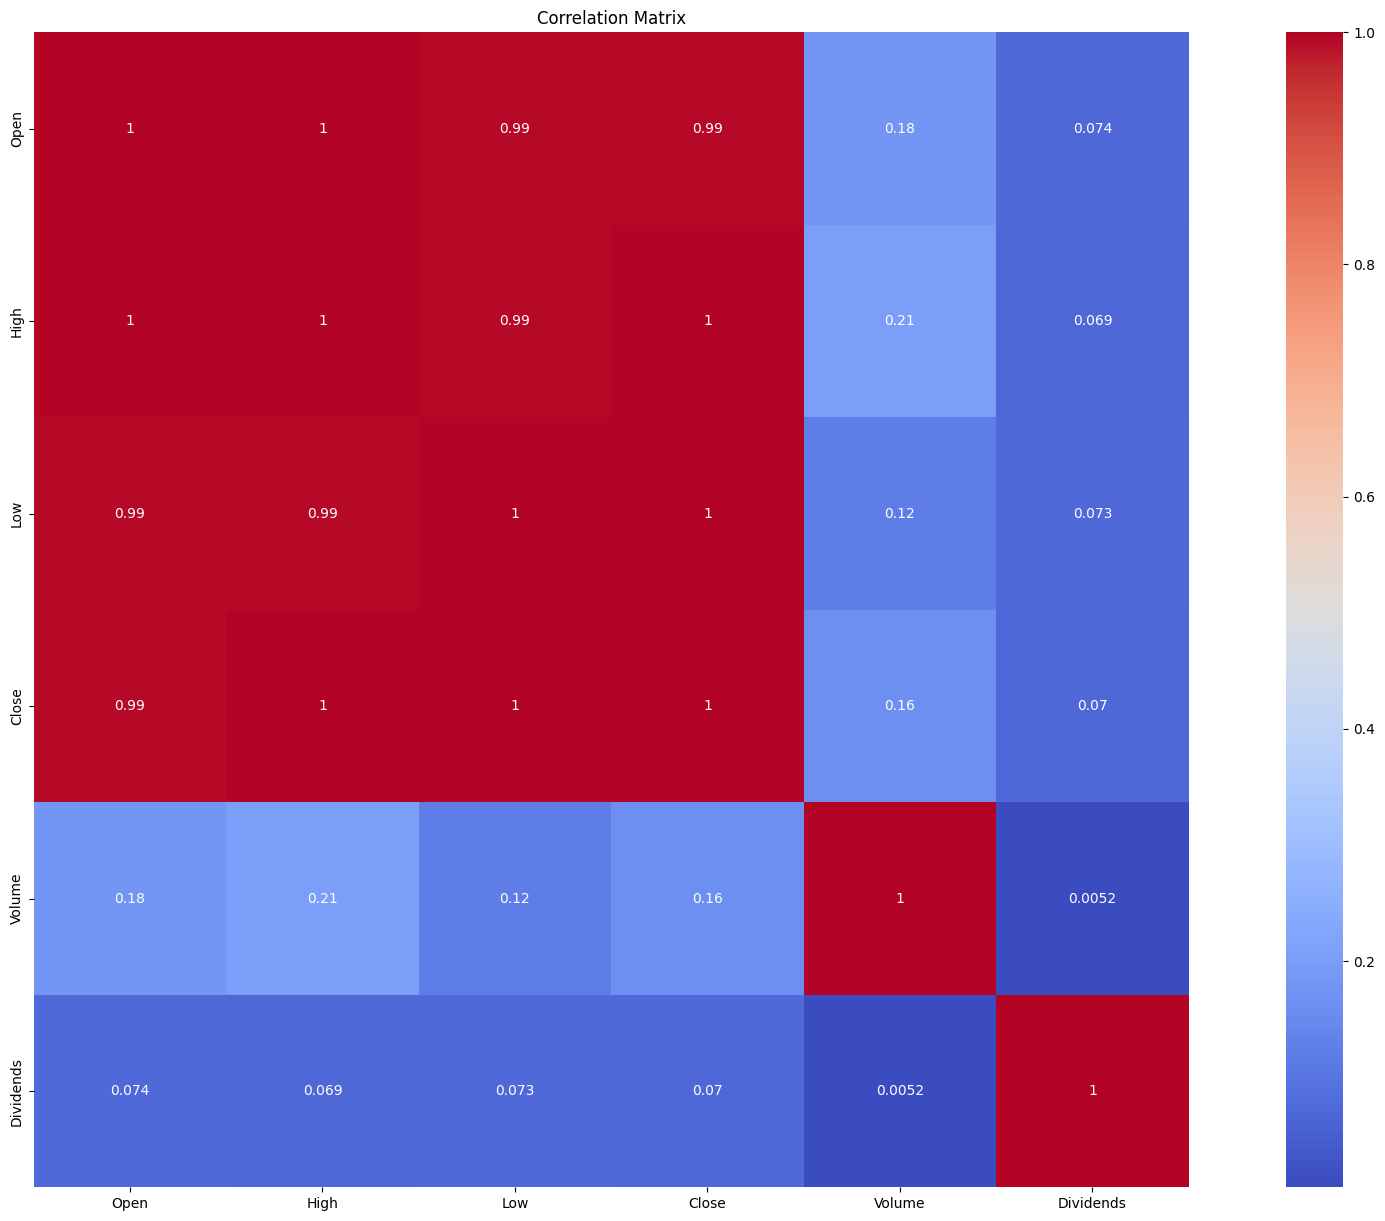

In [ ]:
from seaborn import heatmap
figure(figsize=(25, 15))
heatmap(df.corr(), annot=True, cmap='coolwarm', square=True)
title('Correlation Matrix')
show()

We clearly see that the variables in red color are highly correlated.

## 2.3 Bivariate Analysis

In bivariate analysis, we also plot scatter plot and line plot.
---

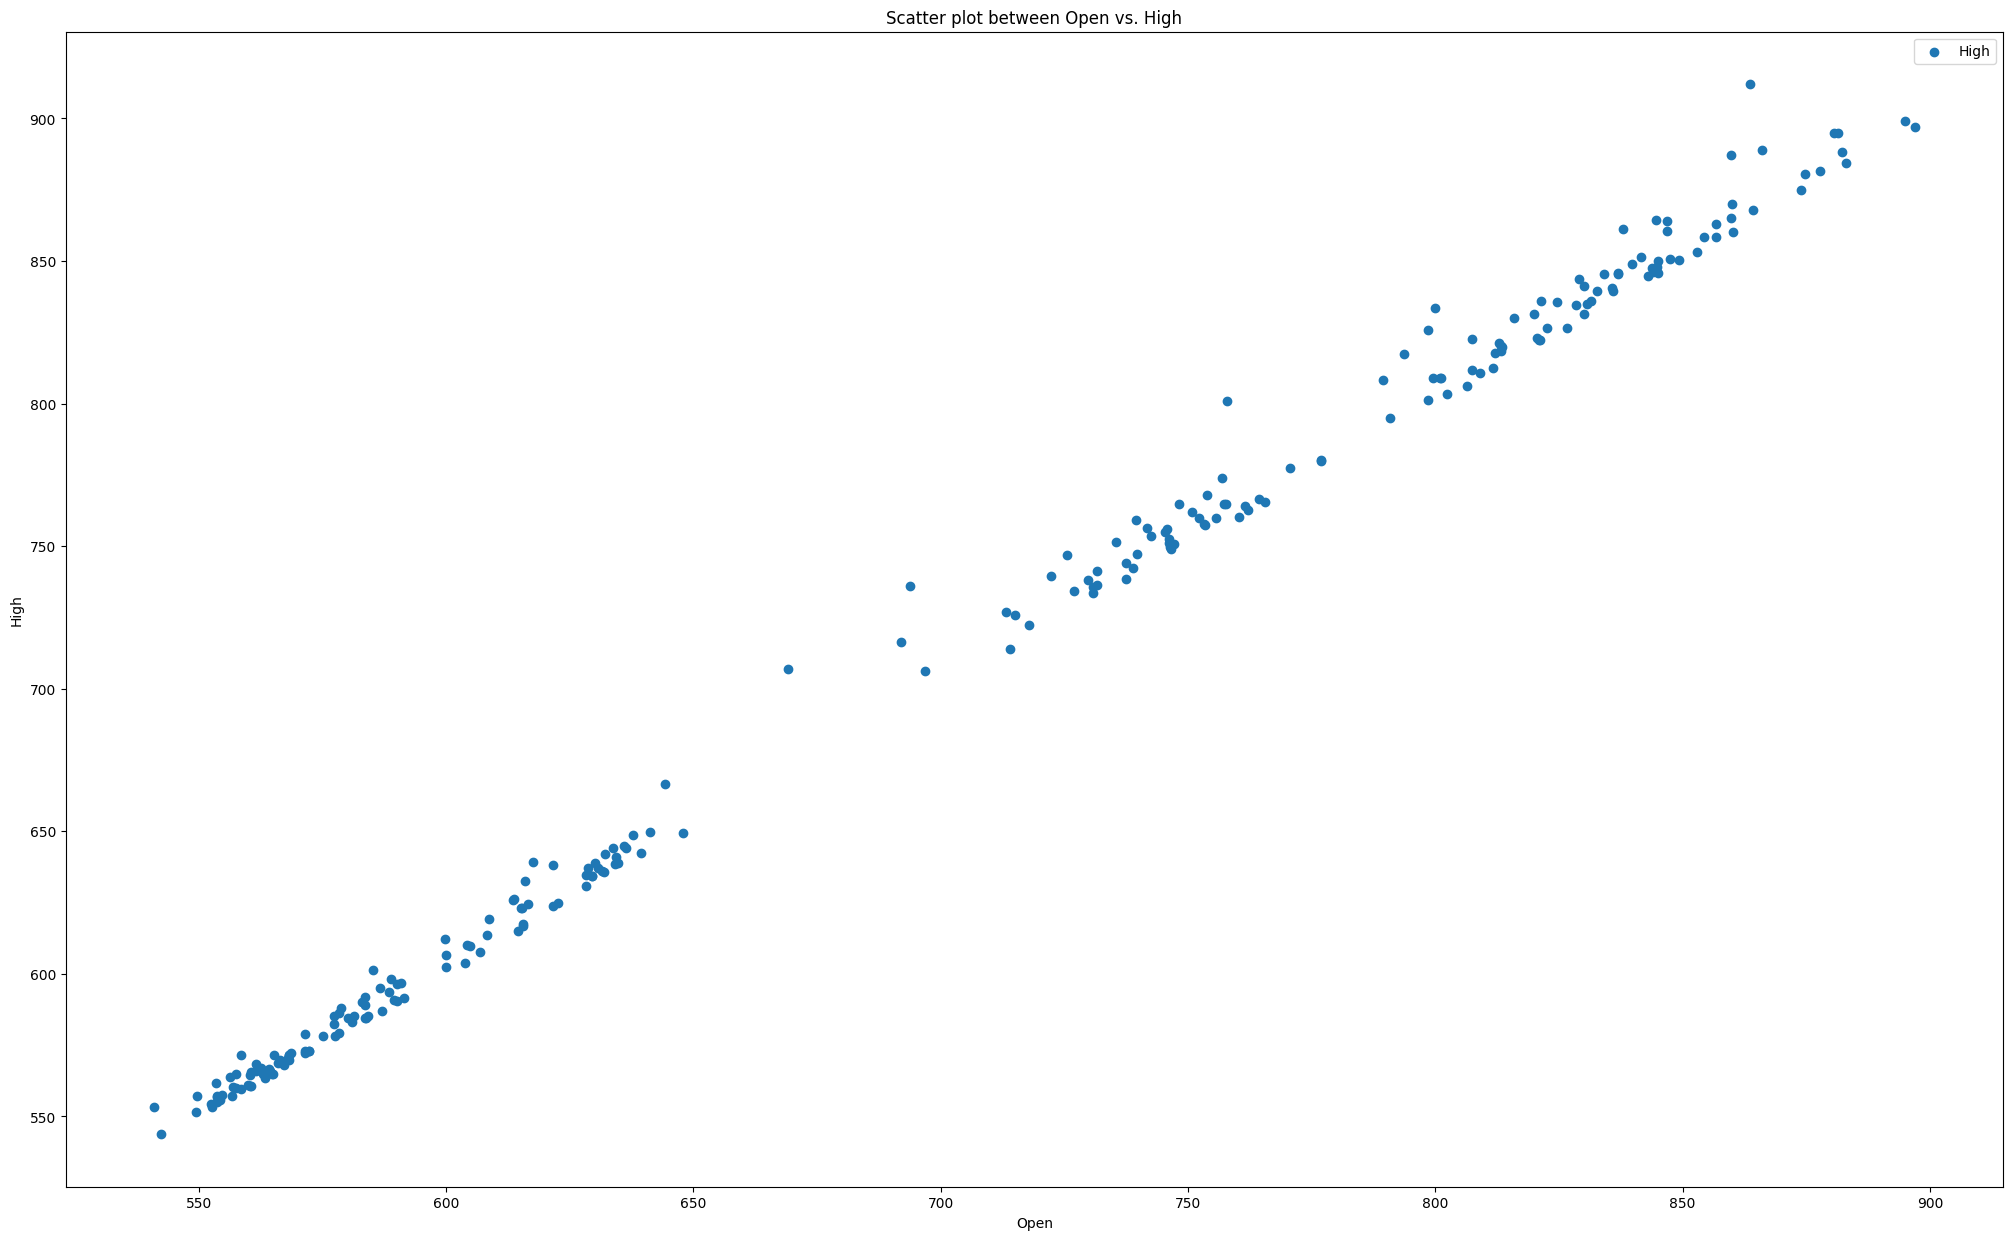

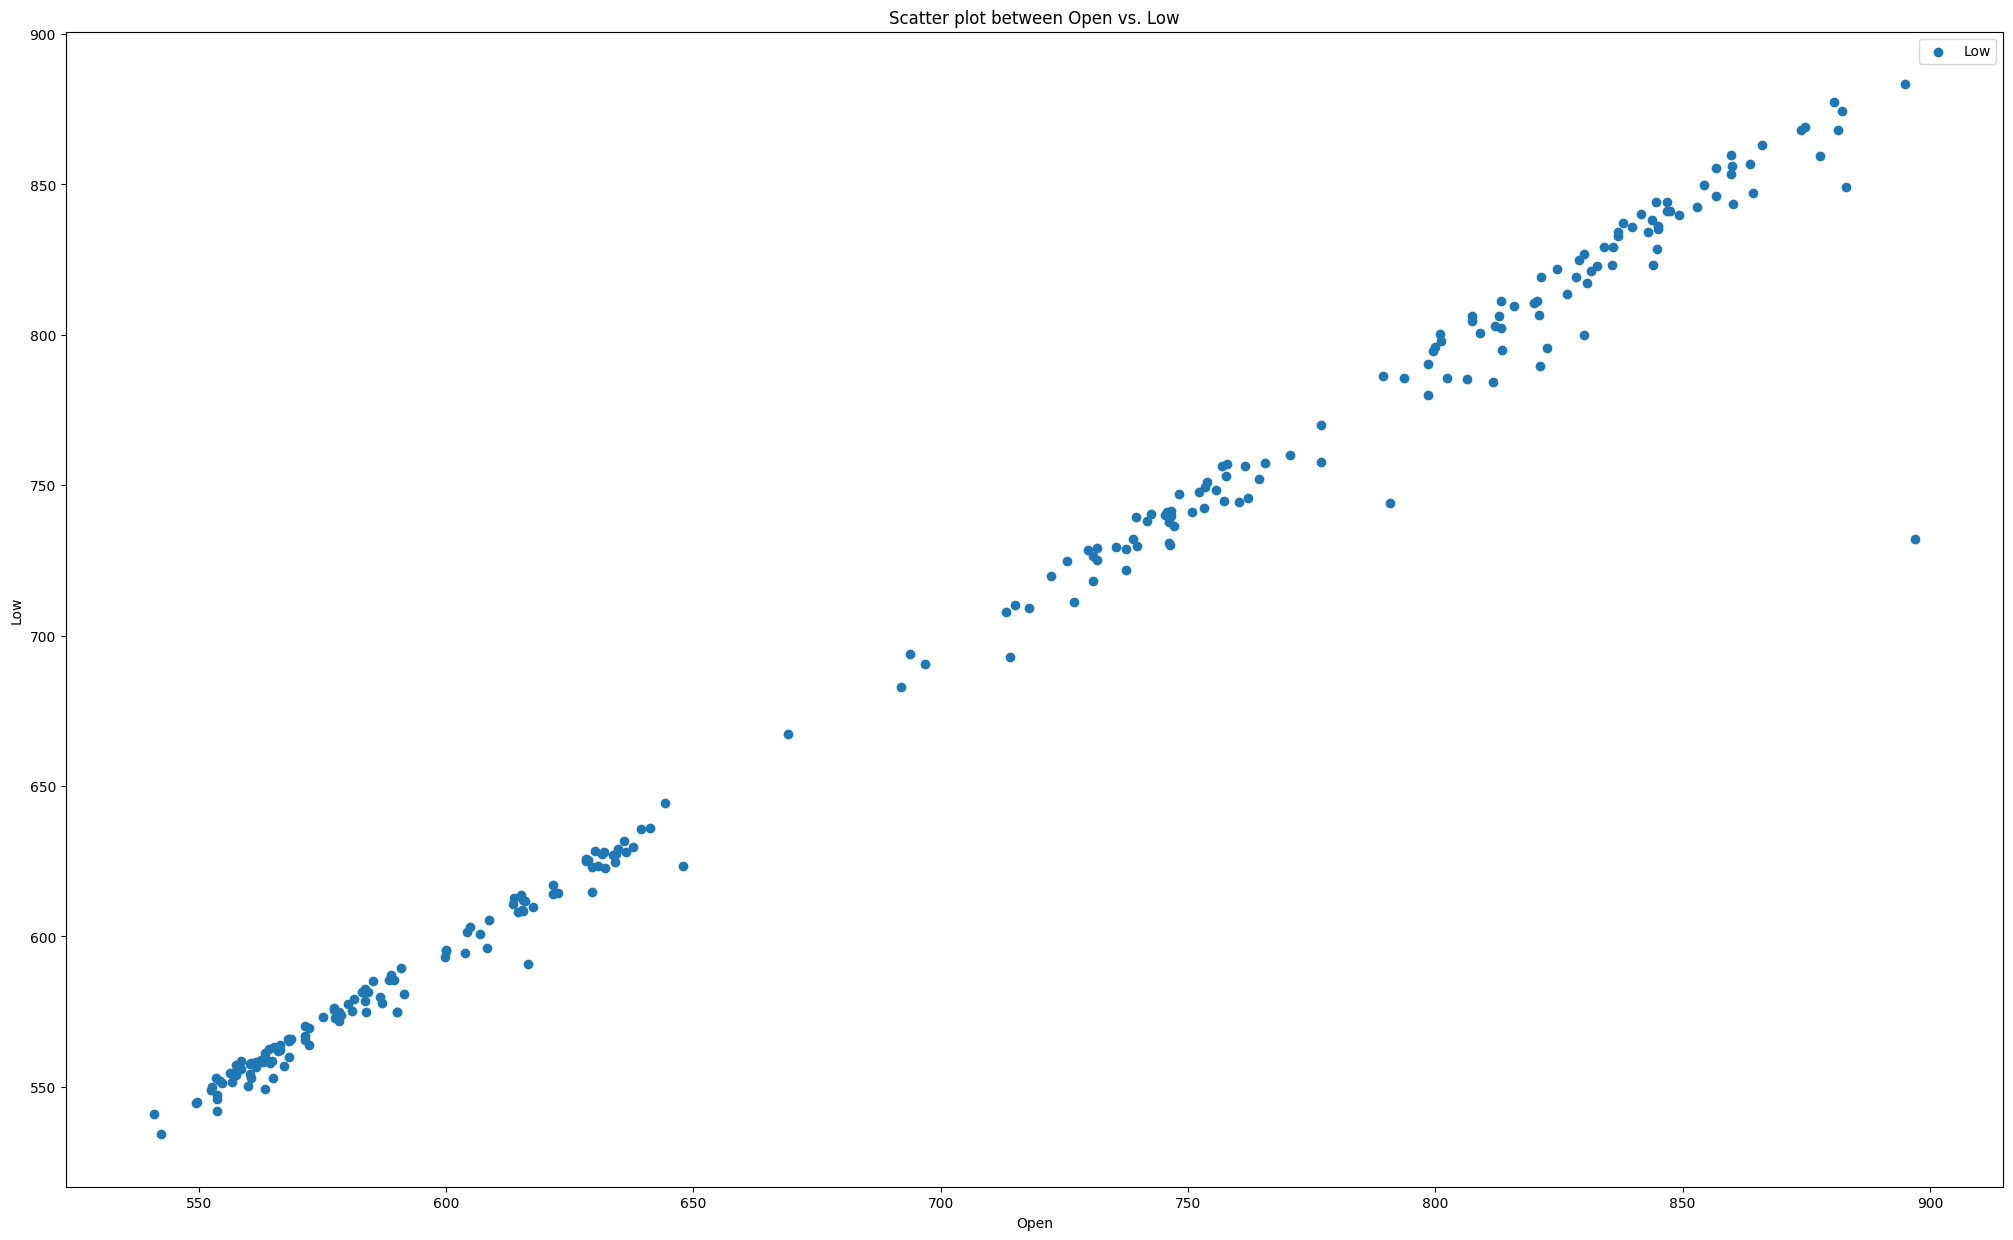

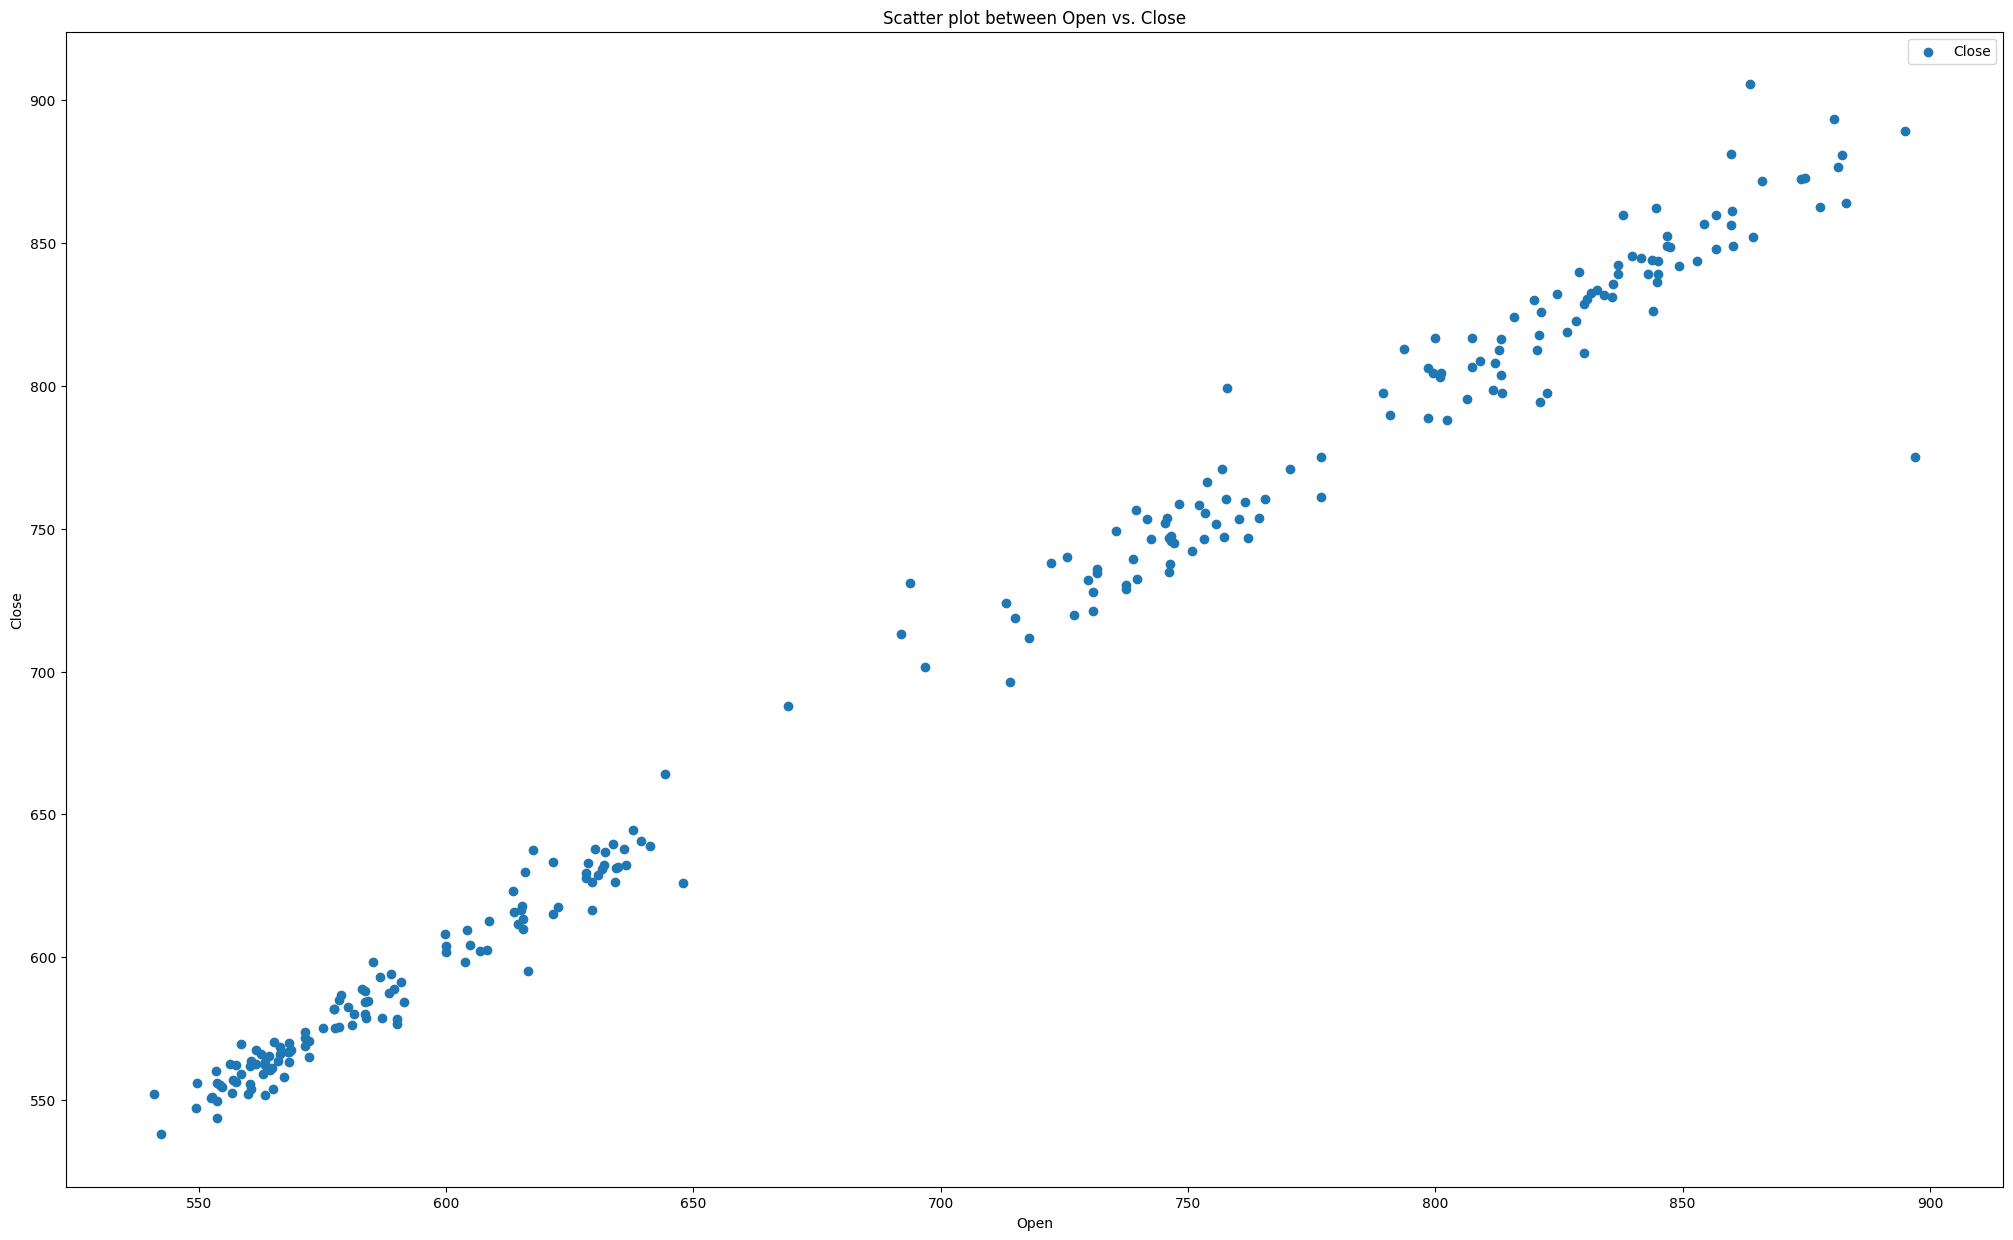

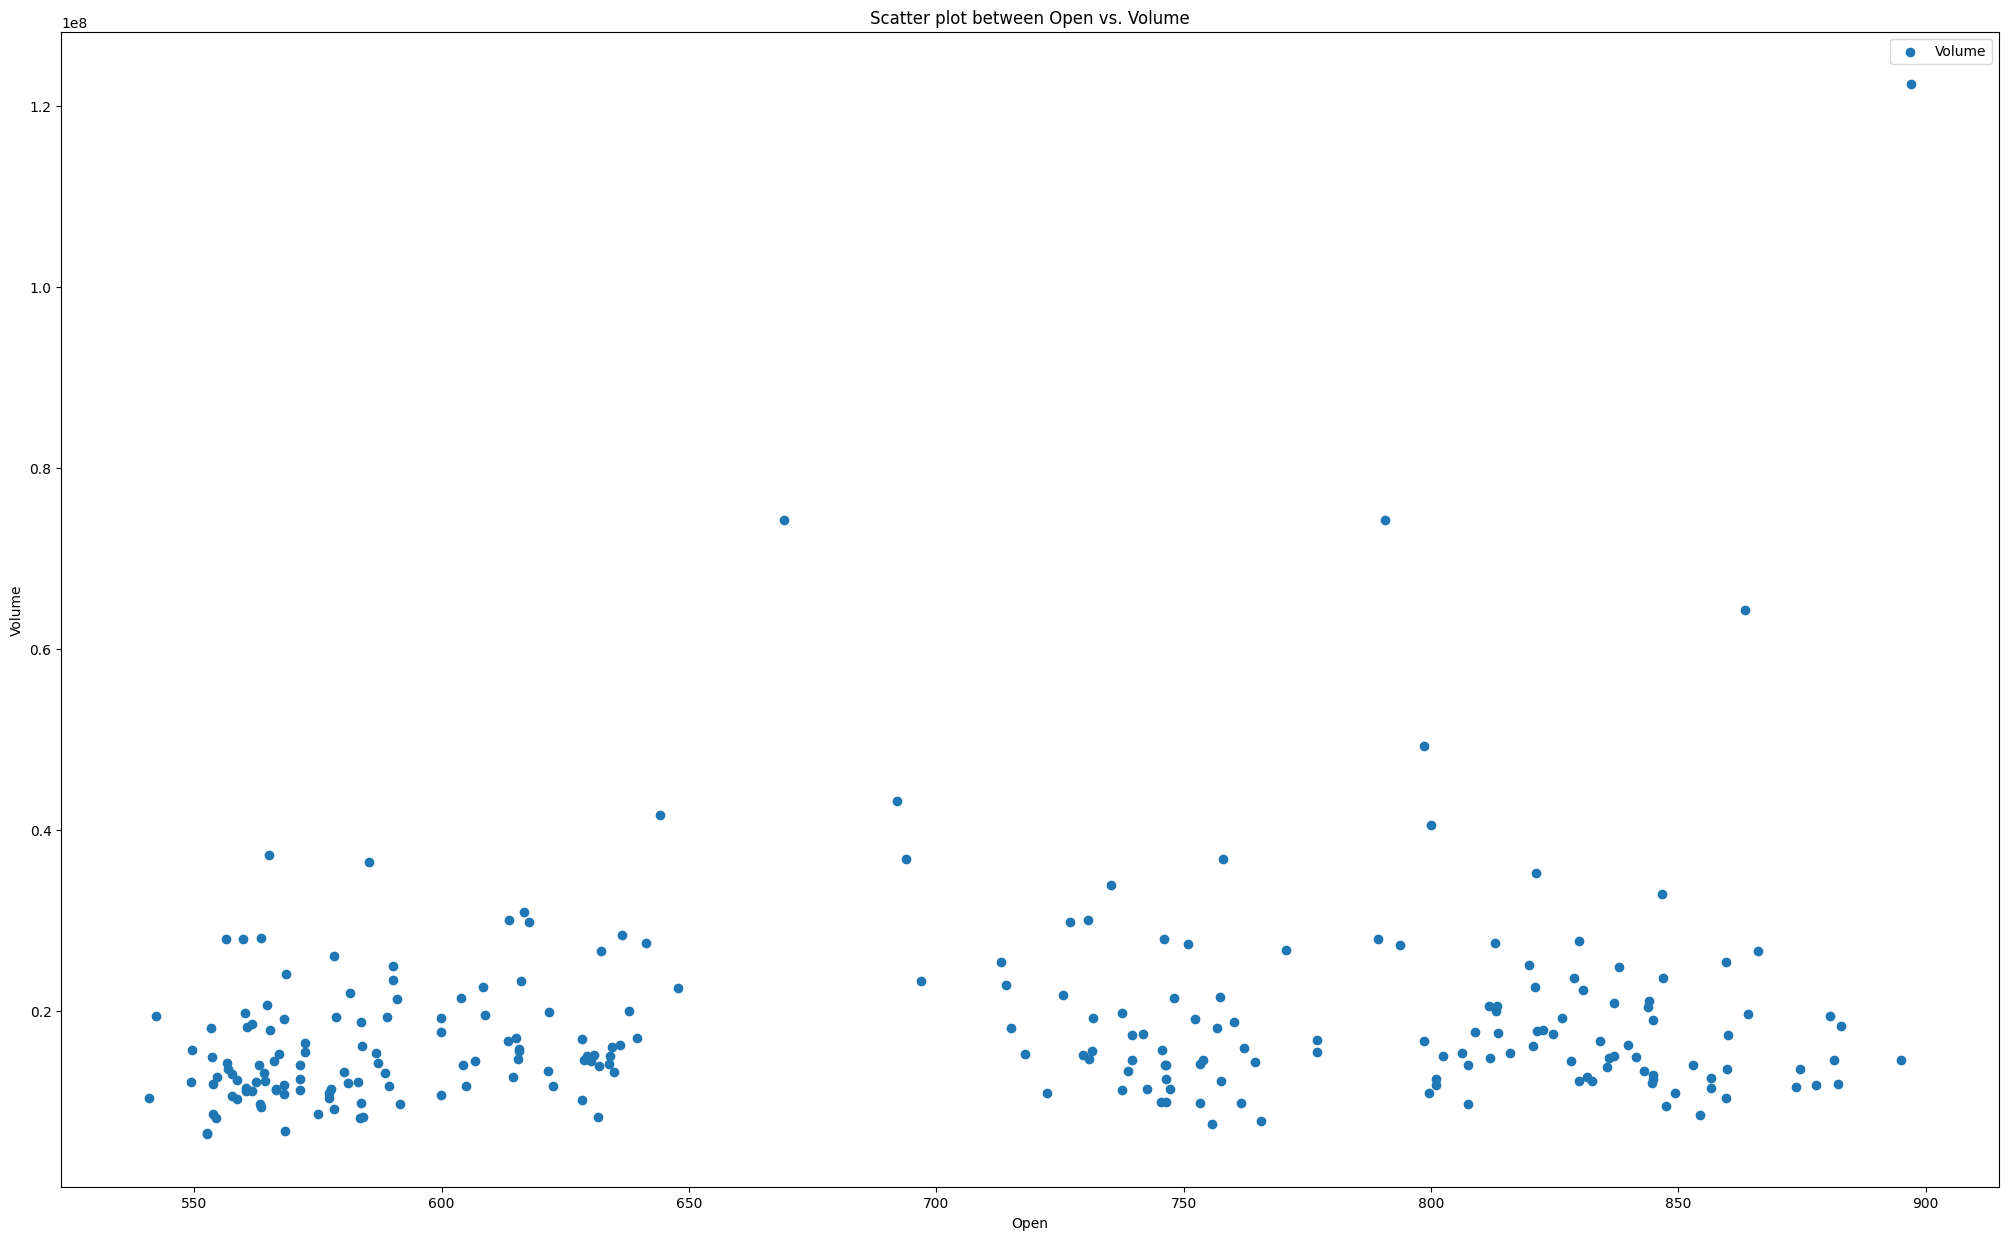

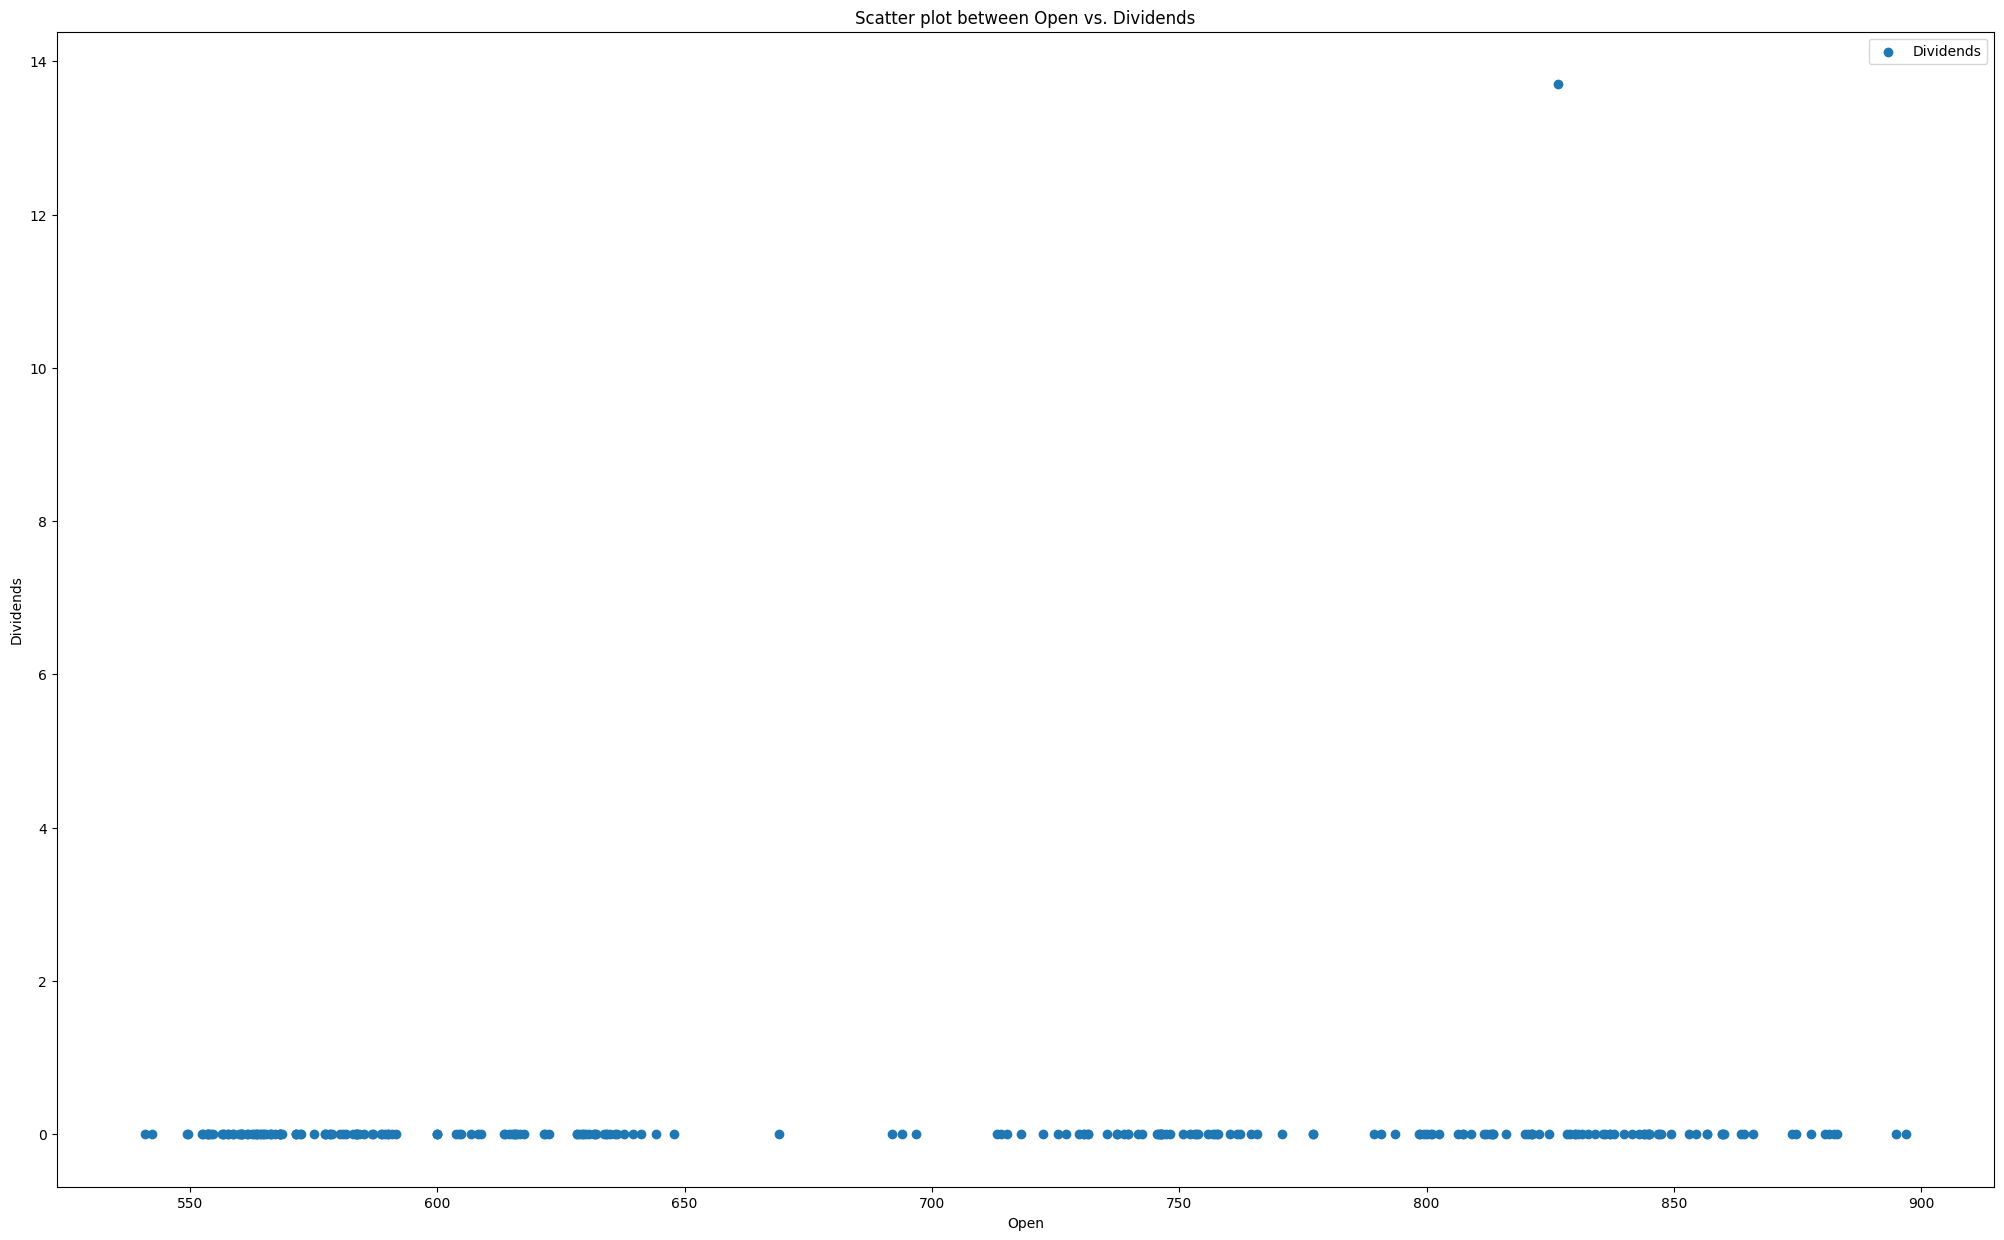

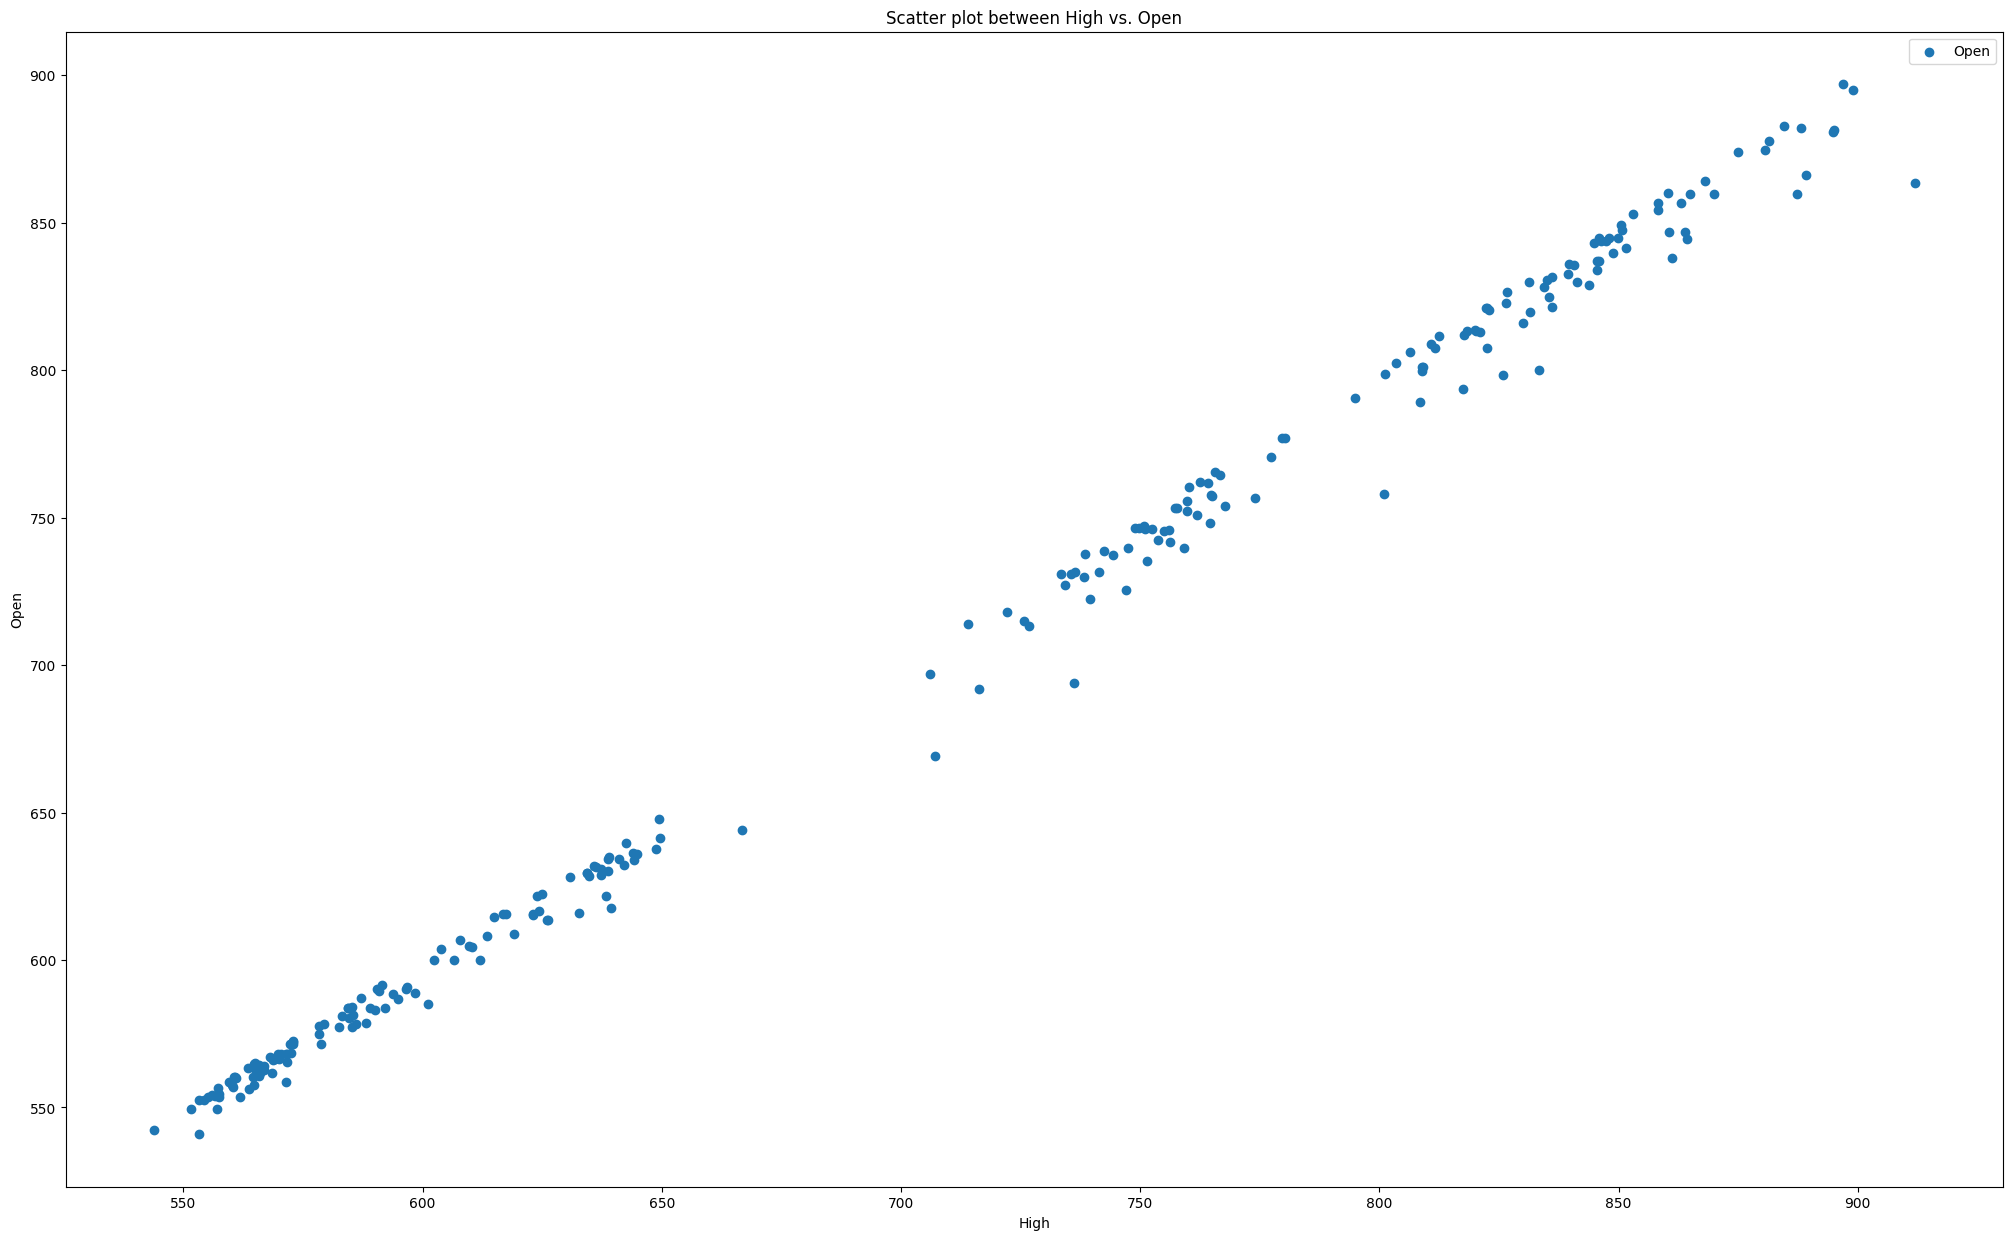

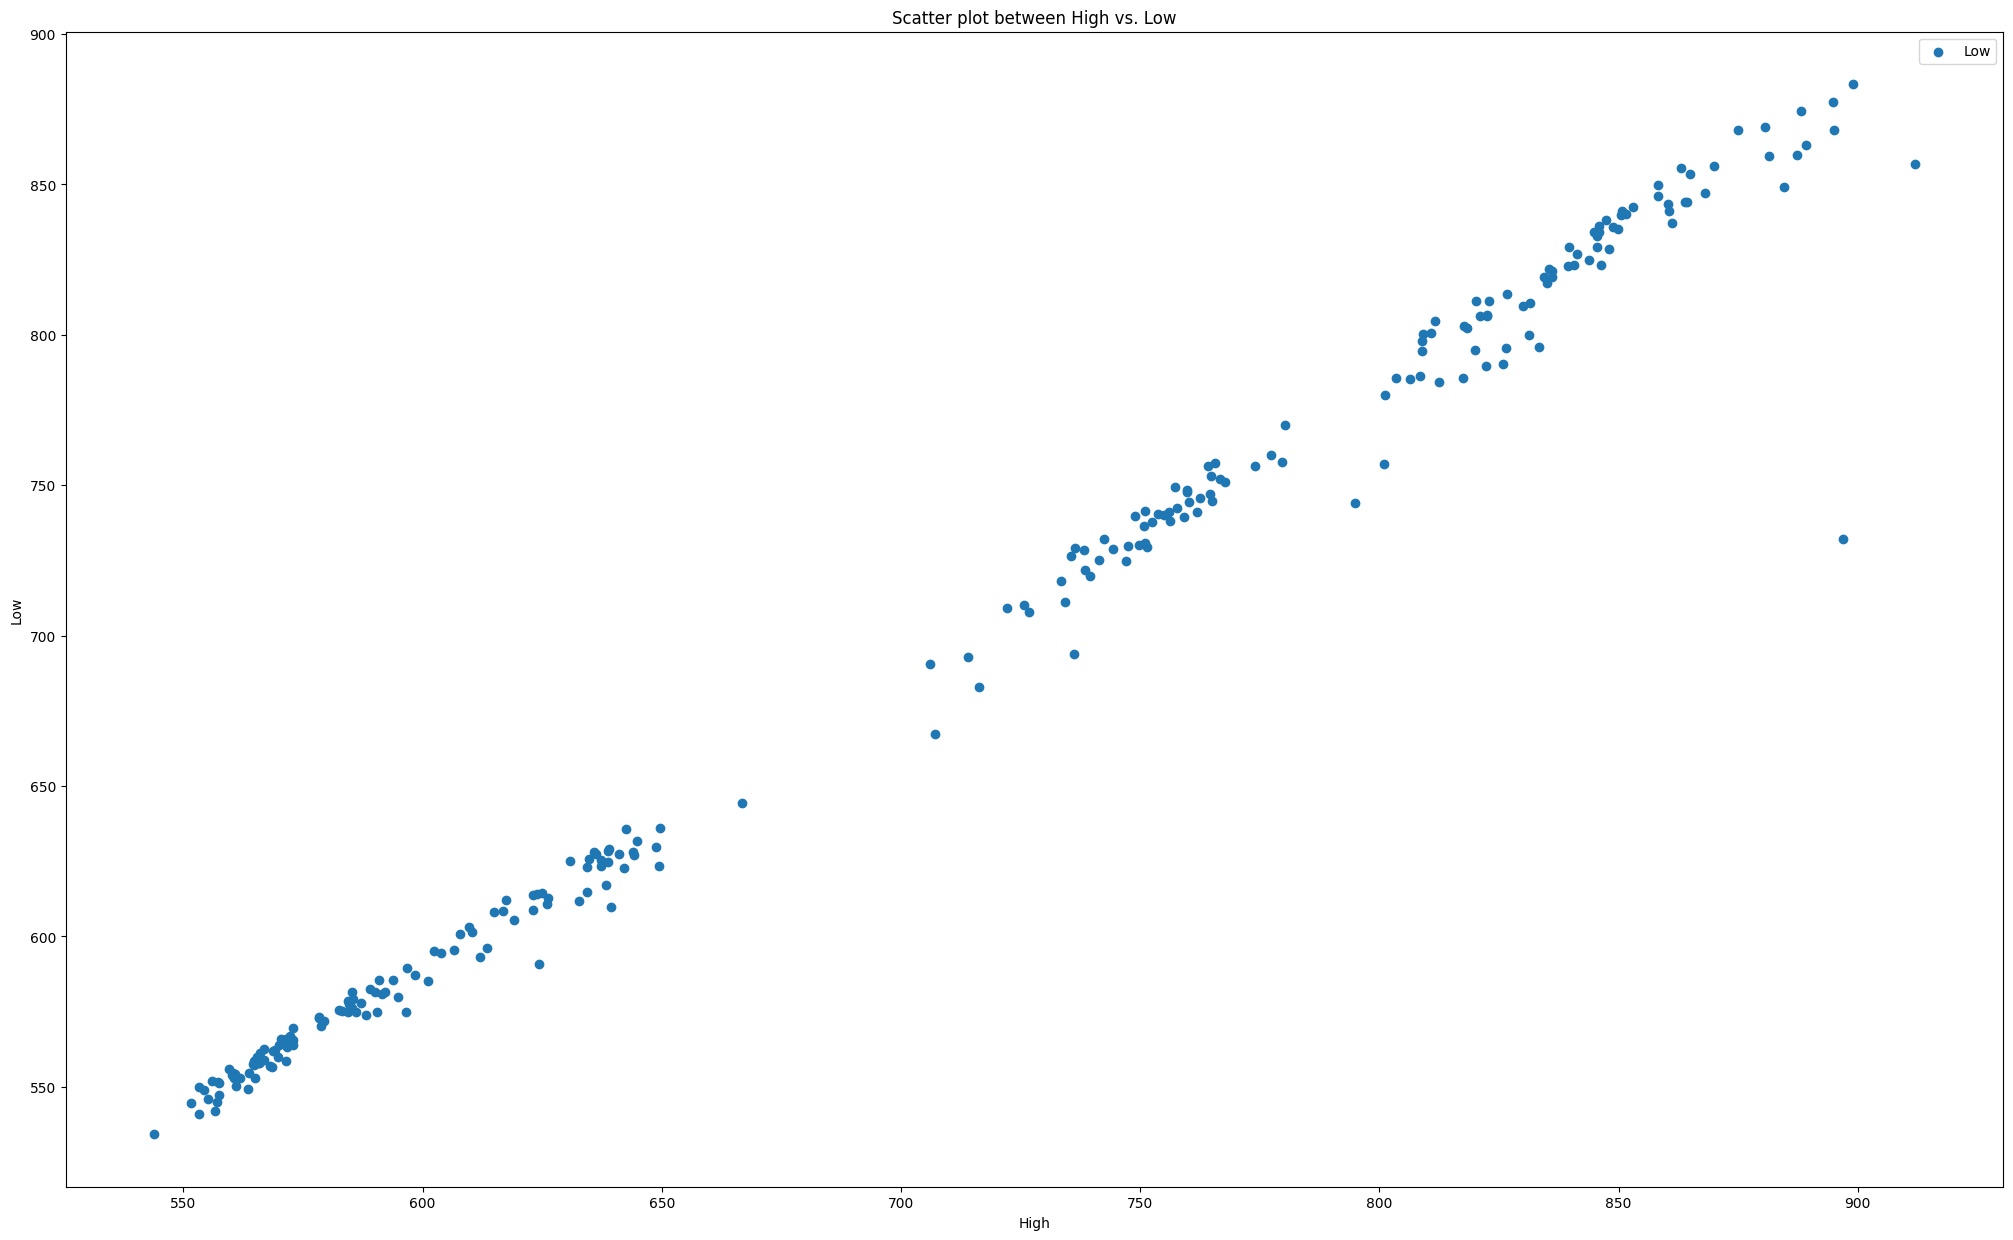

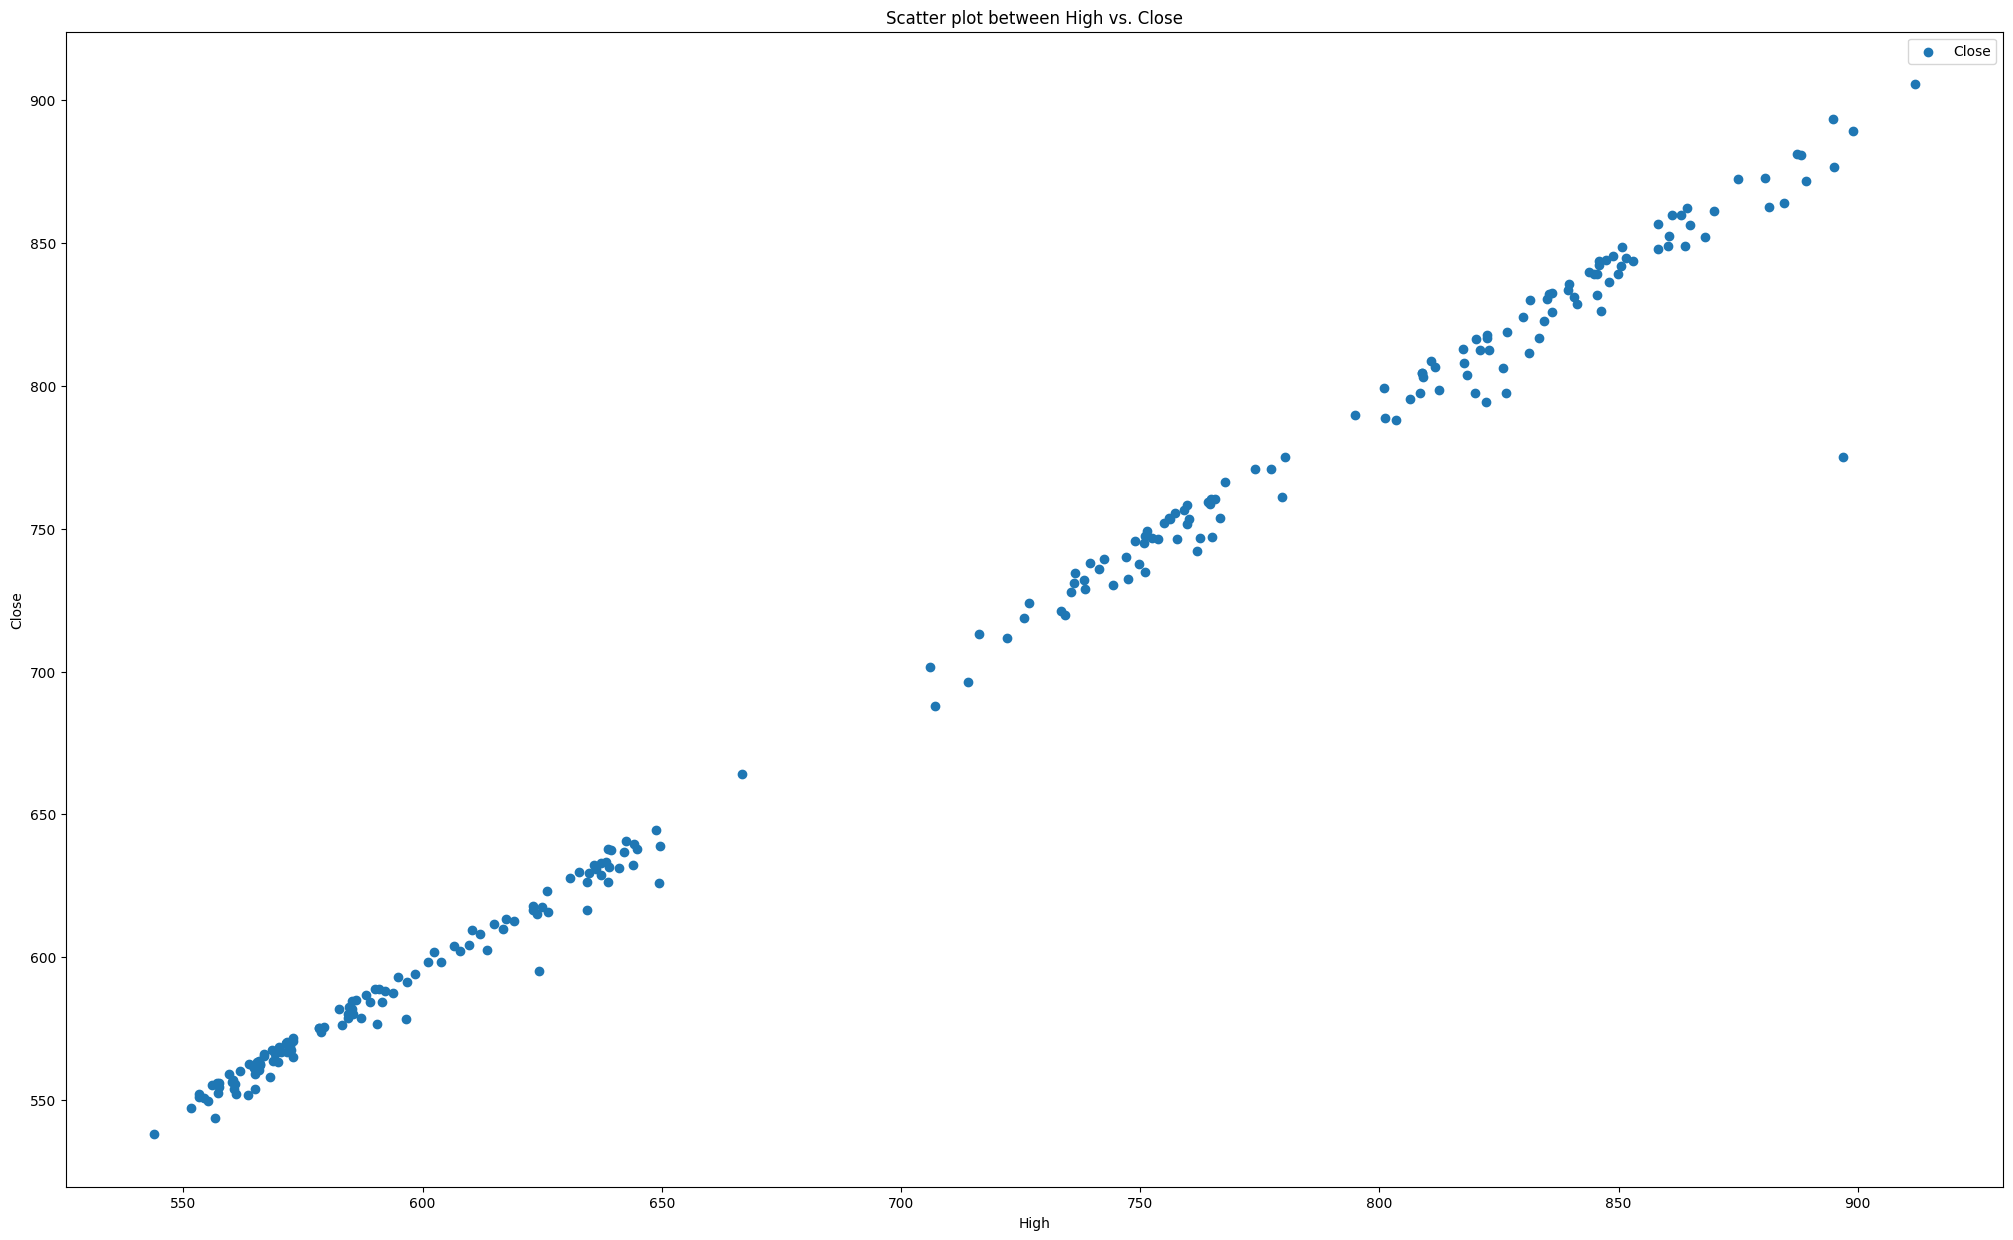

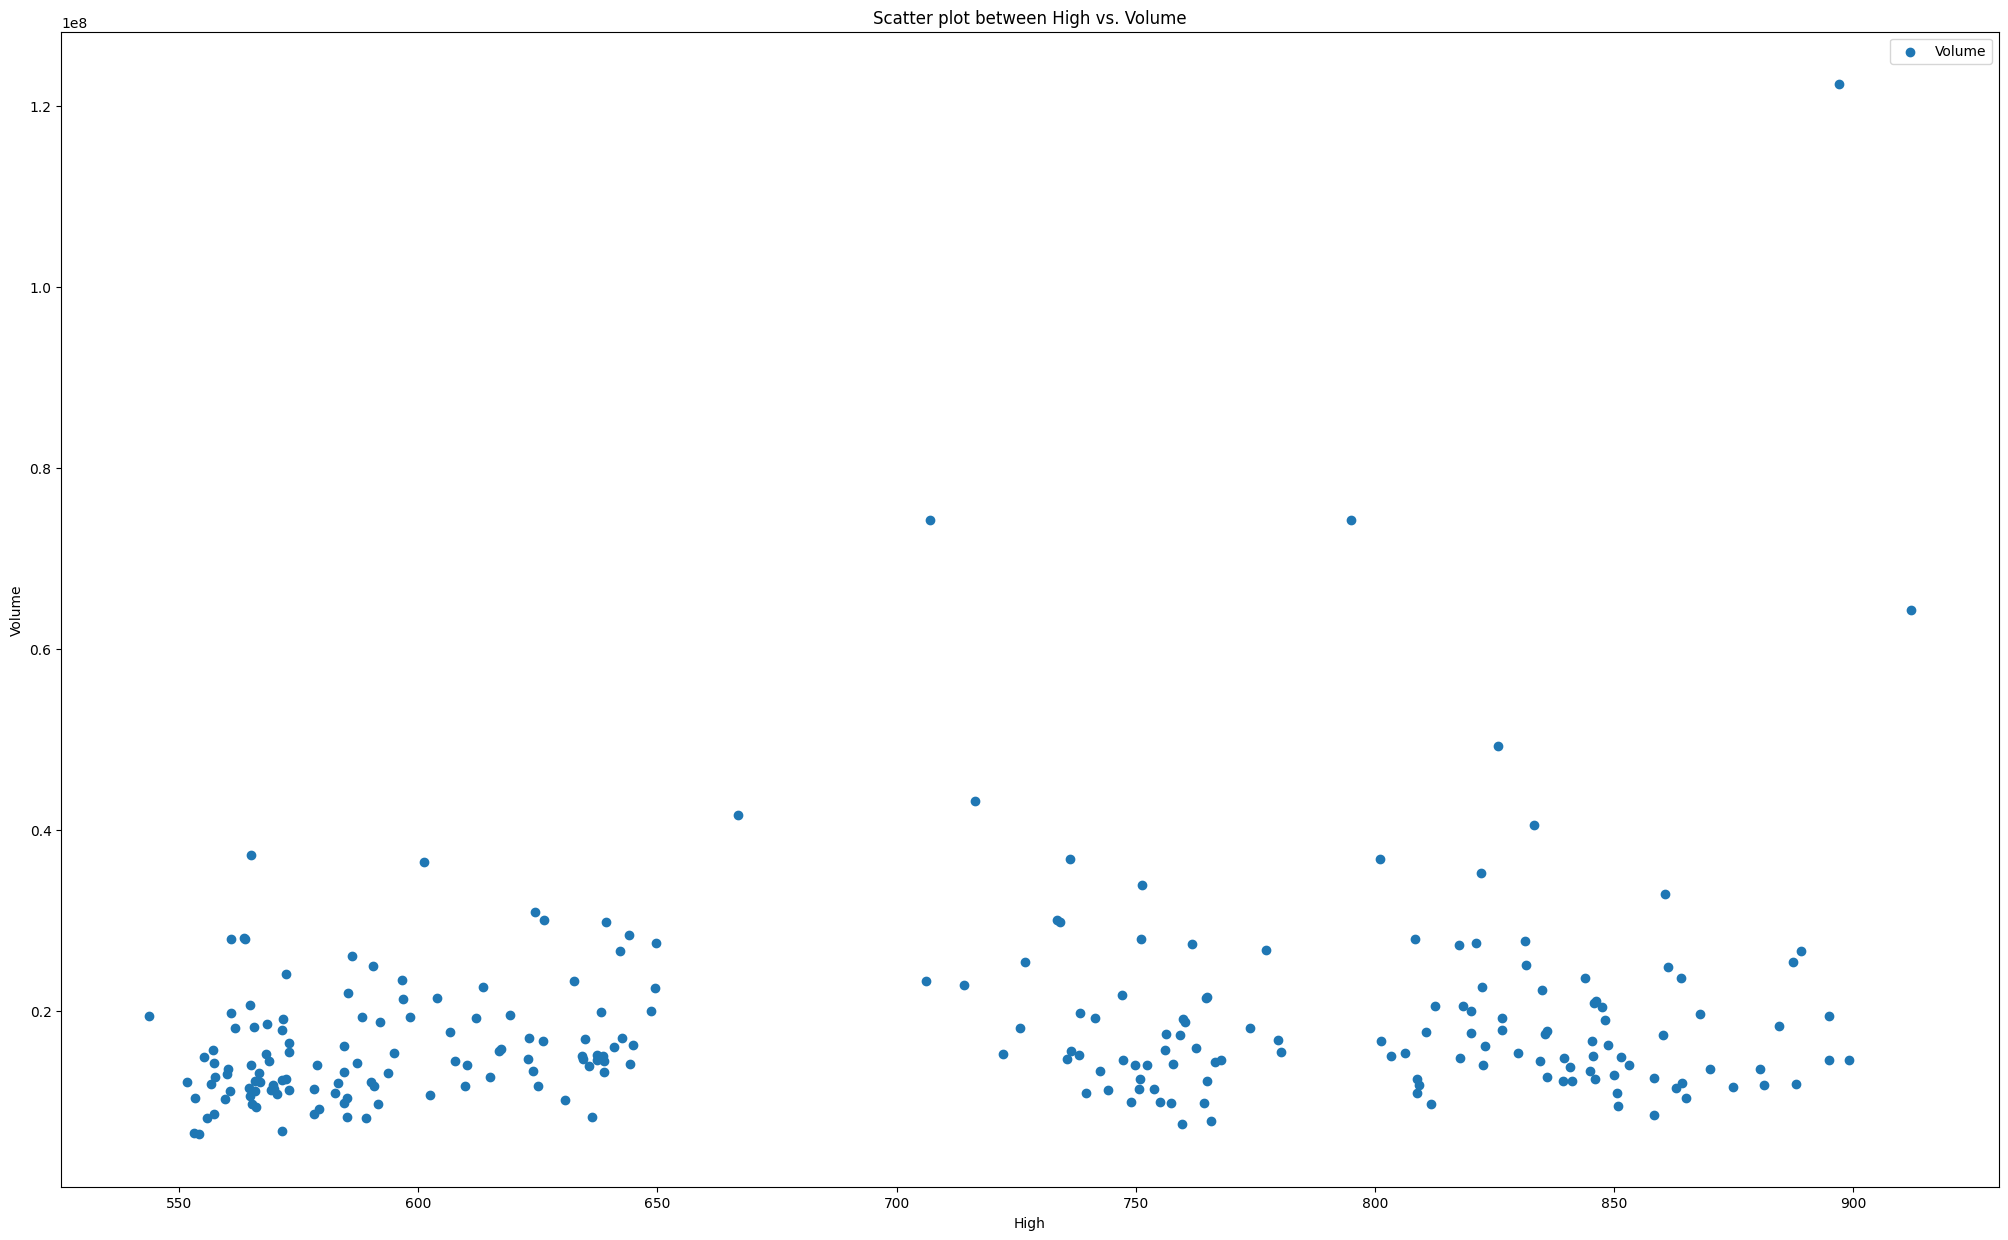

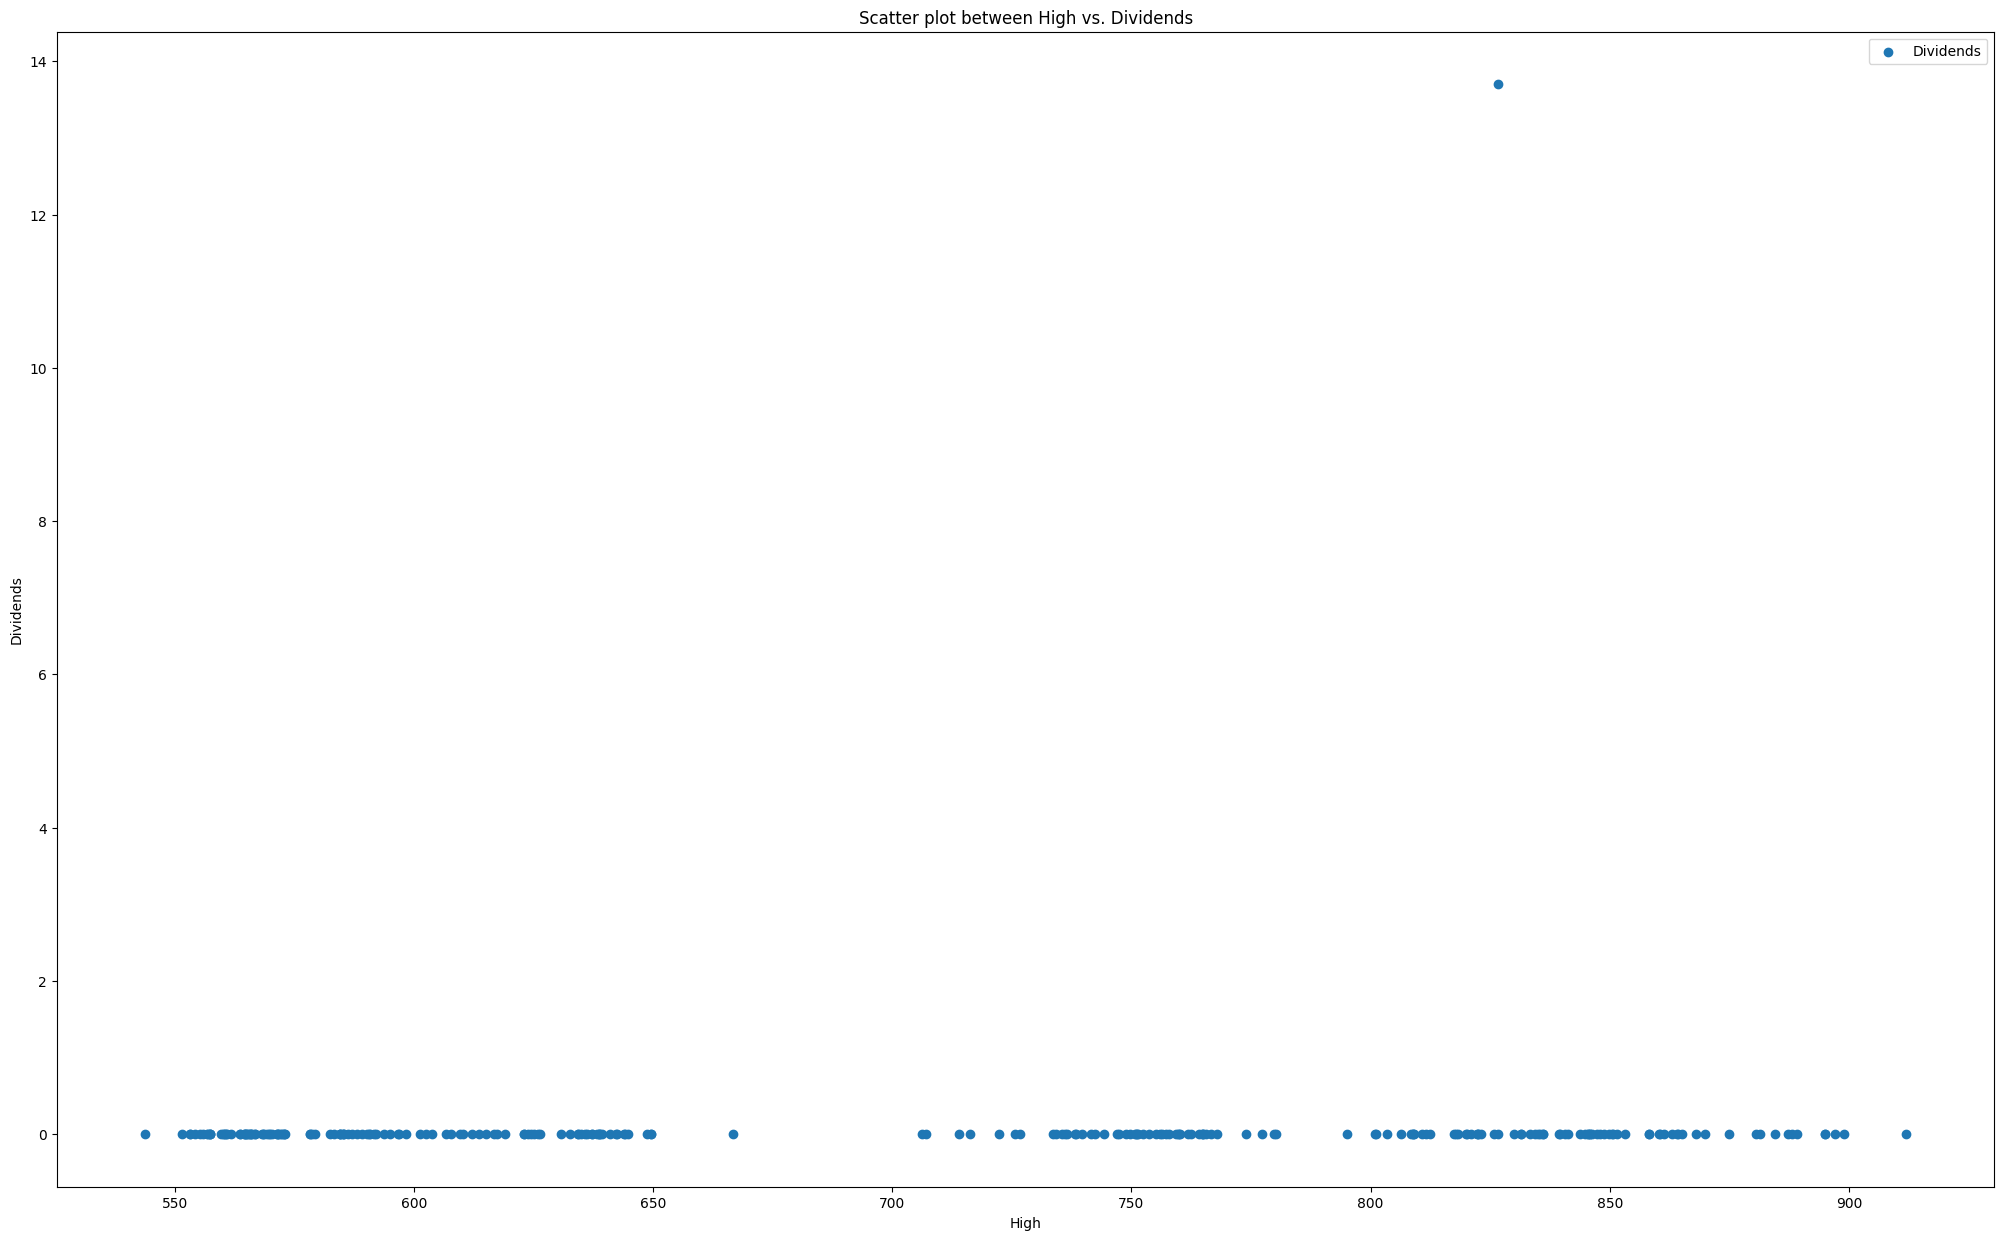

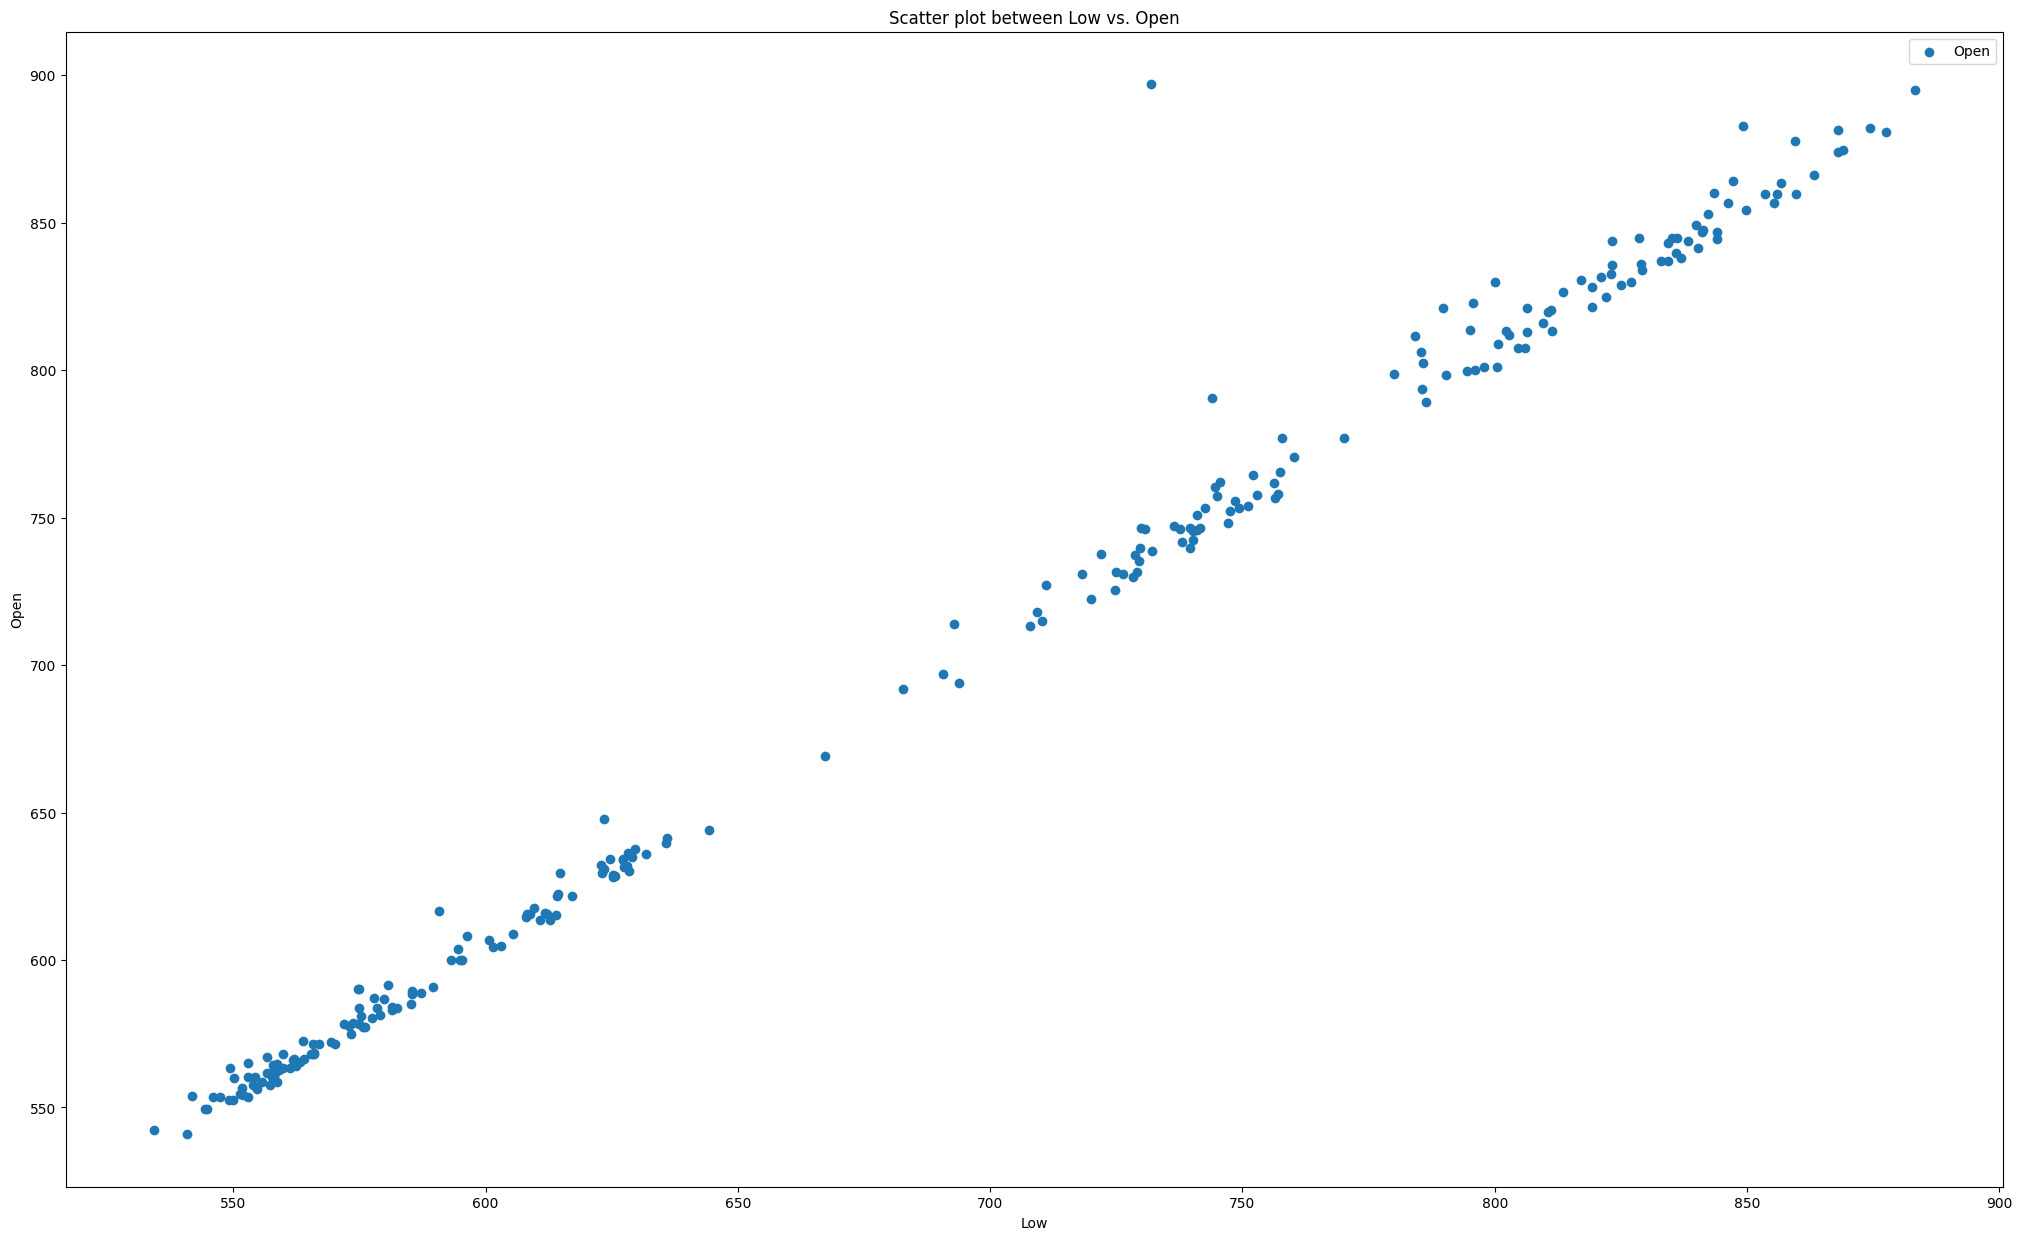

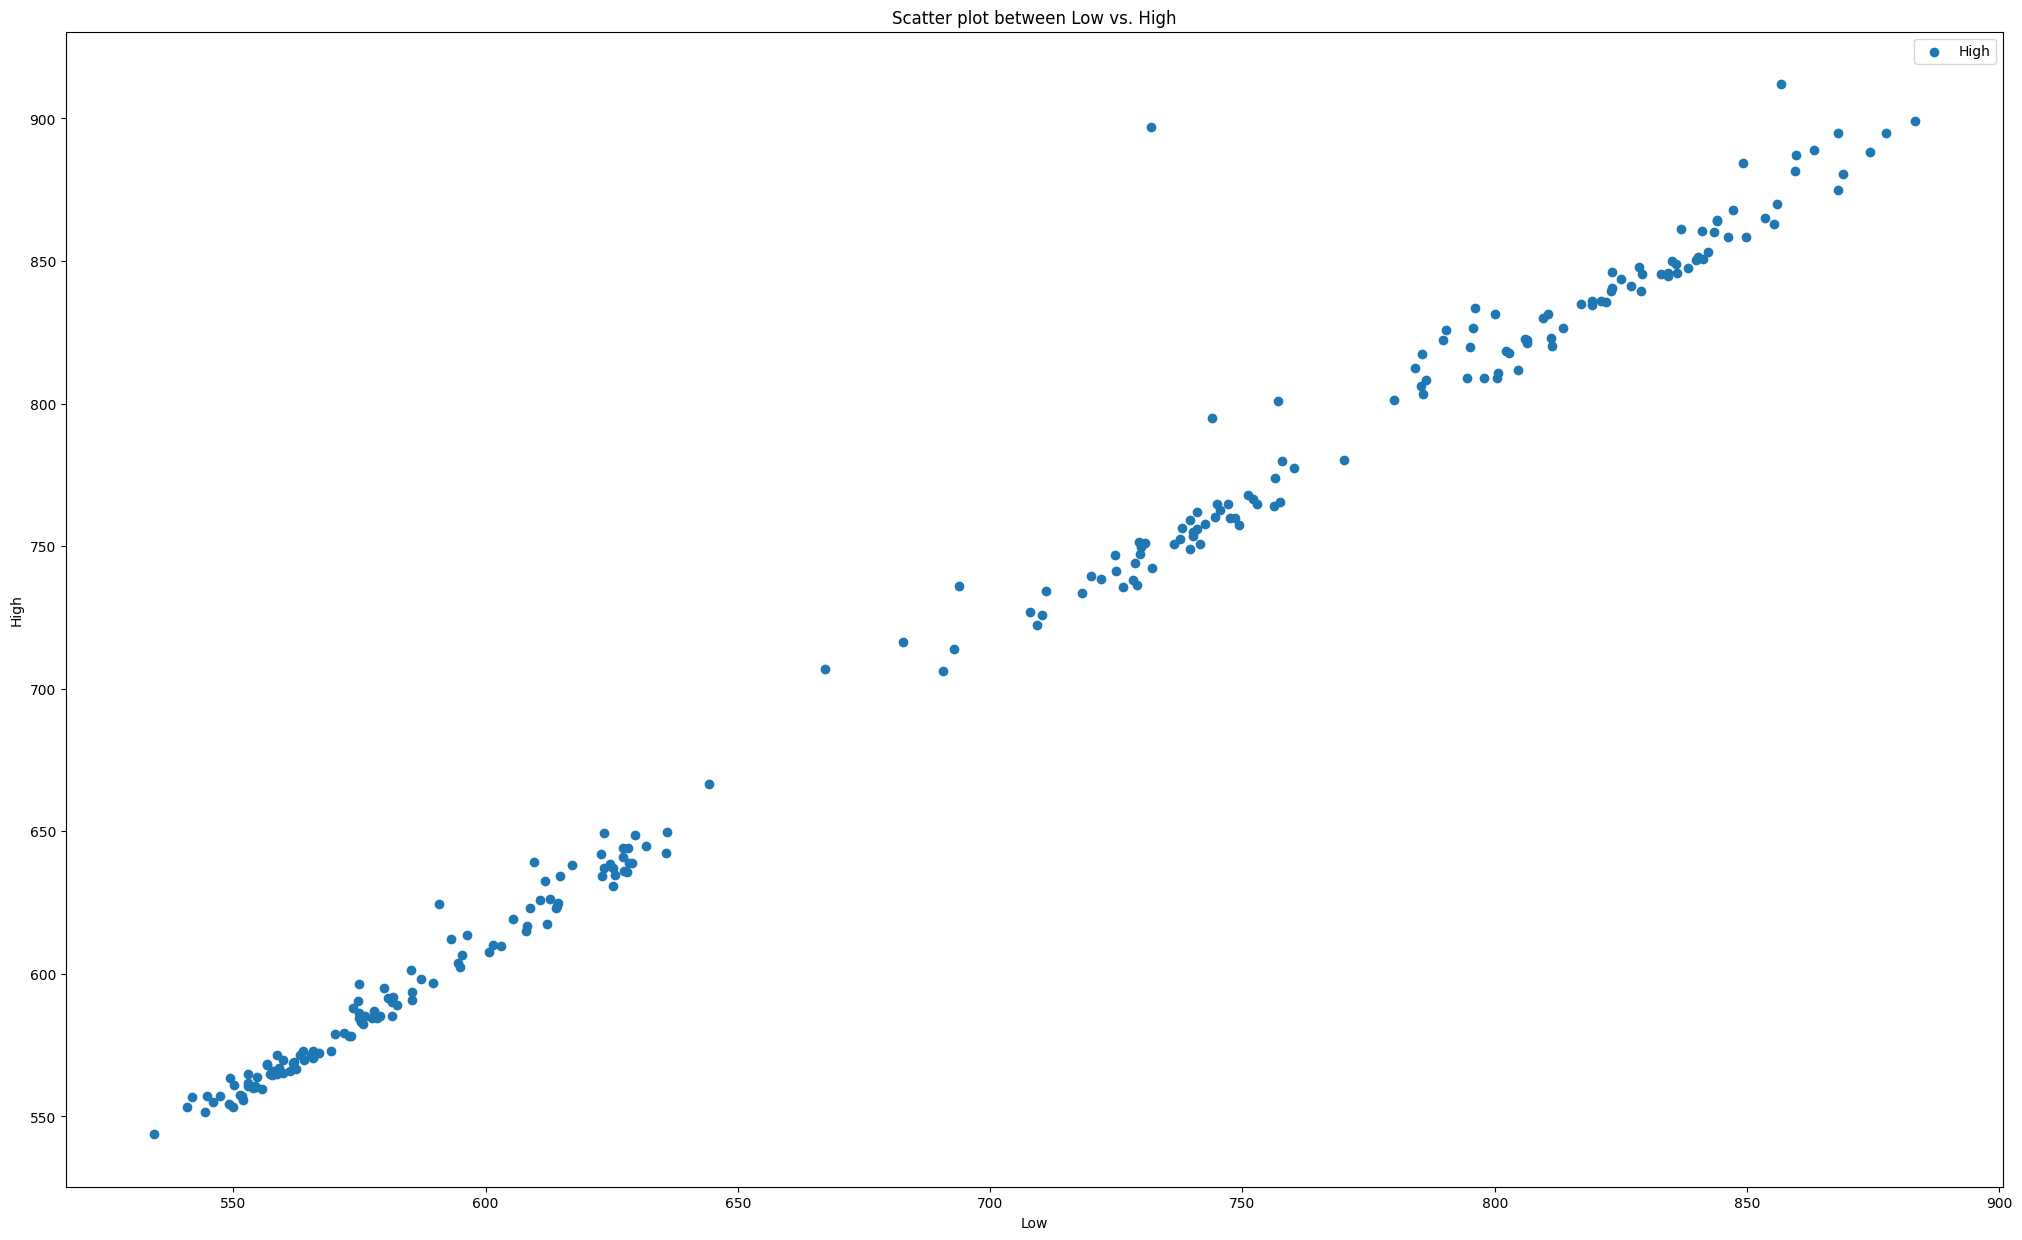

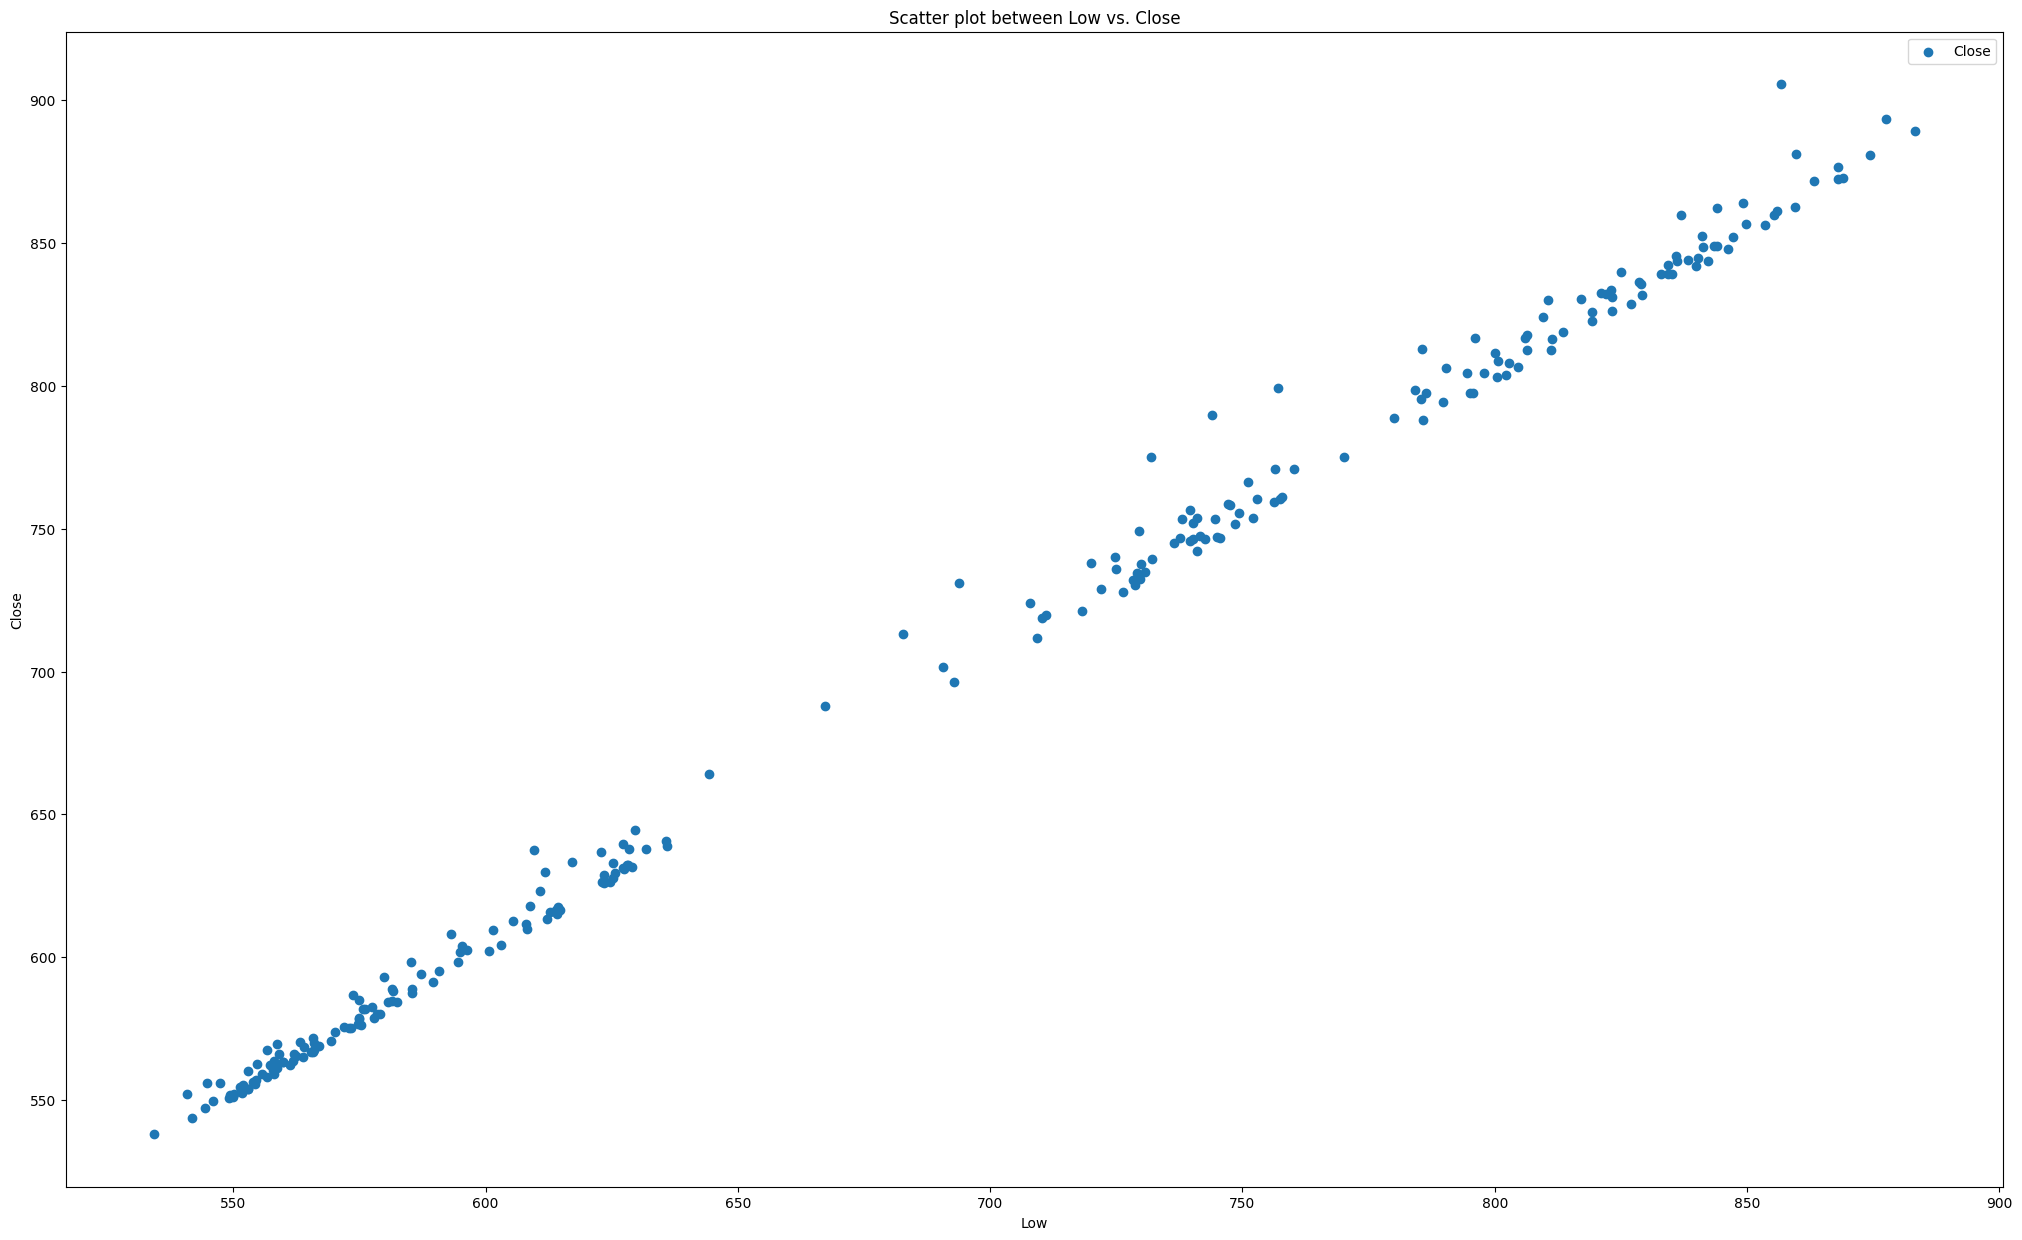

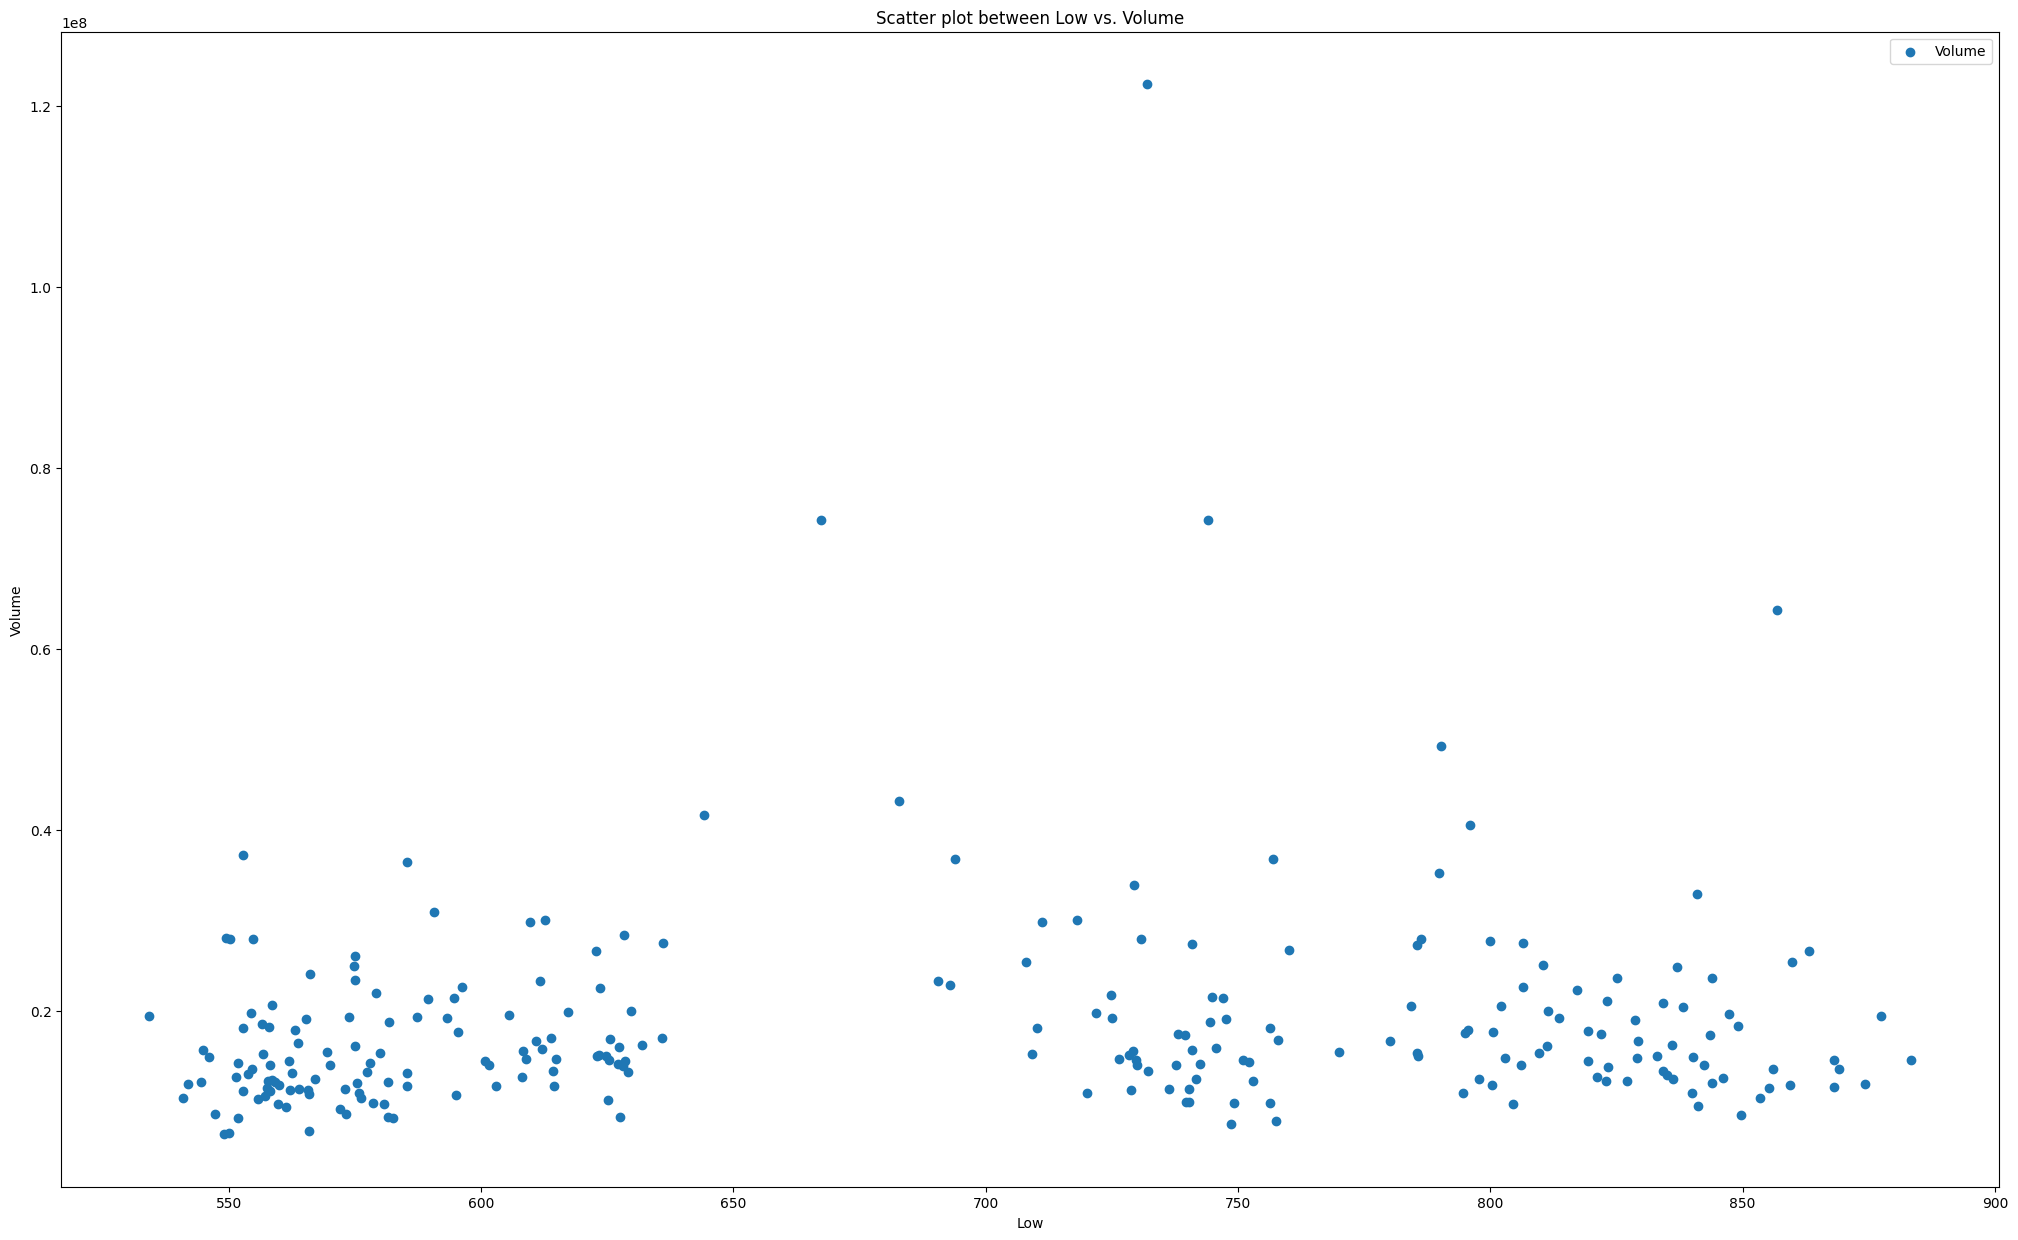

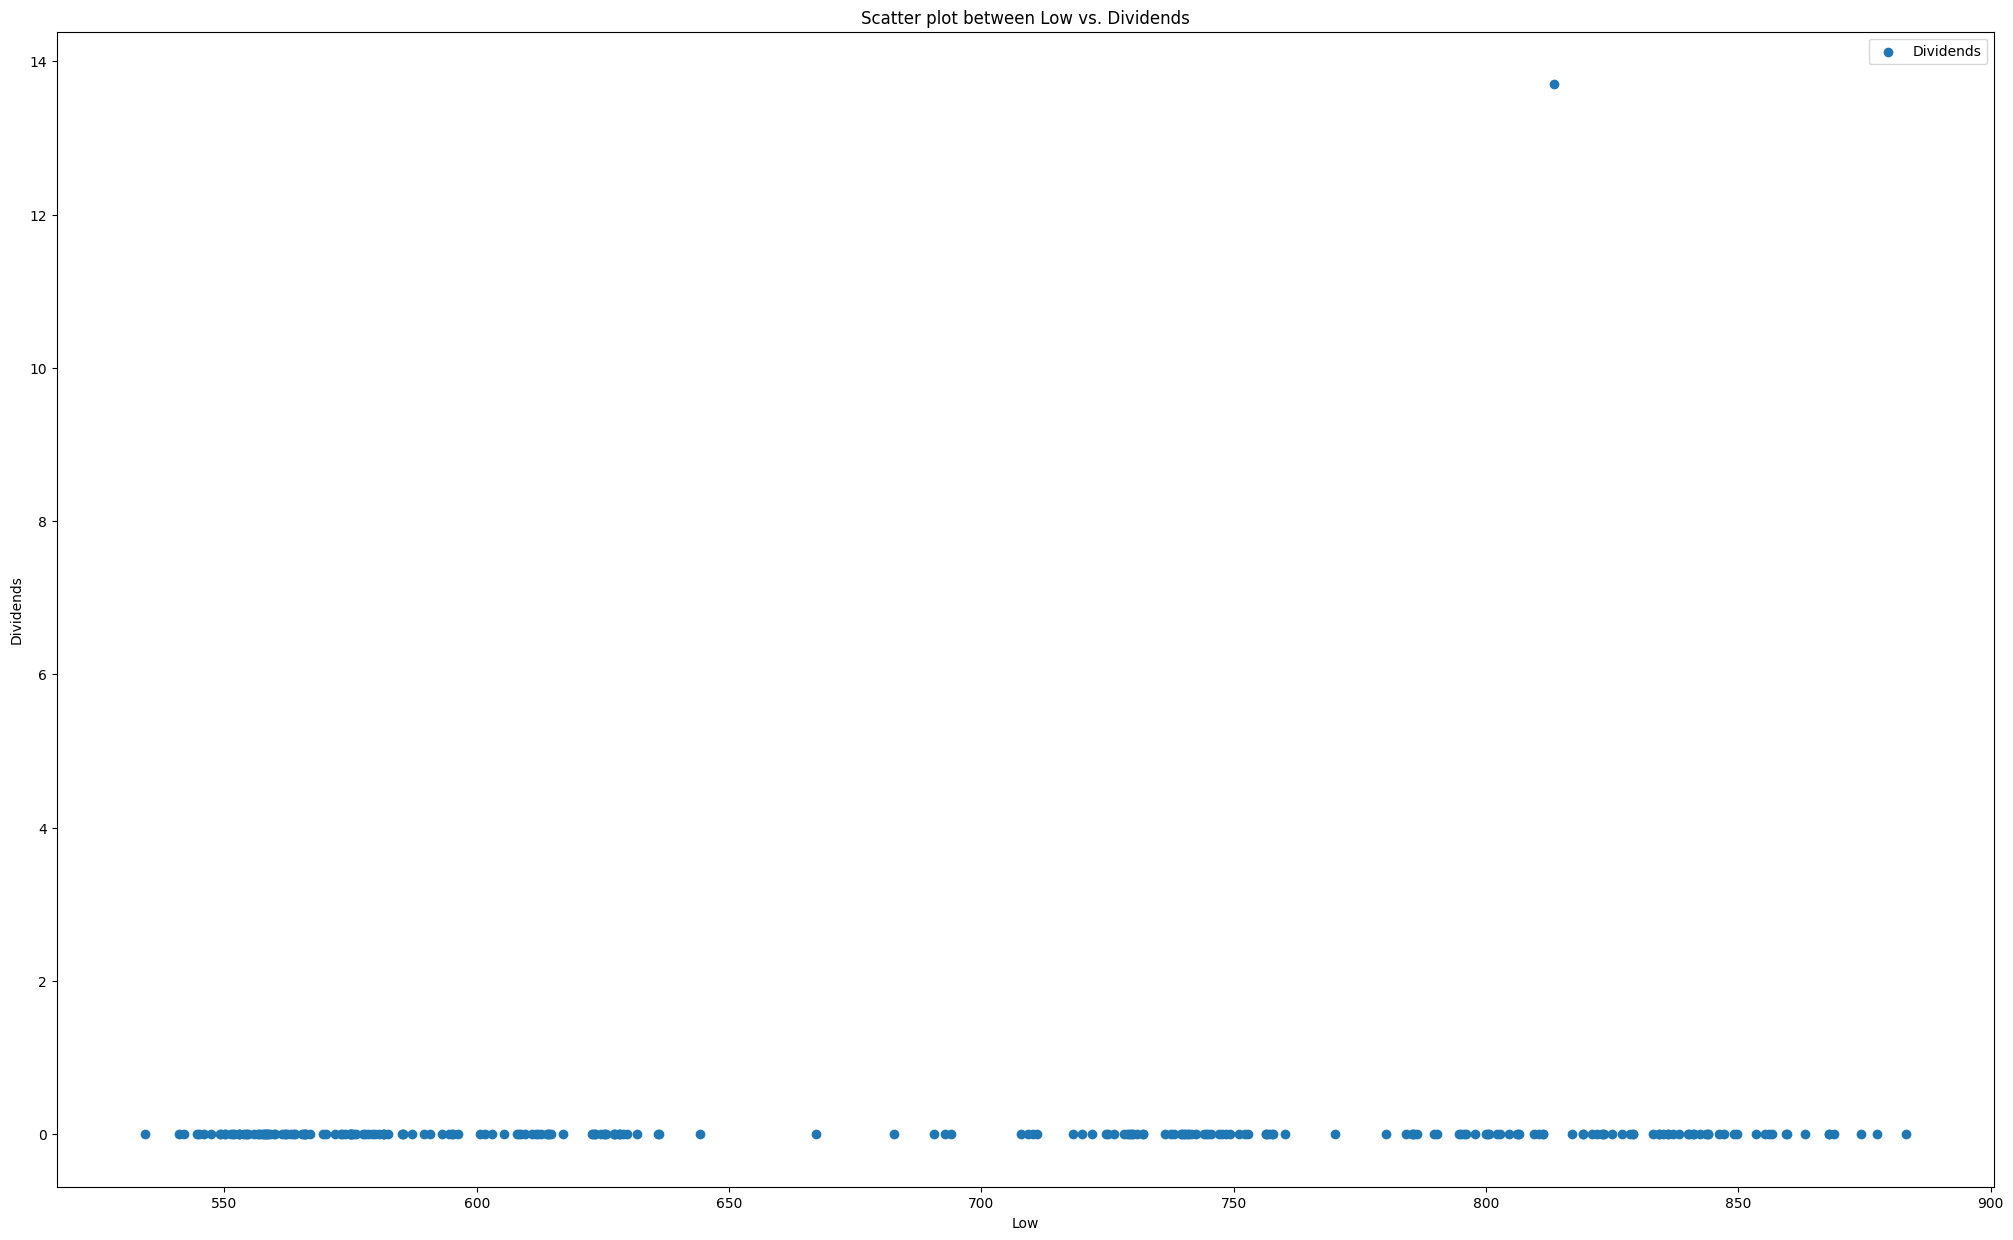

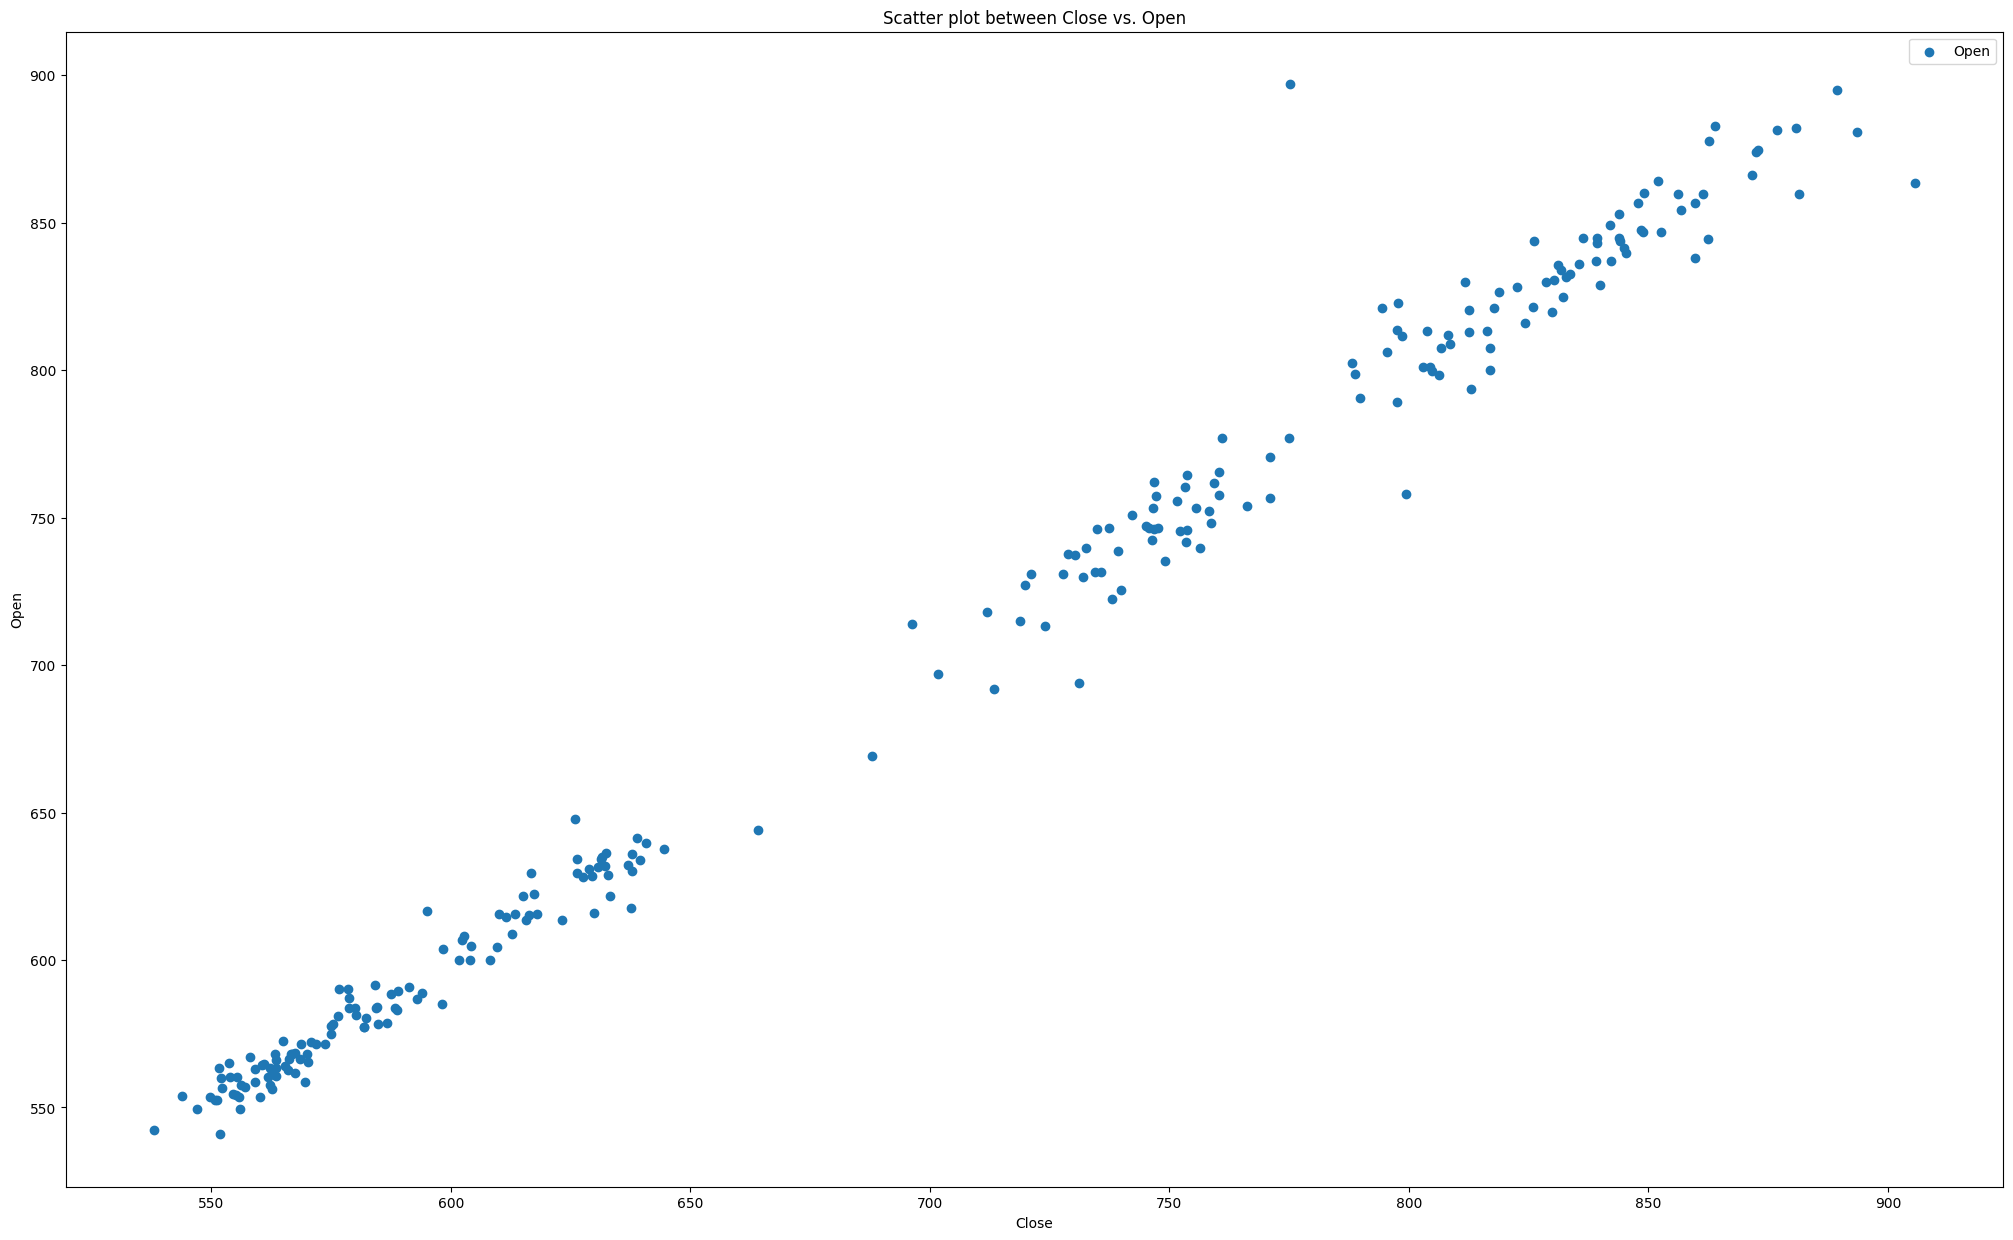

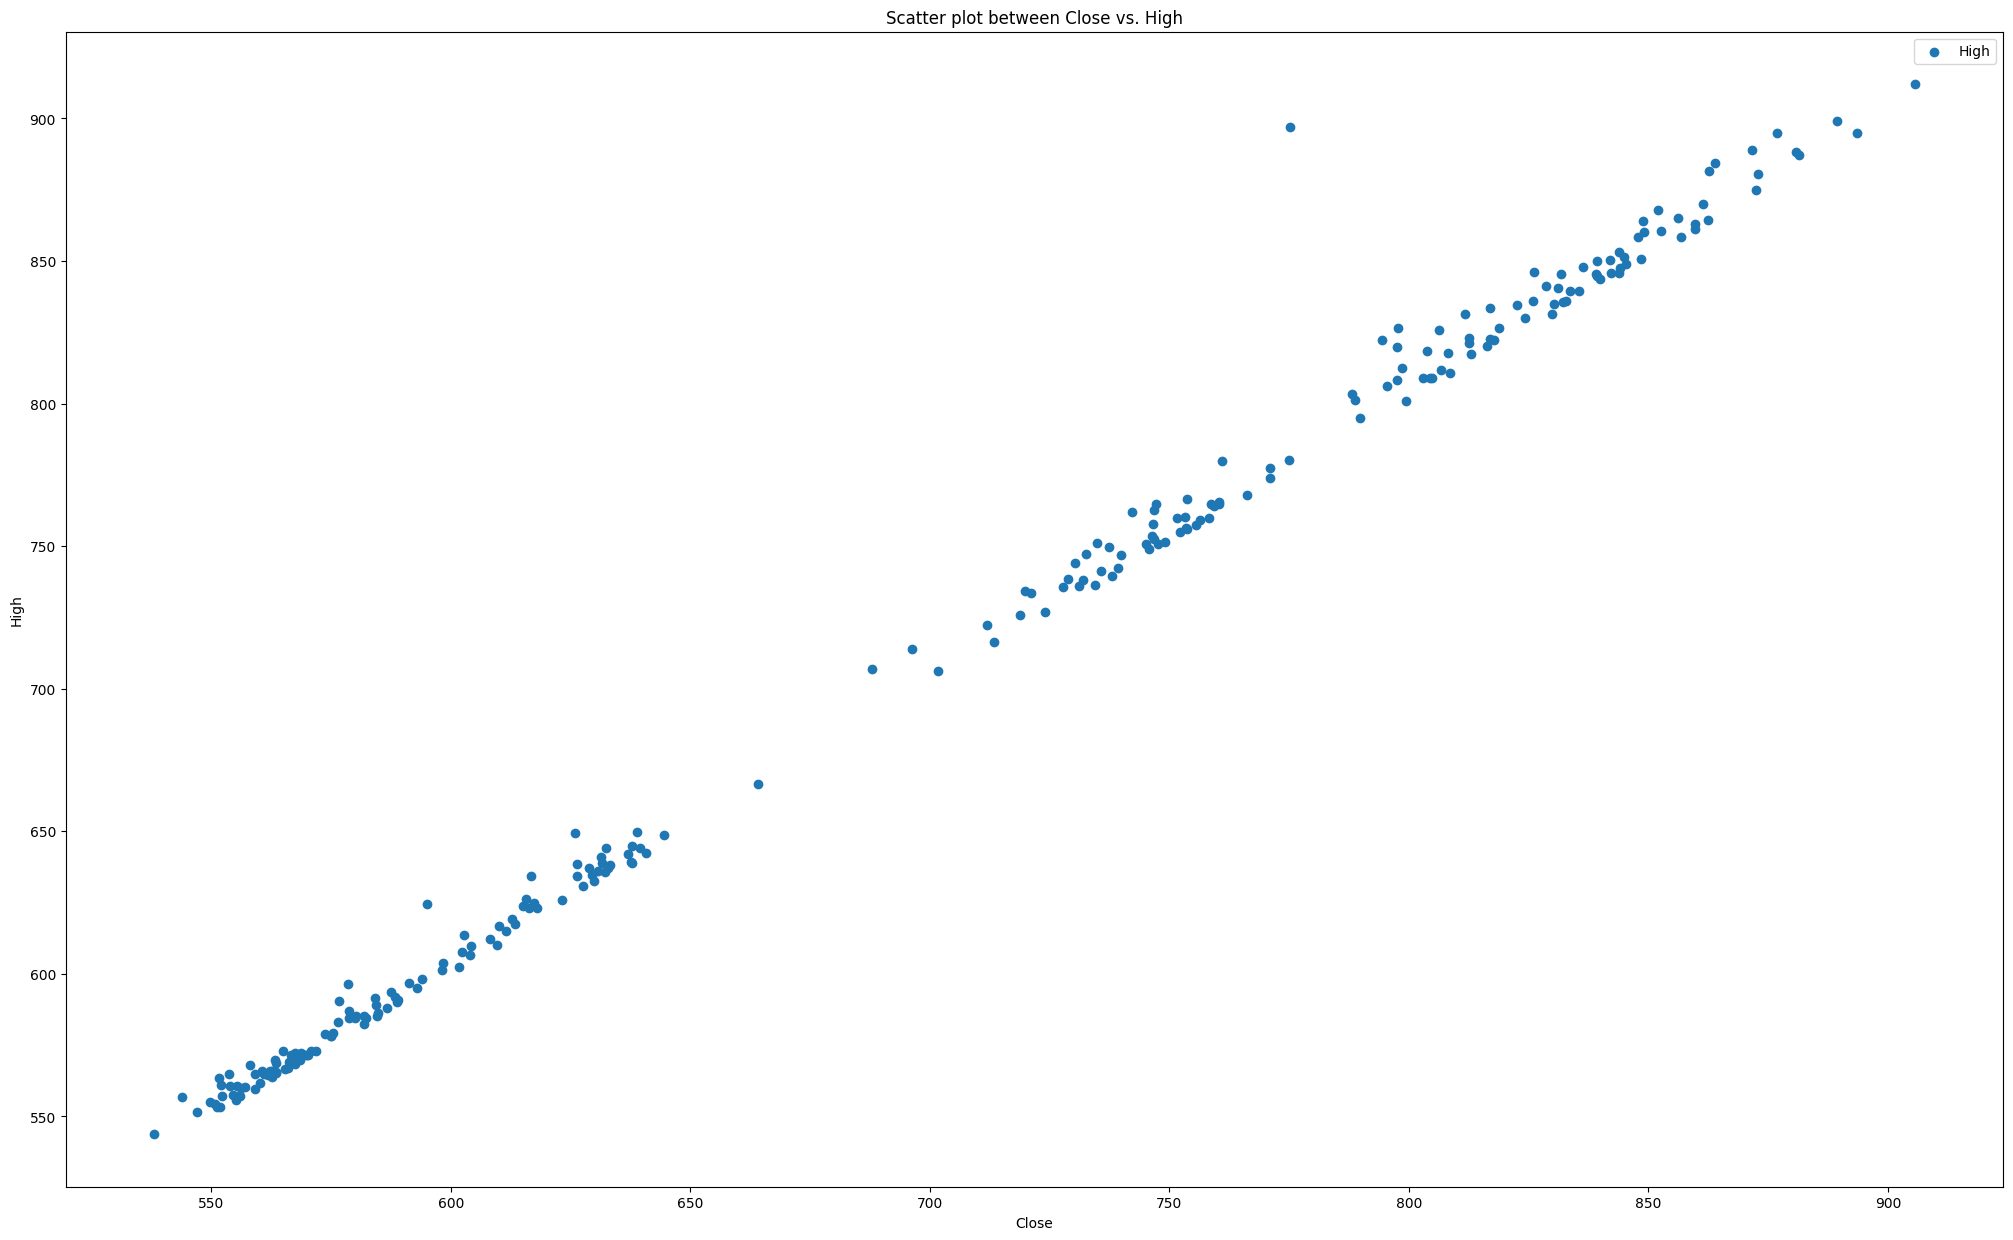

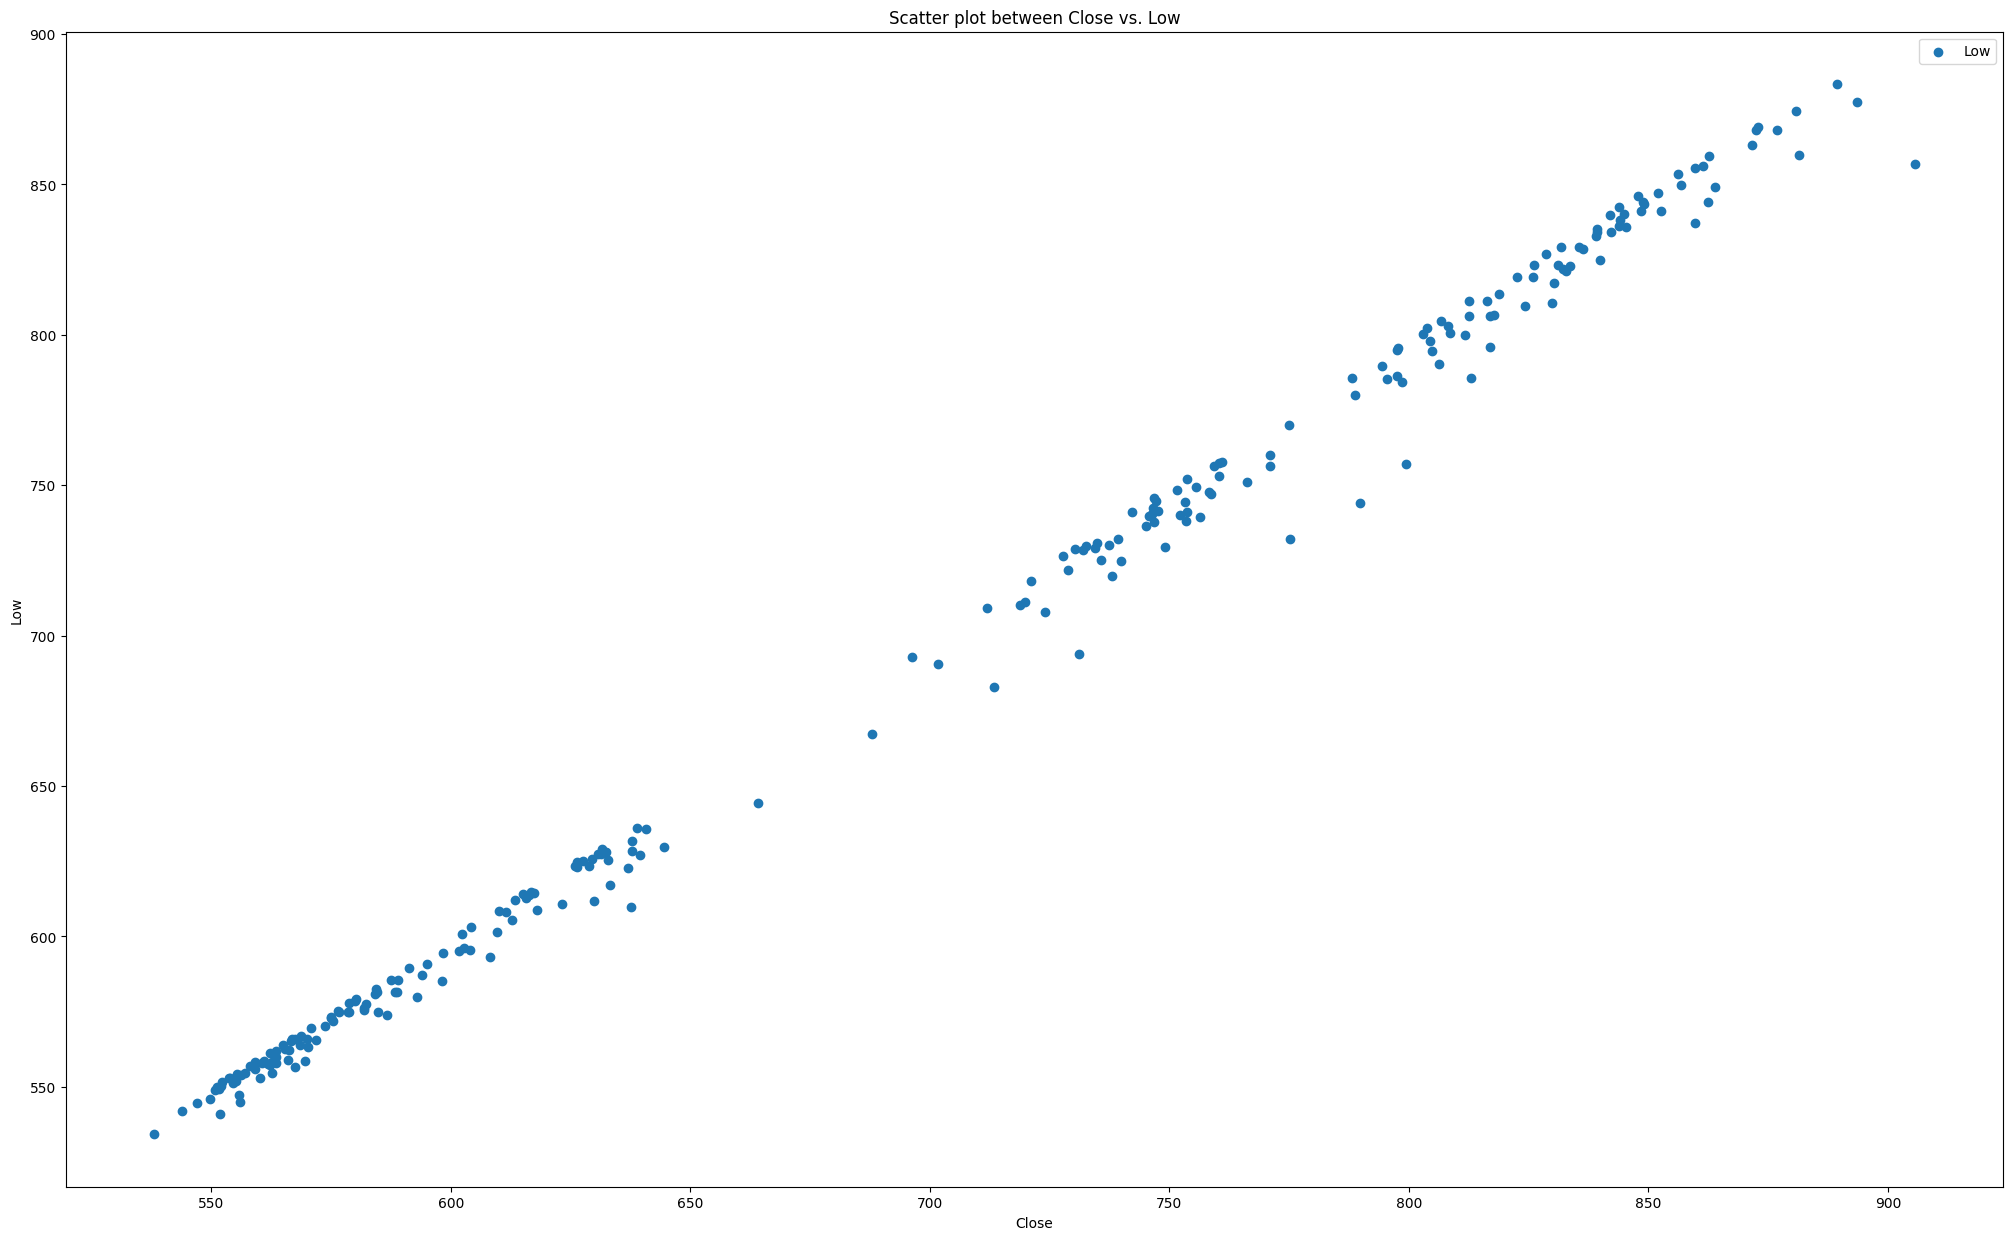

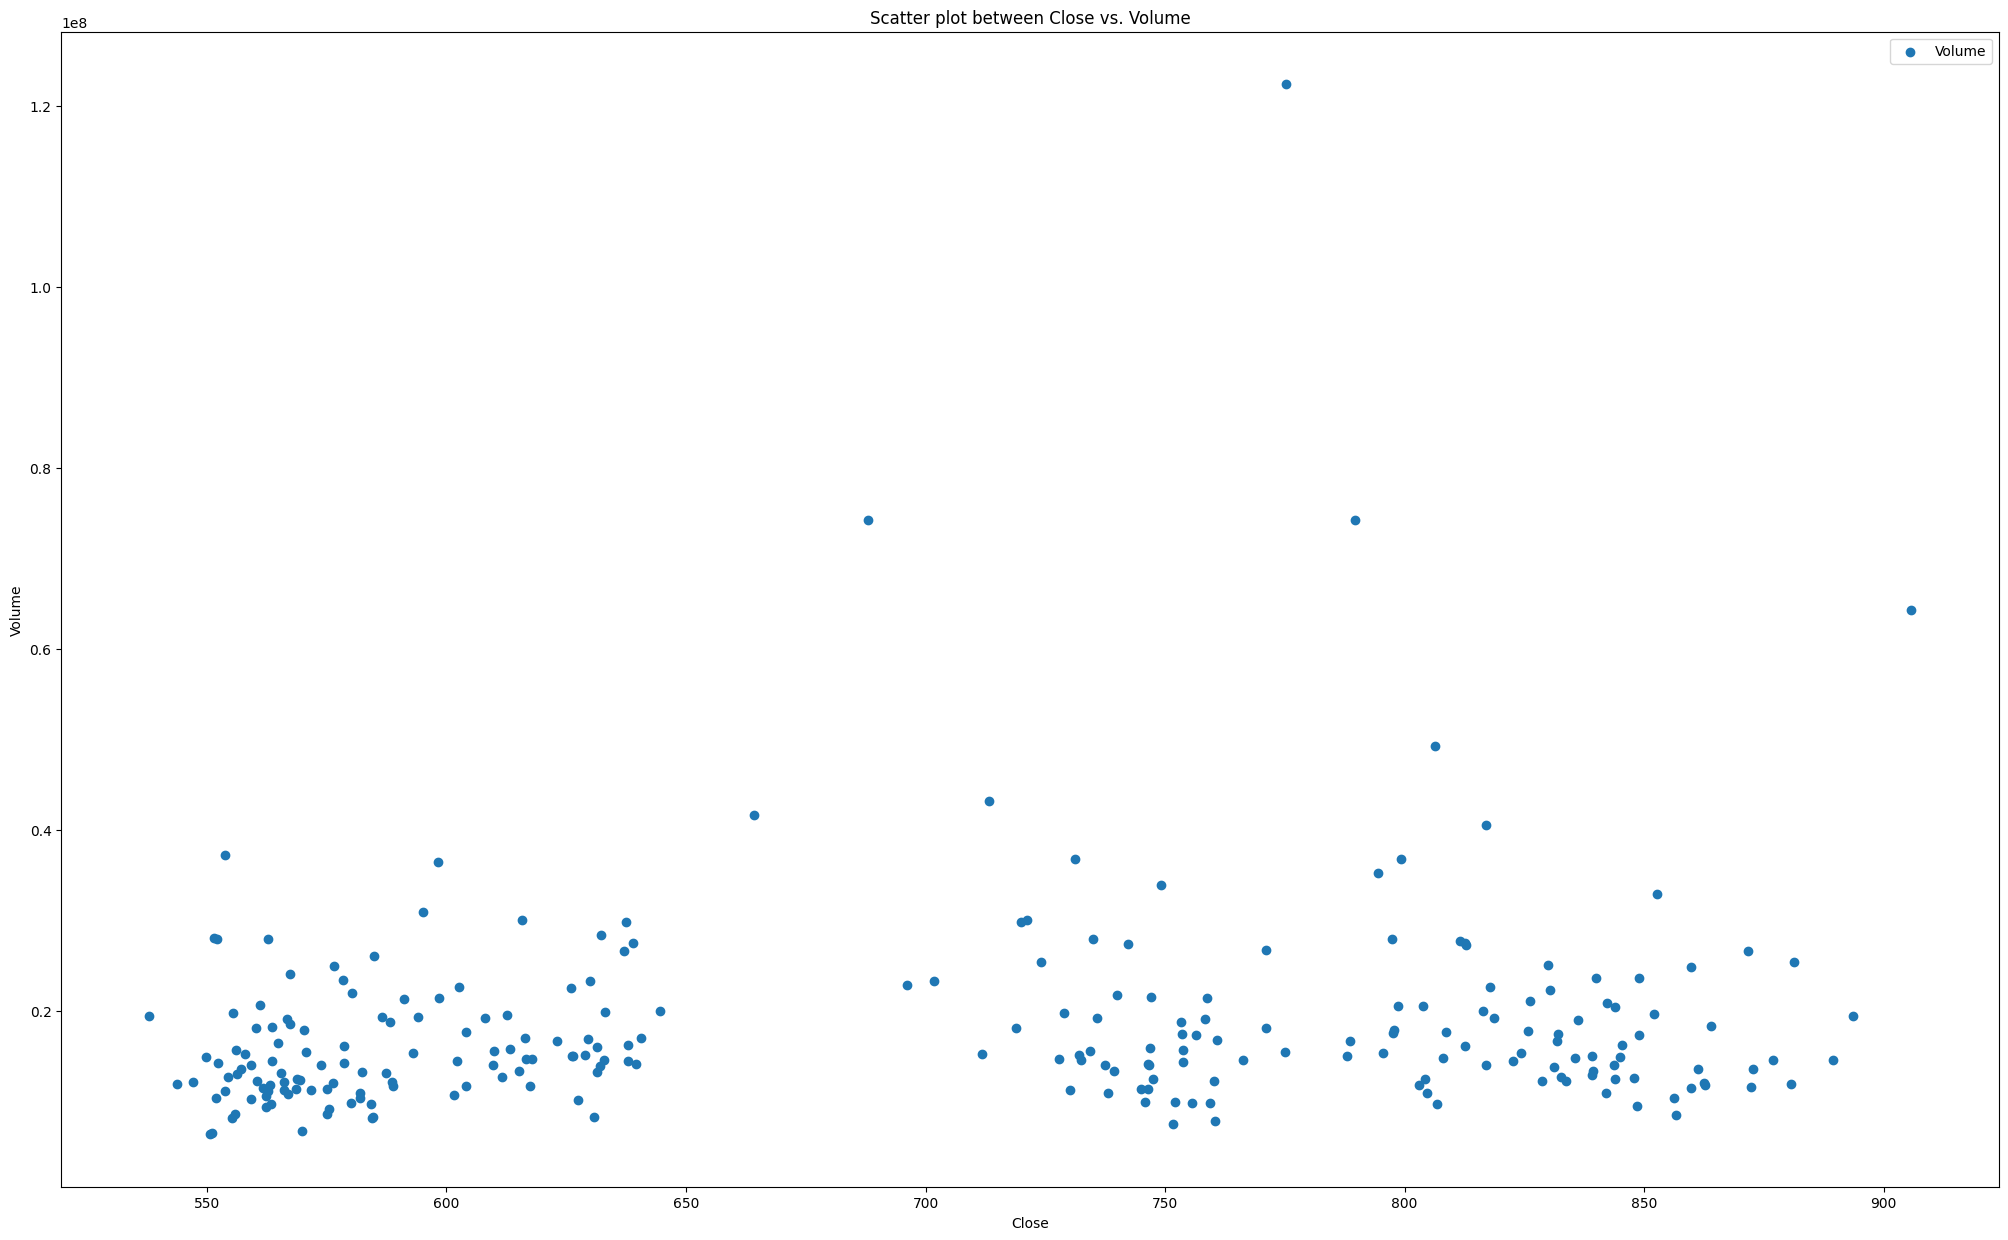

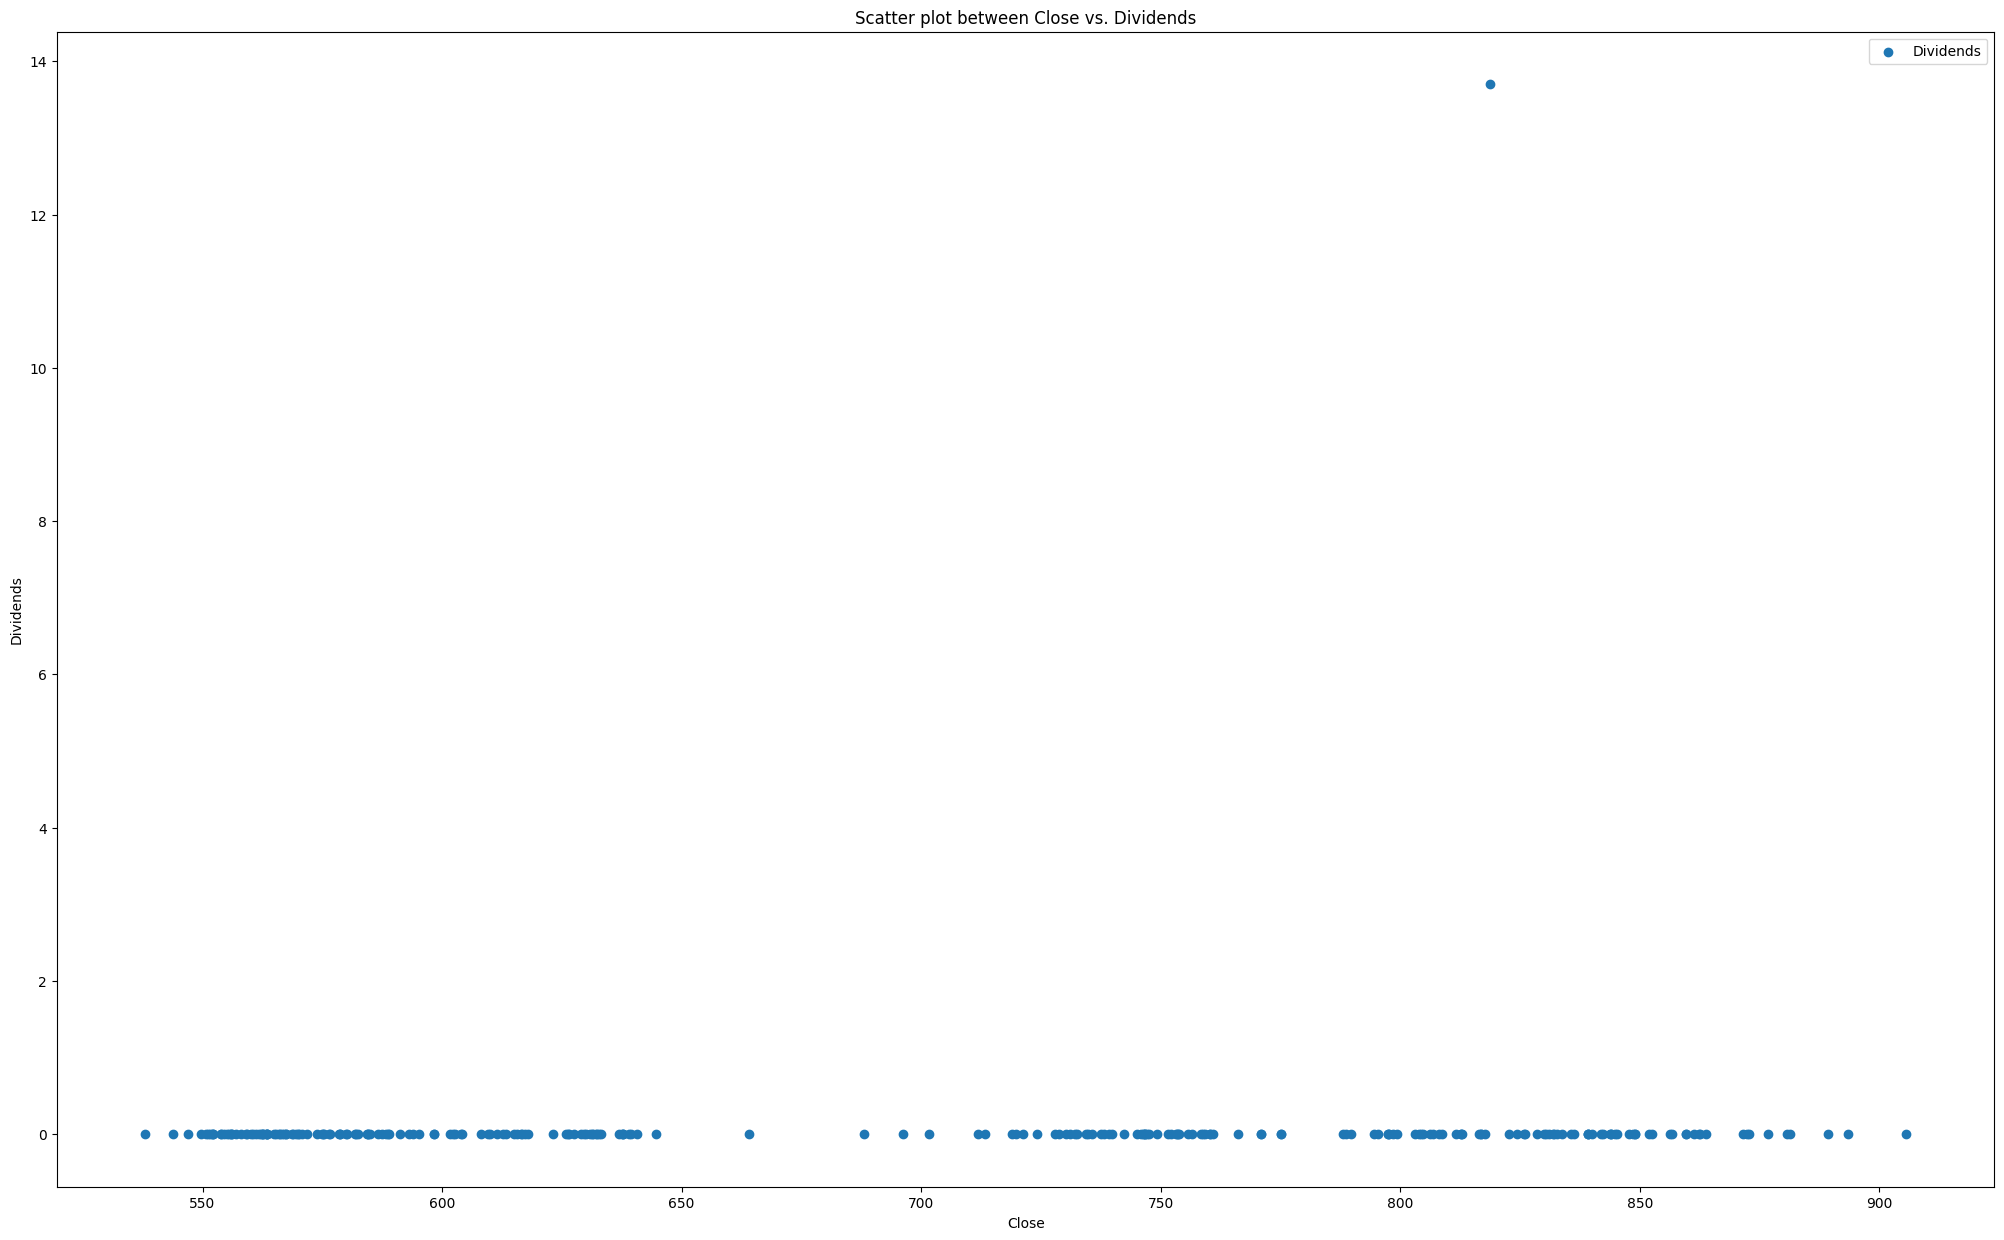

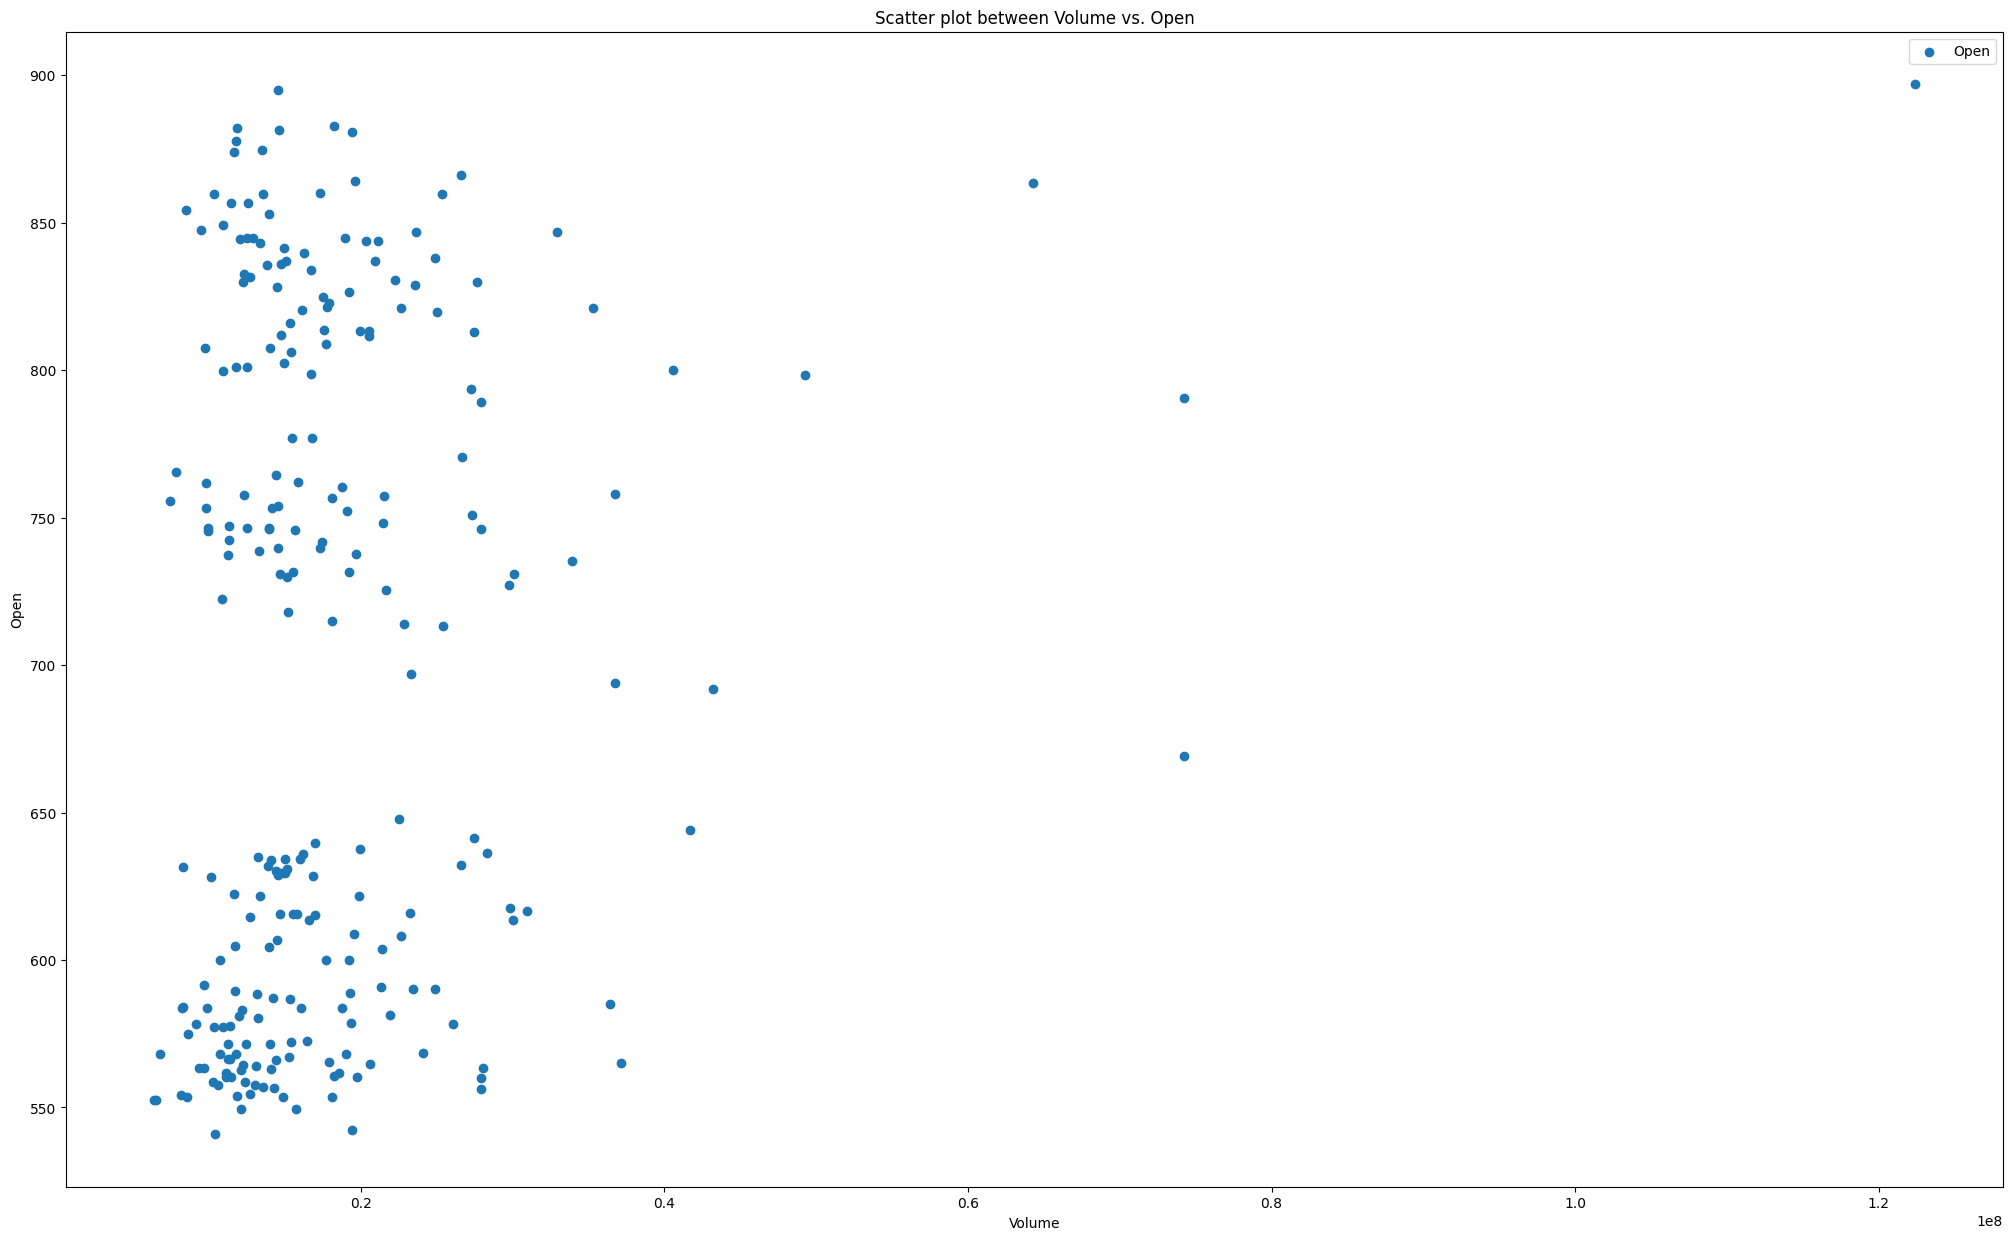

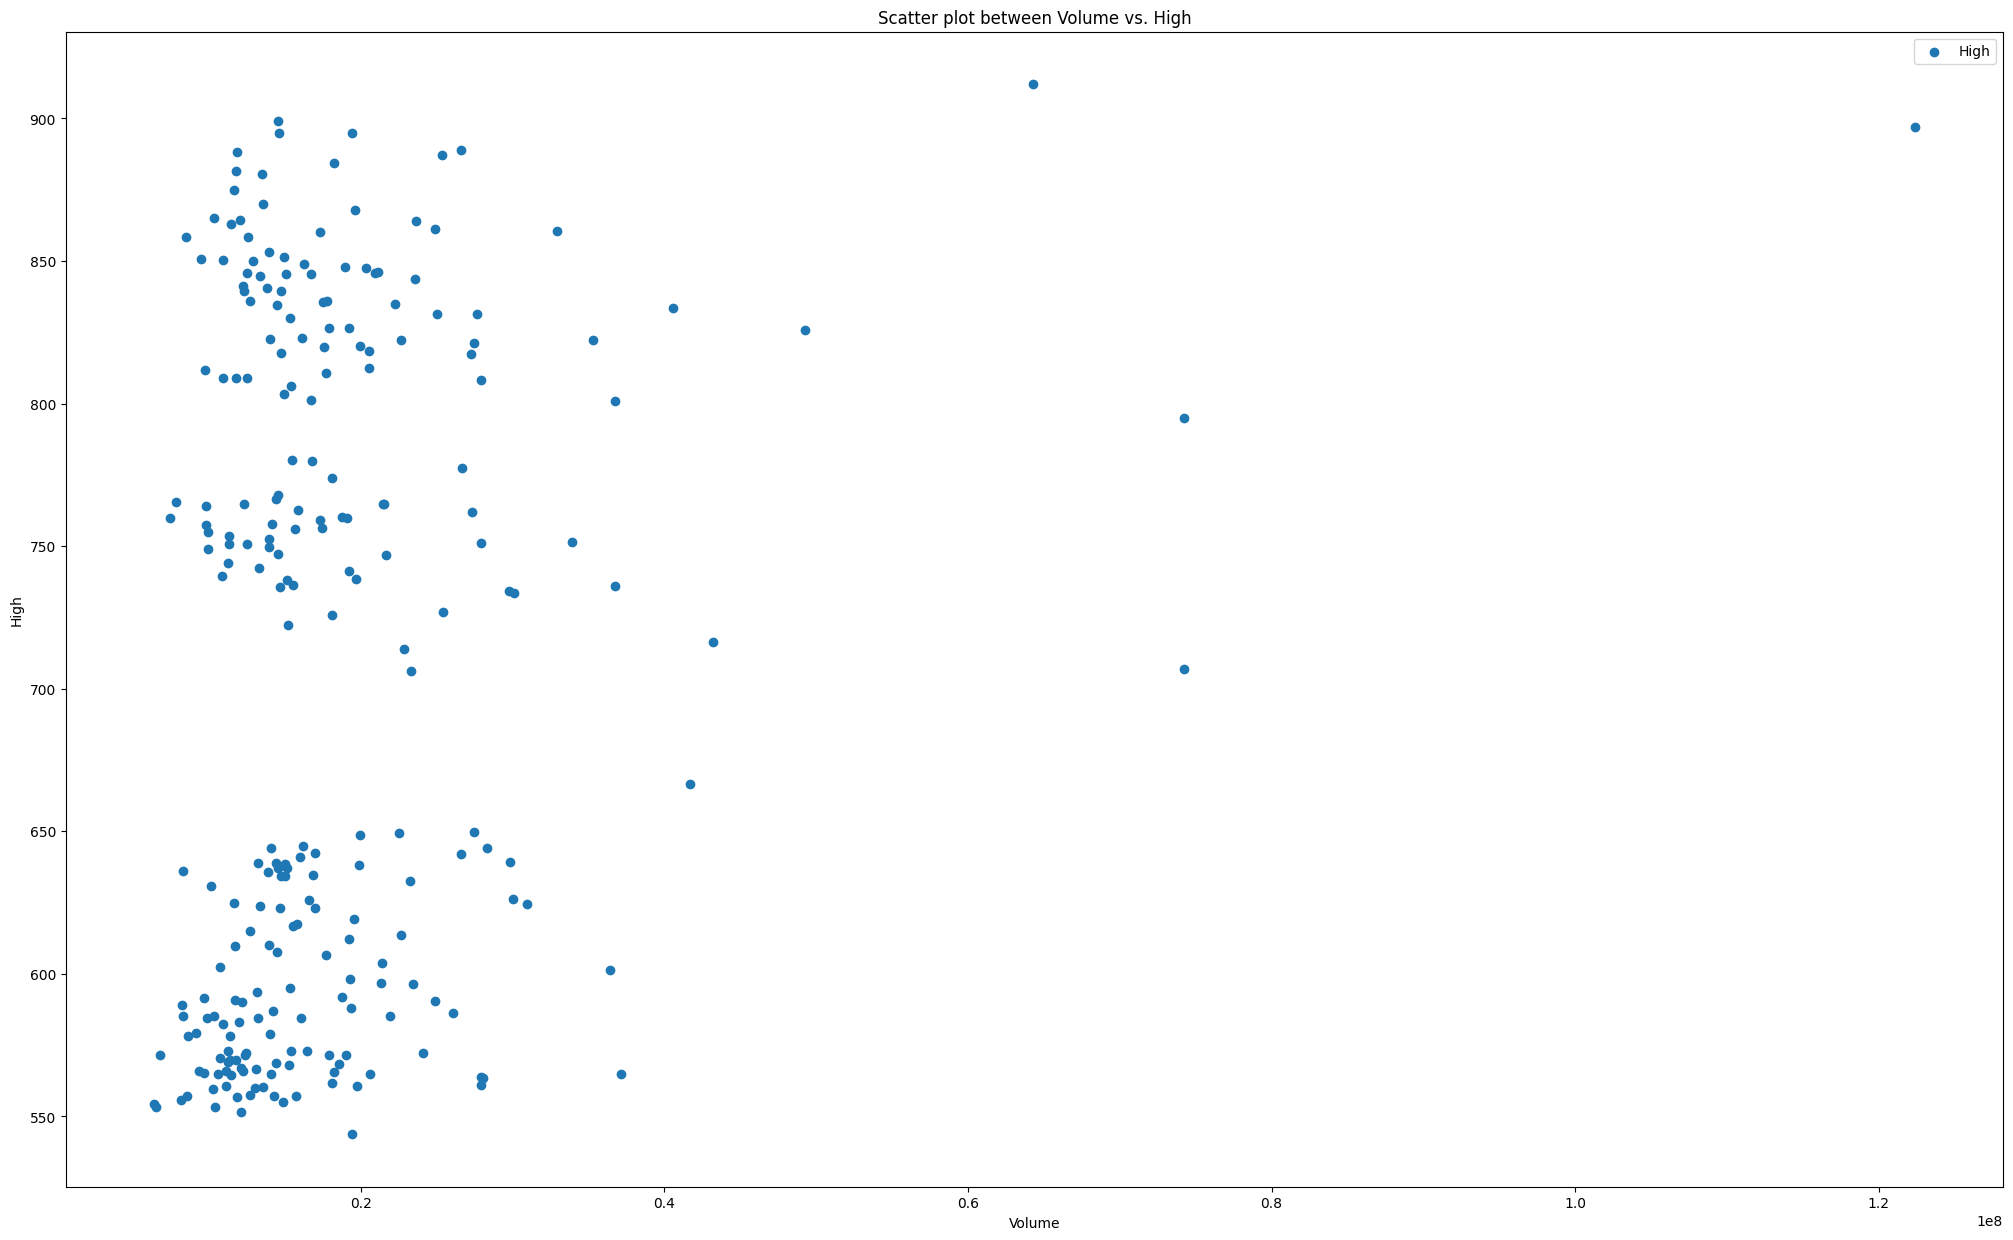

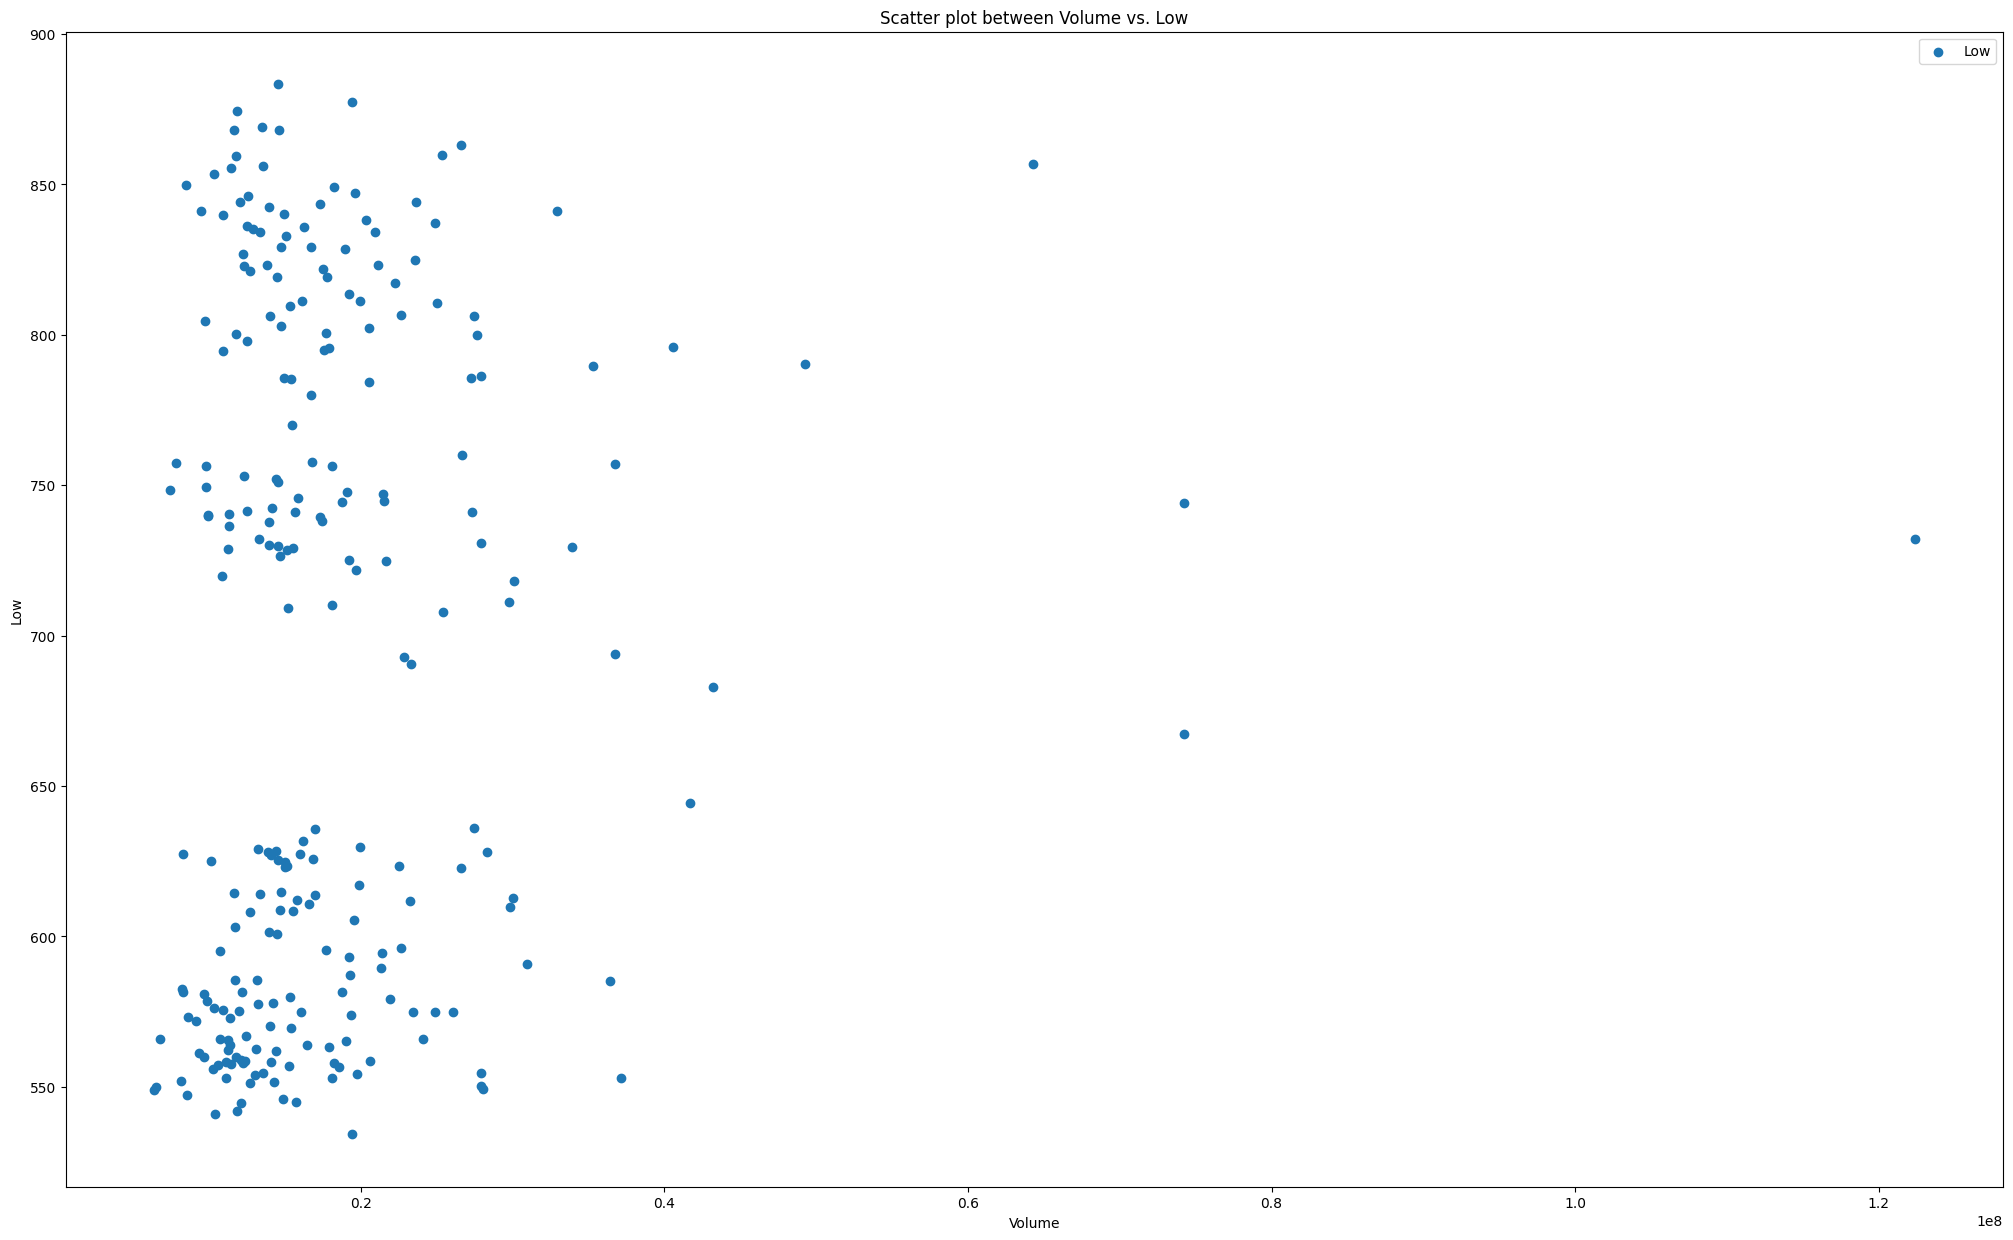

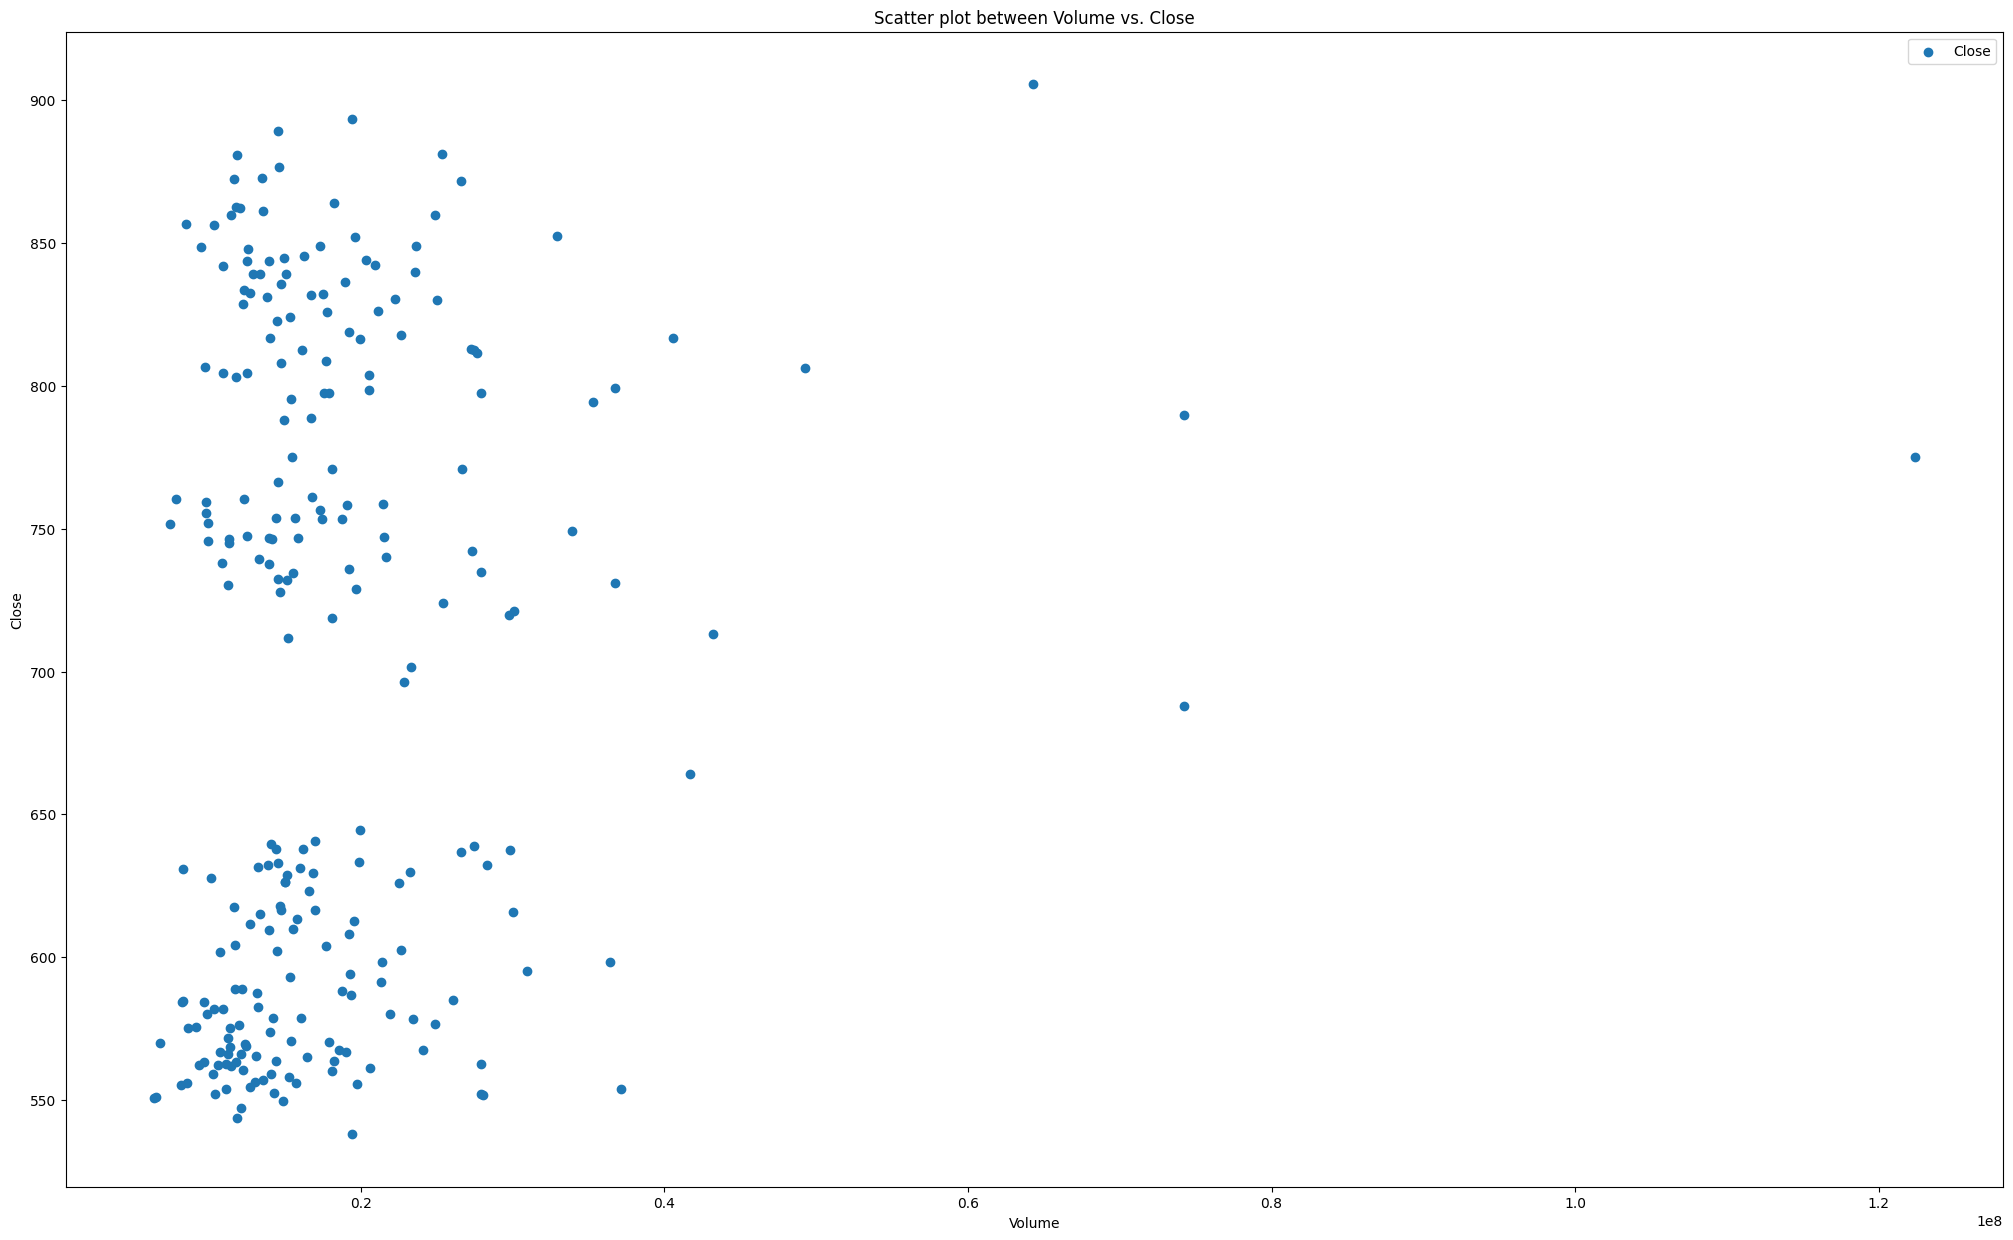

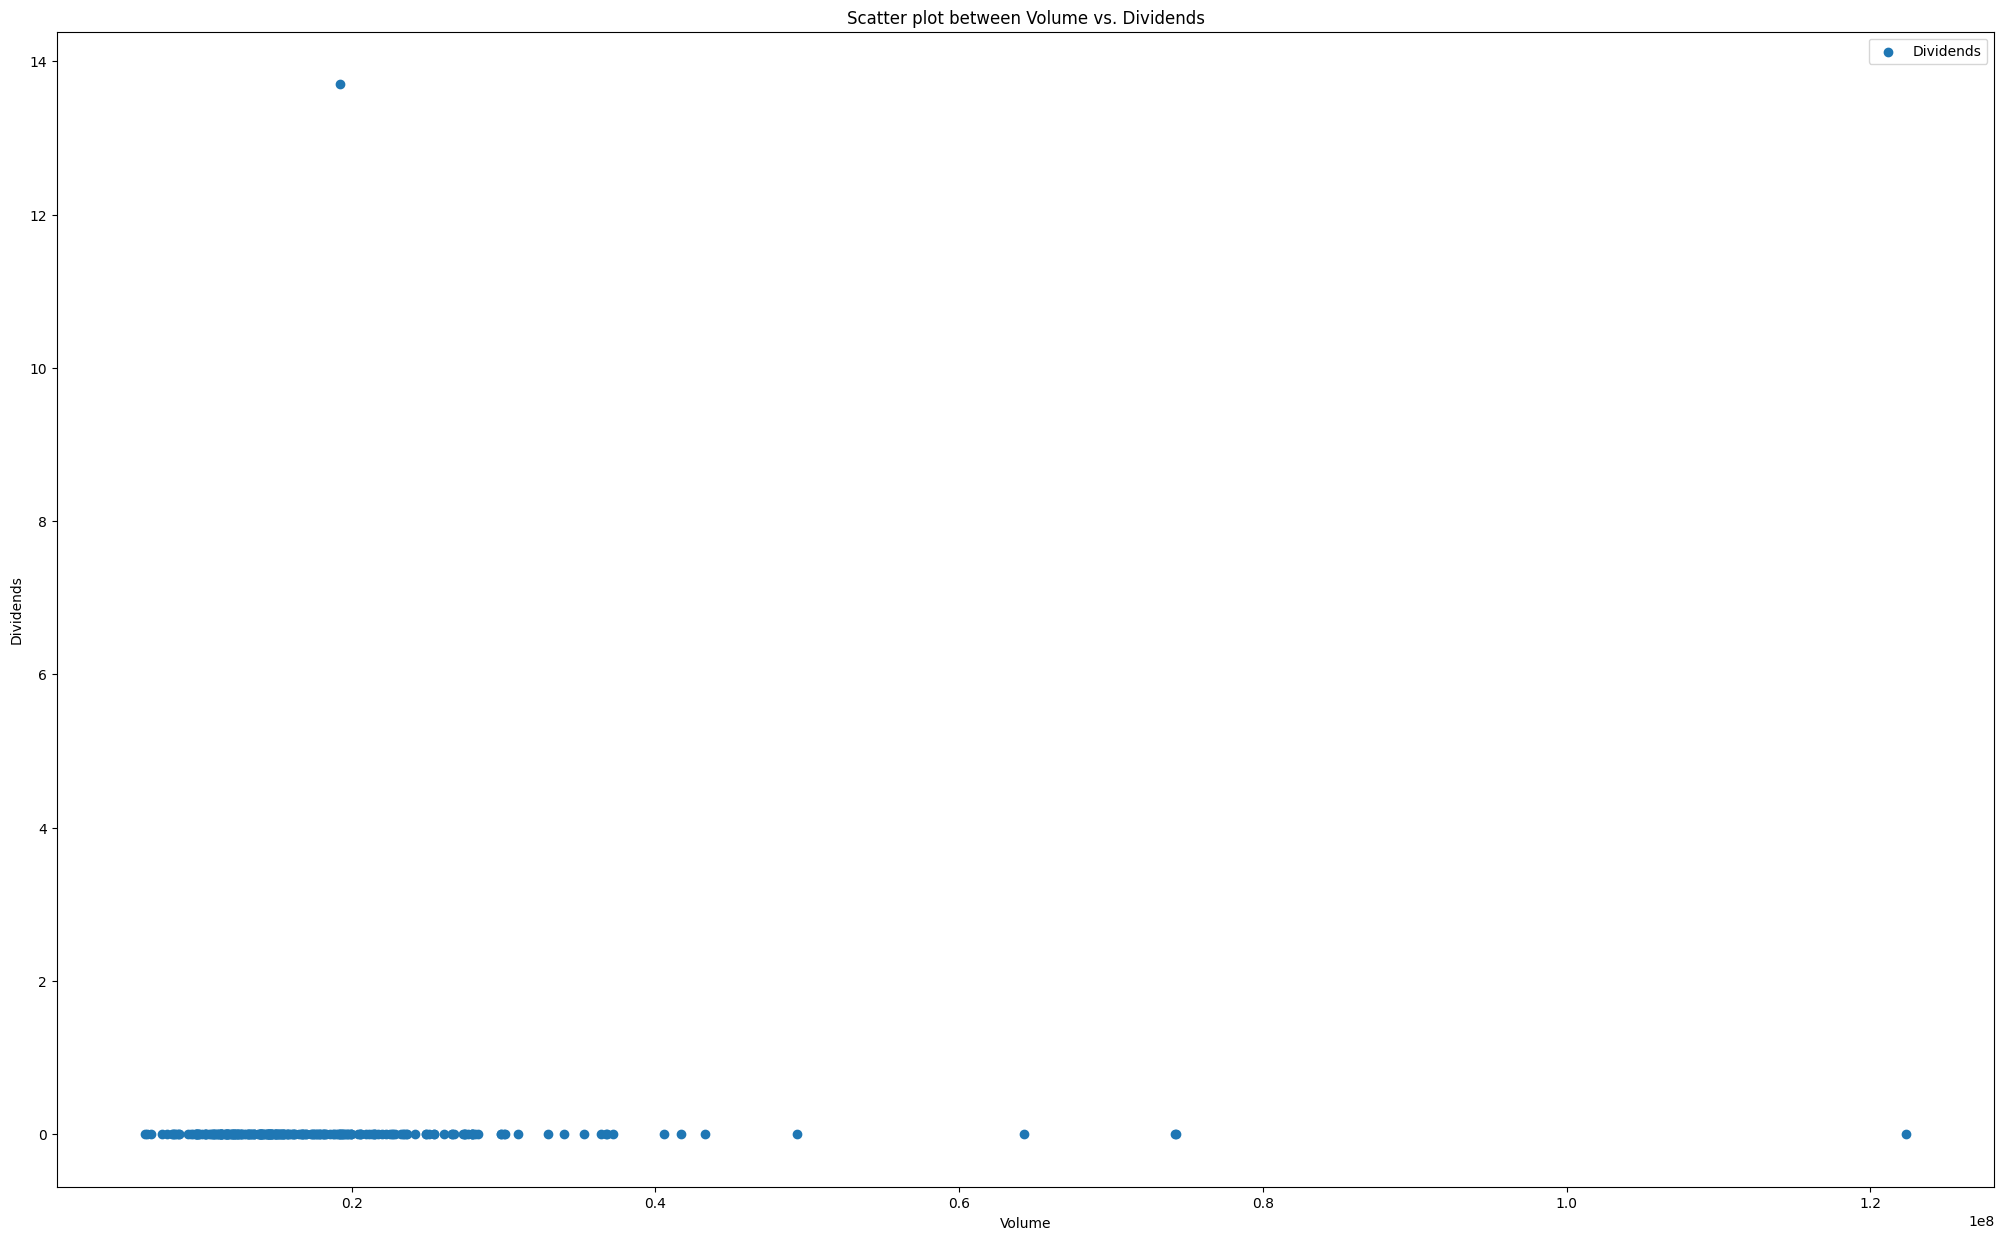

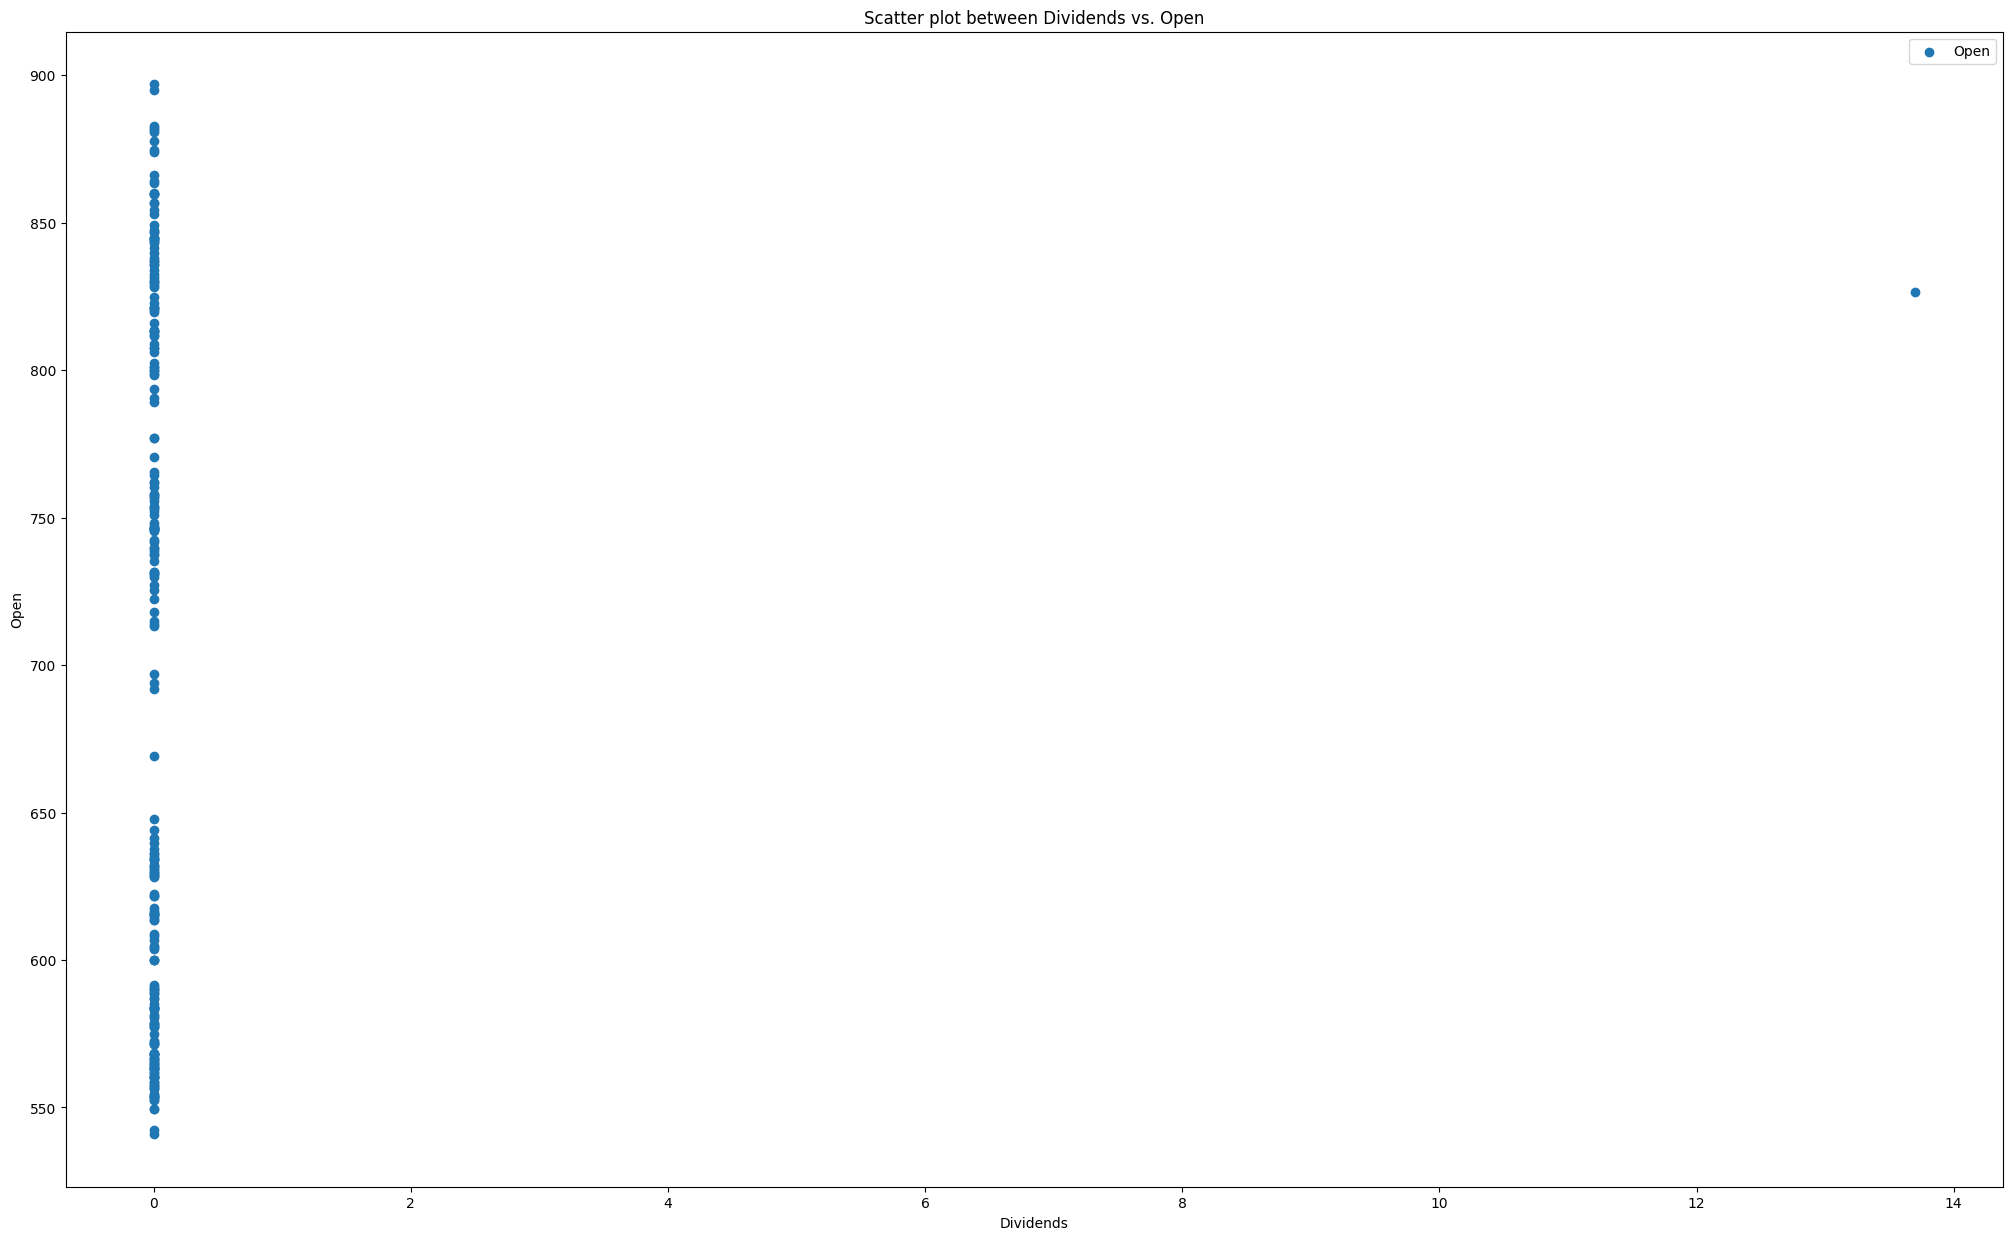

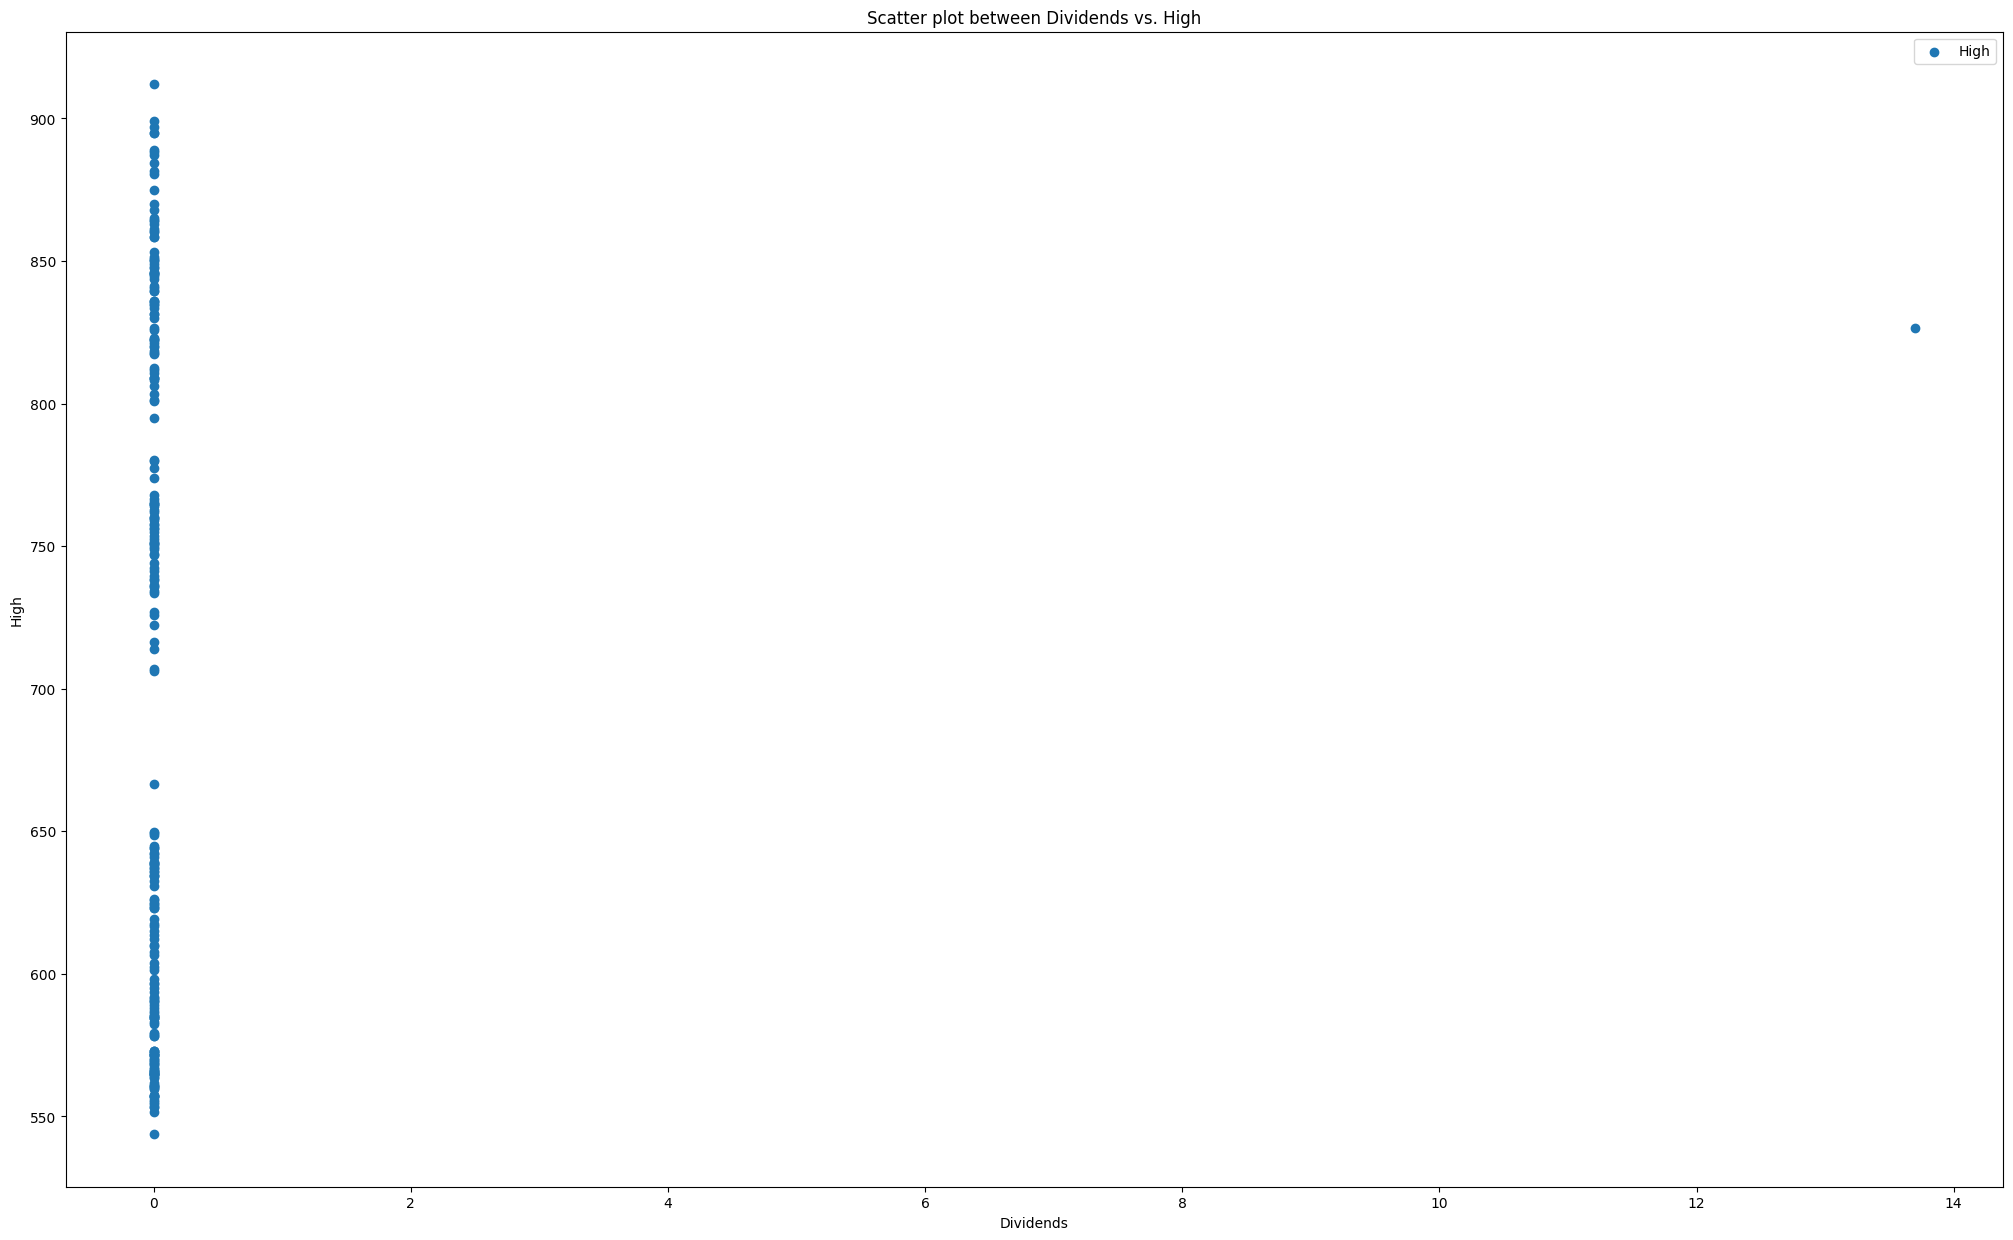

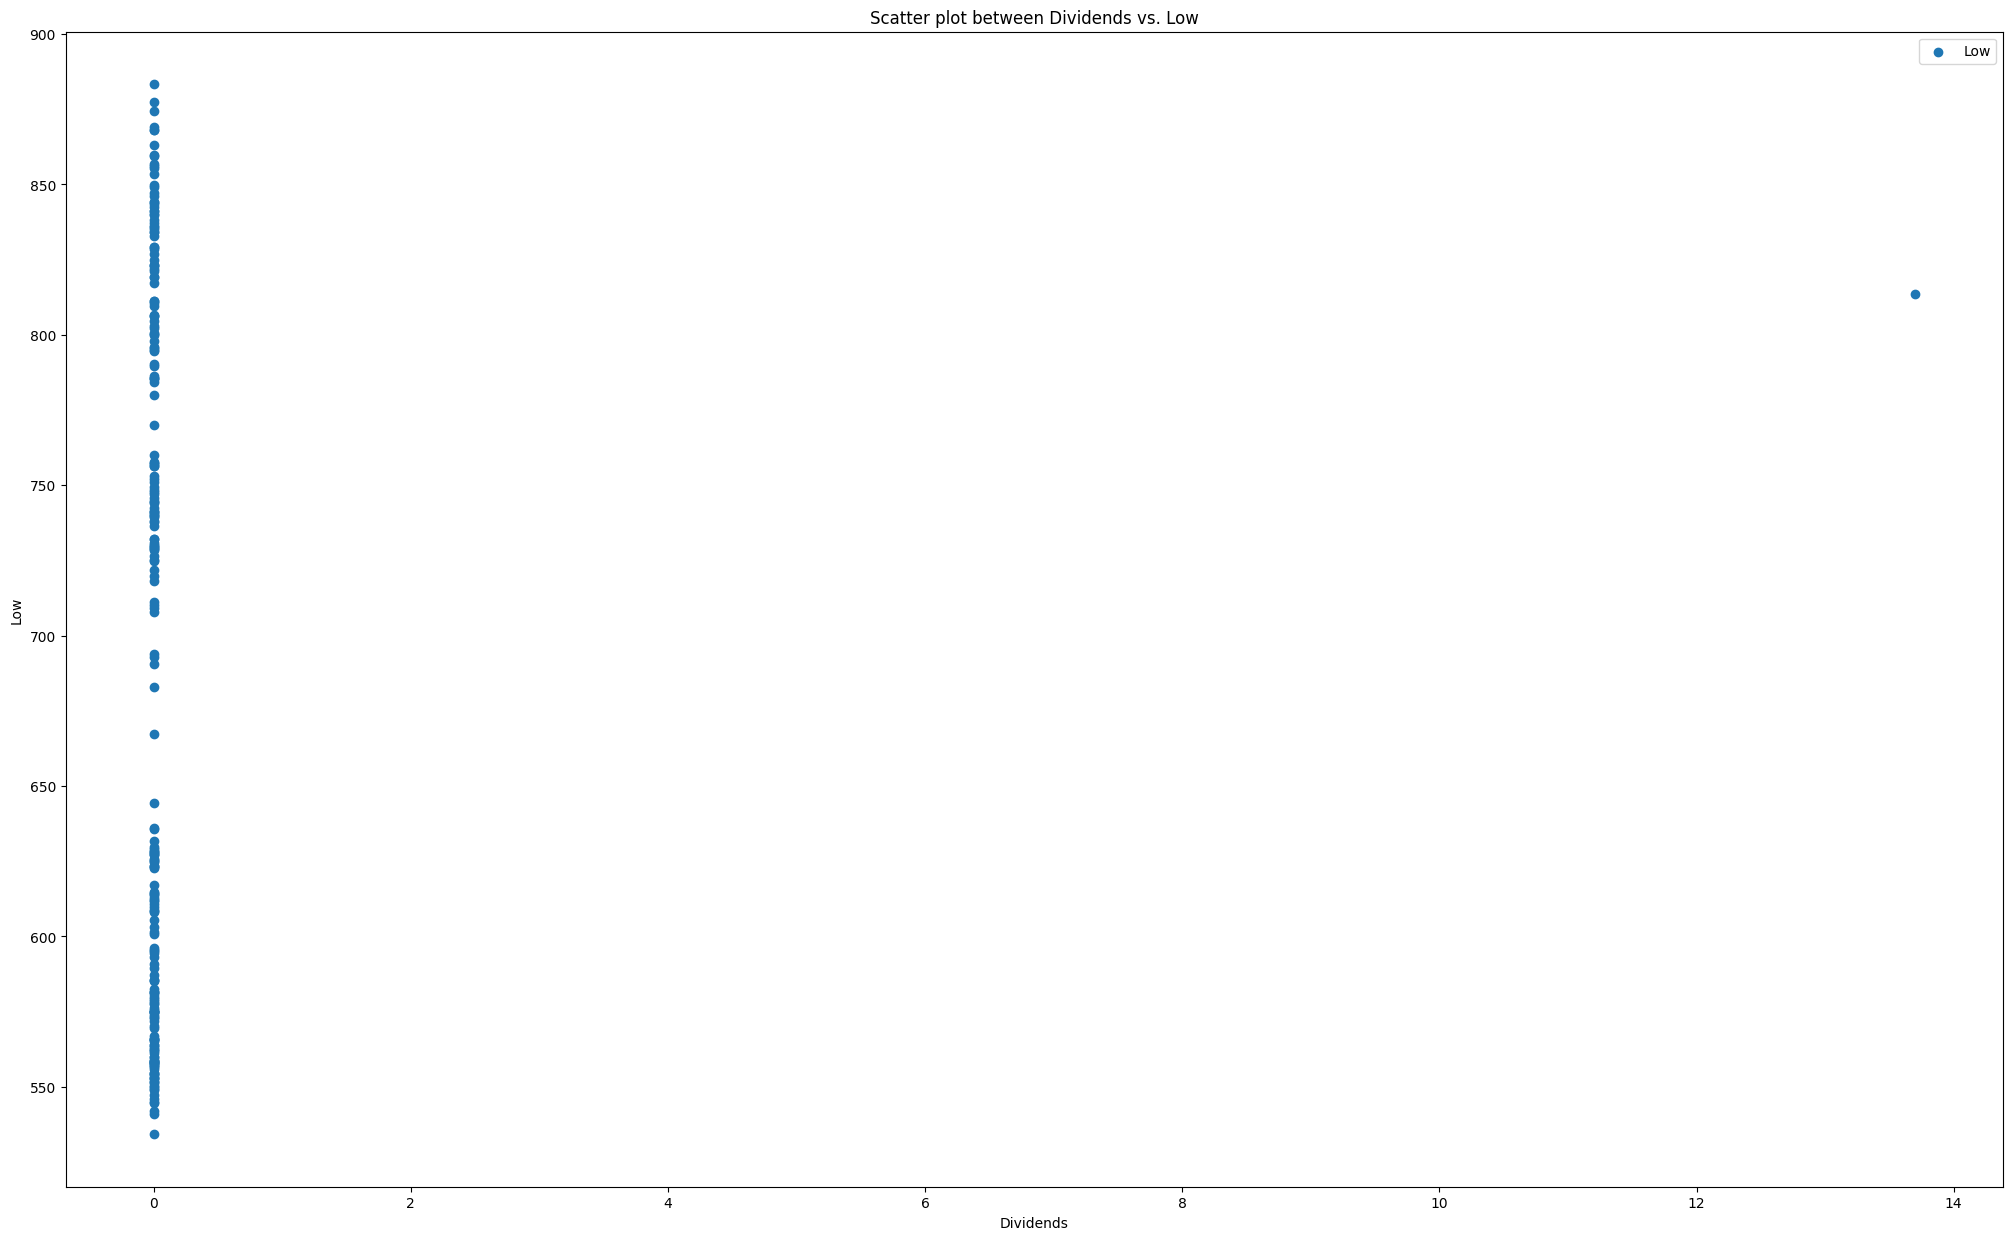

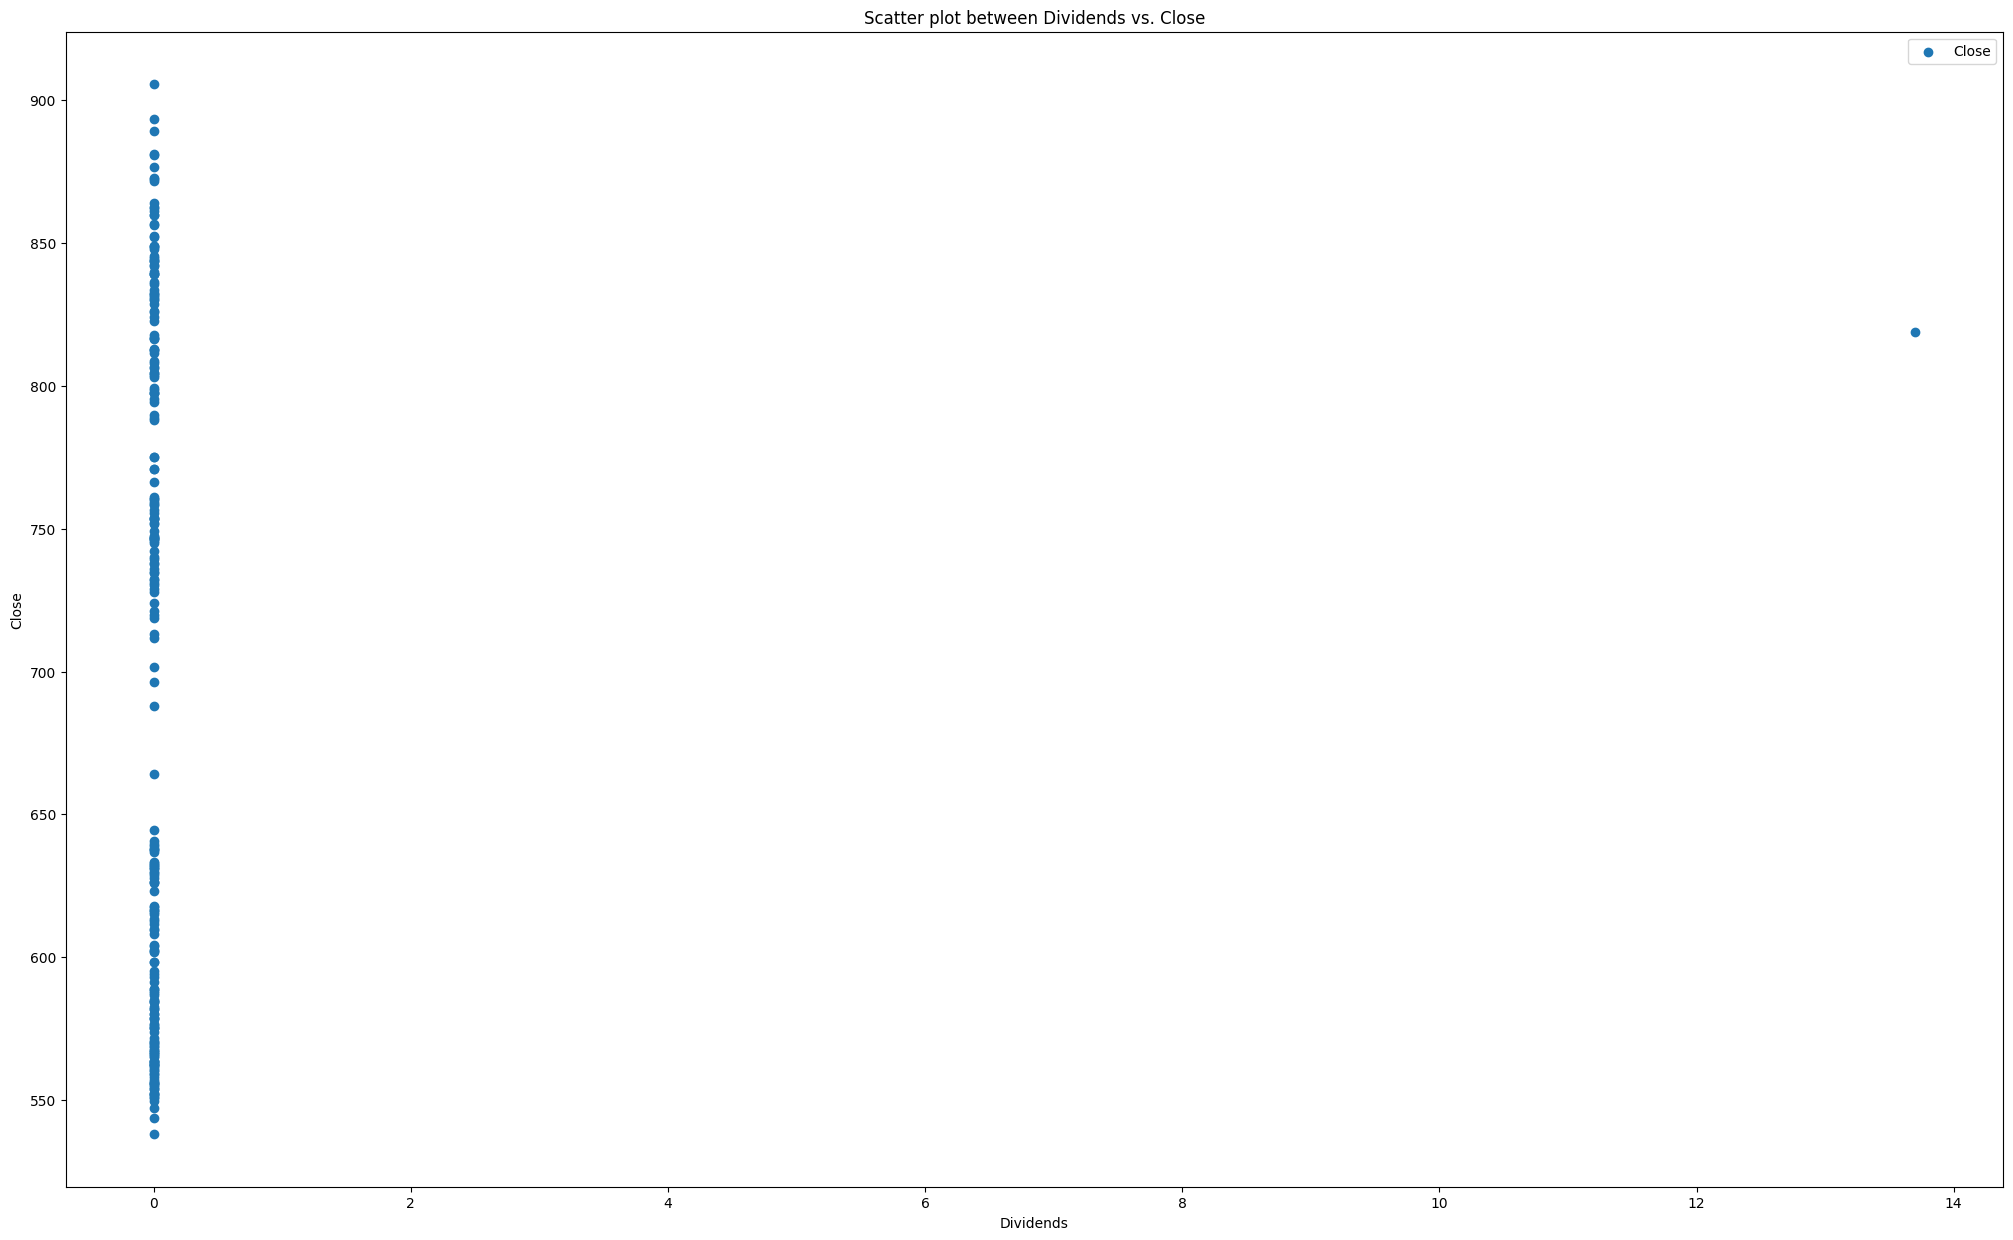

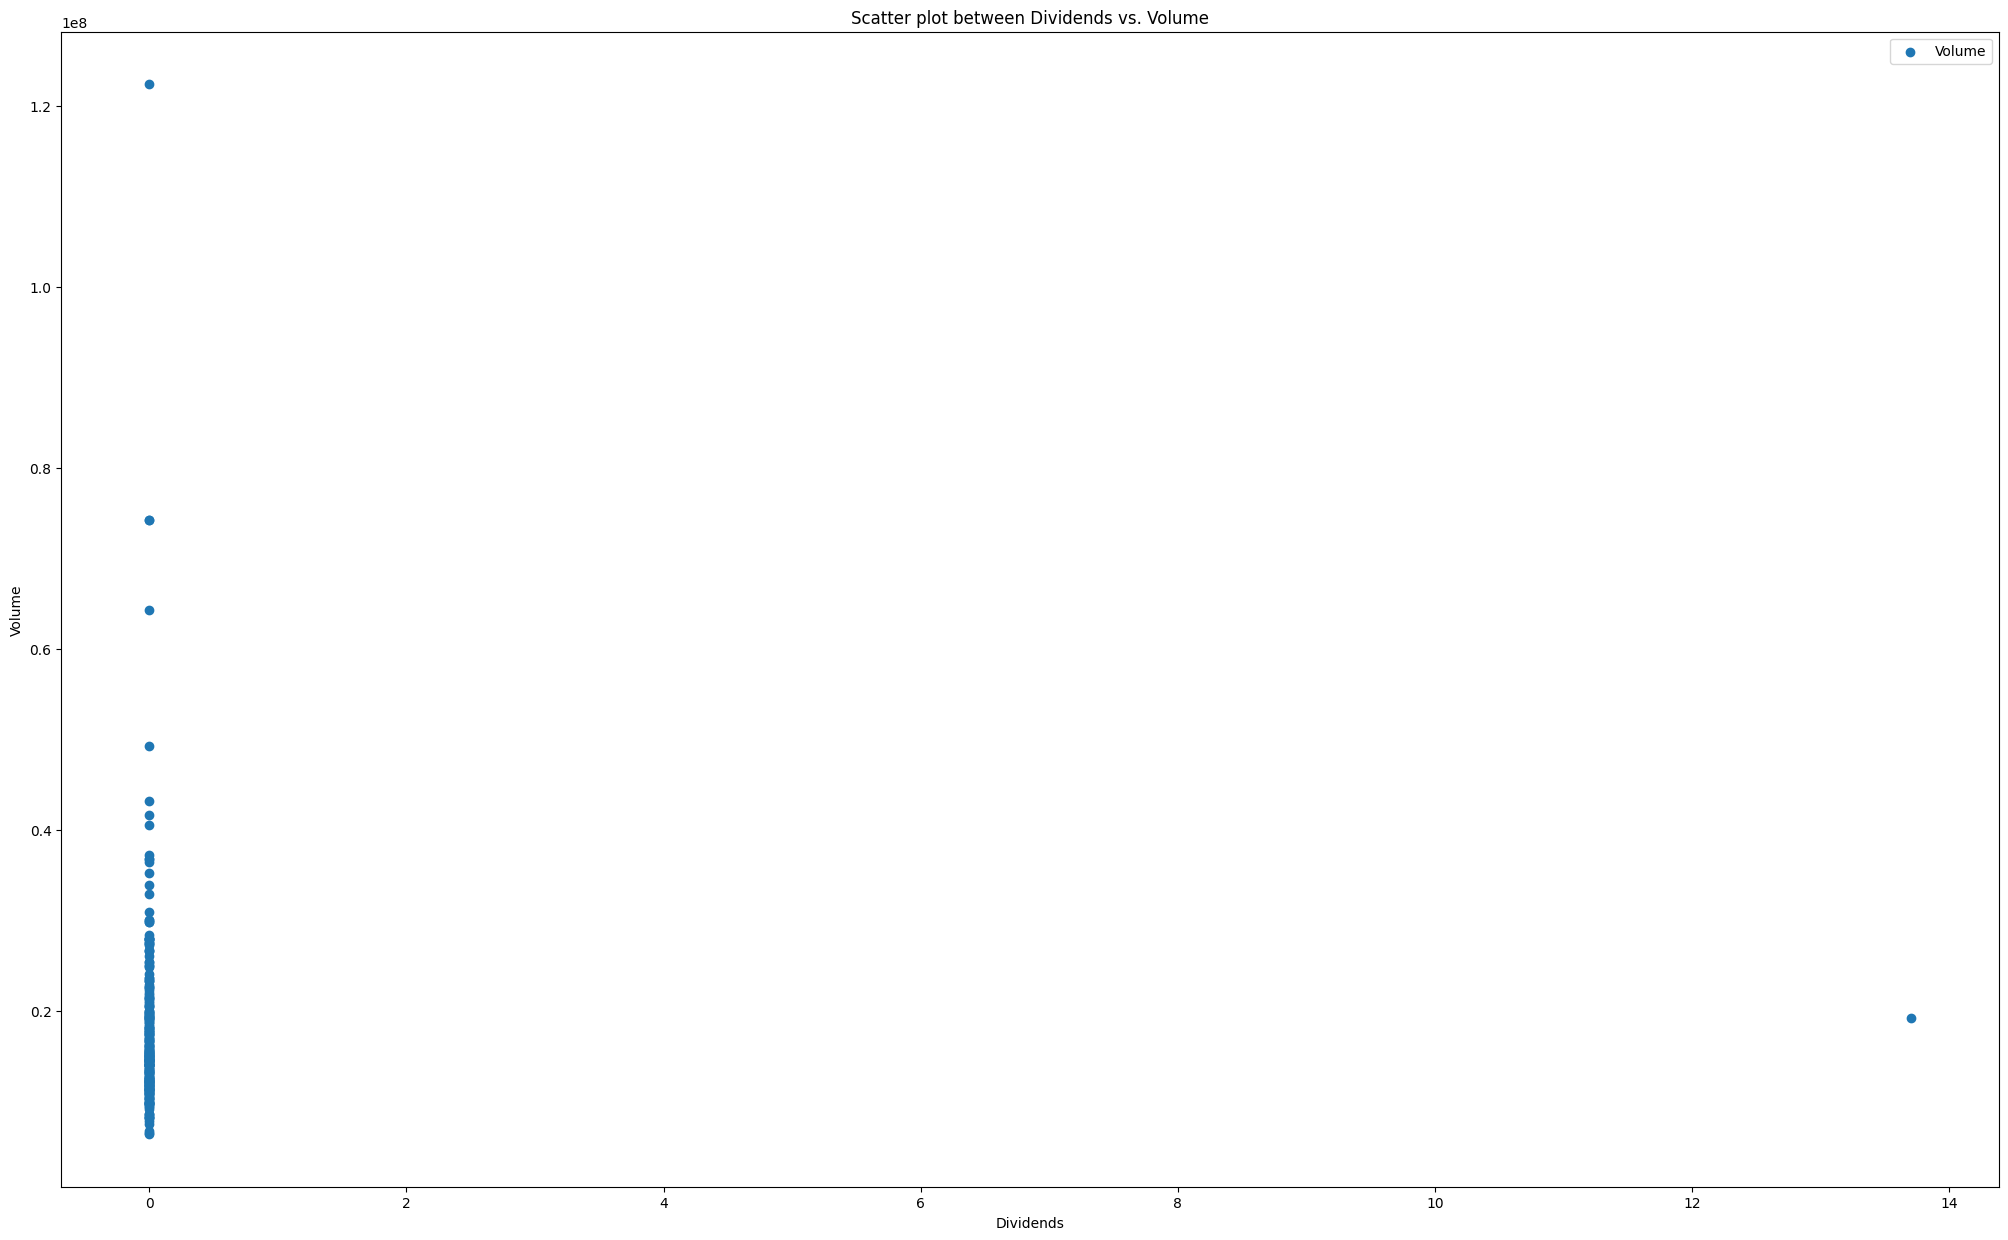

In [ ]:
from matplotlib.pyplot import scatter, figure, xlabel, ylabel, legend, show, title
for i in range(len(df.columns)):
    for column in df.columns:
        if column == df.columns[i]:
            continue
        figure(figsize=(25,15))
        scatter(df[df.columns[i]], df[column], label=column)
        xlabel(df.columns[i])
        ylabel(column)
        title(f"Scatter plot between {df.columns[i]} vs. {column}")
        legend()
        show()

In [ ]:
from matplotlib.pyplot import plot
for i in range(len(df.columns)):
    for column in df.columns:
        if column == df.columns[i]:
            continue
        figure(figsize=(25,15))
        plot(df[df.columns[i]], df[column], label=column)
        xlabel(df.columns[i])
        ylabel(column)
        title(f"Line plot between {df.columns[i]} vs. {column}")
        legend()
        show()

**Now let's see some of the categorical plots
like Bar plot and pie chart are used for categorical data.**

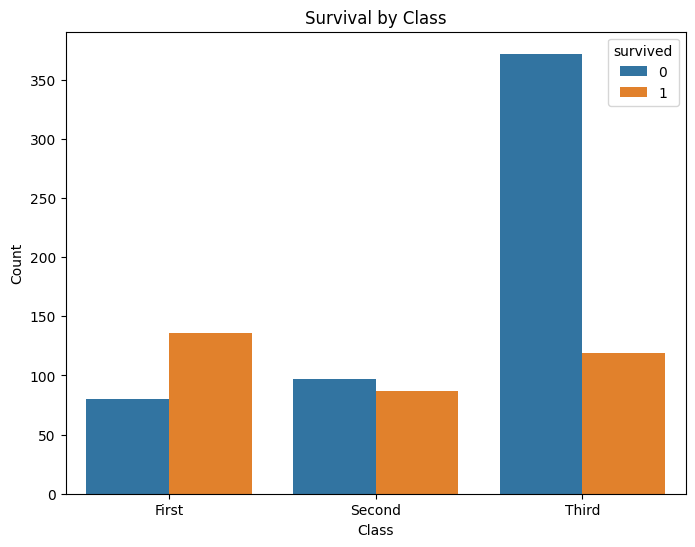

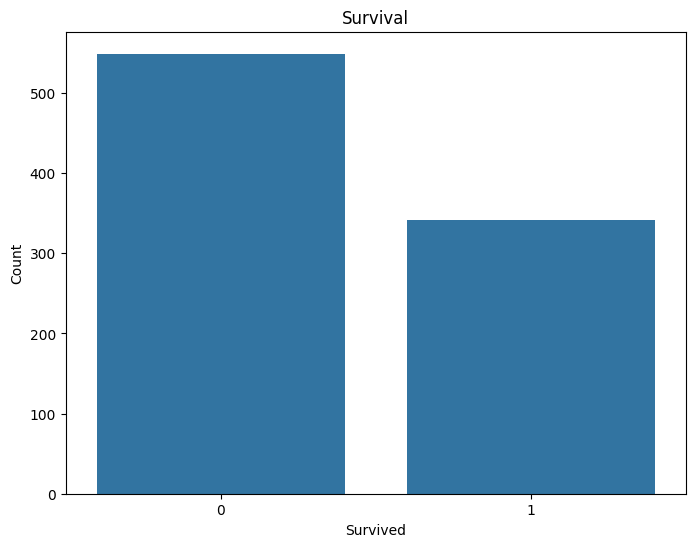

In [ ]:
from seaborn import load_dataset, countplot

# Load the Titanic dataset
titanic = load_dataset('titanic')

# Bar plot of survival by class
figure(figsize=(8, 6))
countplot(x='class', hue='survived', data=titanic)
title('Survival by Class')
xlabel('Class')
ylabel('Count')
show()

# bar chart of survival
figure(figsize=(8, 6))
countplot(x='survived', data=titanic)
title('Survival')
xlabel('Survived')
ylabel('Count')
show()

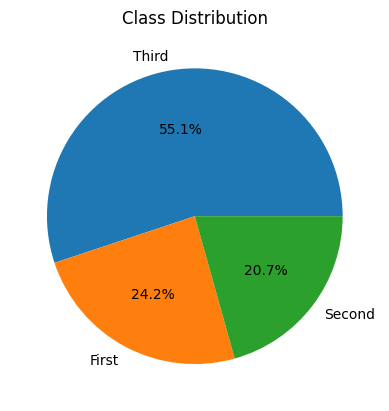

In [ ]:
from matplotlib.pyplot import pie
pie(titanic['class'].value_counts(), labels=titanic['class'].unique(), autopct='%1.1f%%')
title('Class Distribution')
show()

```
Both bar plot and pir chart calculates the frequency of categorical data and then shows the frequency vs class in visualization.

We better know that EDA is a approach of mindset that tries to extract the every bit of insight from data that may be relevant to use case. These were some approached based on the different data that may be encountered in datasets. We may have many different scenarios in which we may have to transform data for visualization. and for calculation of correlation matrix that all depends on data. The approach is to visualize each columns, then column vs column  and different configurations column will give different insights about data.
```

# 3. Plotting for Exploratory data analysis (EDA)

# (3.1) Basic Terminology

* What is EDA?
    - It is the process to apply statistics and plotting tools to understand how the dataset is distributed.
* Data-point/vector/Observation
* Data-set.
* Feature/Variable/Input-variable/Dependent-varibale
* Label/Indepdendent-variable/Output-varible/Class/Class-label/Response label
* Vector: 2-D, 3-D, 4-D,.... n-D

Q. What is a 1-D vector: Scalar



## Iris Flower dataset

Toy  Dataset: Iris Dataset: [https://en.wikipedia.org/wiki/Iris_flower_data_set]
* A simple dataset to learn the basics.
* 3 flowers of Iris species. [see images on wikipedia link above]
* 1936 by Ronald Fisher.
* Petal and Sepal: http://terpconnect.umd.edu/~petersd/666/html/iris_with_labels.jpg
*  Objective: Classify a new flower as belonging to one of the 3 classes given the 4 features.
* Importance of domain knowledge.
* Why use petal and sepal dimensions as features?
* Why do we not use 'color' as a feature?



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


'''downlaod iris.csv from https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv'''
#Load Iris.csv into a pandas dataFrame.
iris = pd.read_csv("iris.csv")



FileNotFoundError: [Errno 2] No such file or directory: 'iris.csv'

In [ ]:
# (Q) how many data-points and features?
print (iris.shape)

(150, 5)


In [ ]:
#(Q) What are the column names in our dataset?
print (iris.columns)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [ ]:
#(Q) How many data points for each class are present?
#(or) How many flowers for each species are present?

iris["species"].value_counts()
# balanced-dataset vs imbalanced datasets
#Iris is a balanced dataset as the number of data points for every class is 50.

virginica     50
setosa        50
versicolor    50
Name: species, dtype: int64

# (3.2) 2-D Scatter Plot

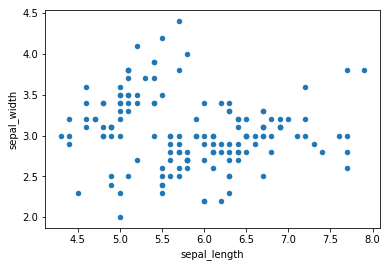

In [ ]:
#2-D scatter plot:
#ALWAYS understand the axis: labels and scale.

iris.plot(kind='scatter', x='sepal_length', y='sepal_width') ;
plt.show()

#cannot make much sense out it.
#What if we color the points by thier class-label/flower-type.

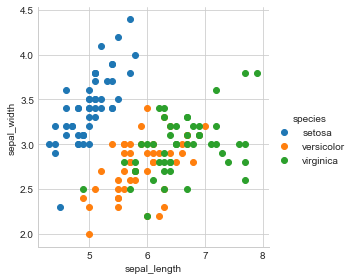

In [ ]:
# 2-D Scatter plot with color-coding for each flower type/class.
# Here 'sns' corresponds to seaborn.
sns.set_style("whitegrid");
sns.FacetGrid(iris, hue="species", size=4) \
   .map(plt.scatter, "sepal_length", "sepal_width") \
   .add_legend();
plt.show();

# Notice that the blue points can be easily seperated
# from red and green by drawing a line.
# But red and green data points cannot be easily seperated.
# Can we draw multiple 2-D scatter plots for each combination of features?
# How many cobinations exist? 4C2 = 6.

**Observation(s):**
1. Using sepal_length and sepal_width features, we can distinguish Setosa flowers from others.
2. Seperating Versicolor from Viginica is much harder as they have considerable overlap.

## 3D Scatter plot

https://plot.ly/pandas/3d-scatter-plots/

Needs a lot to mouse interaction to interpret data.

What about 4-D, 5-D or n-D scatter plot?

#  (3.3) Pair-plot

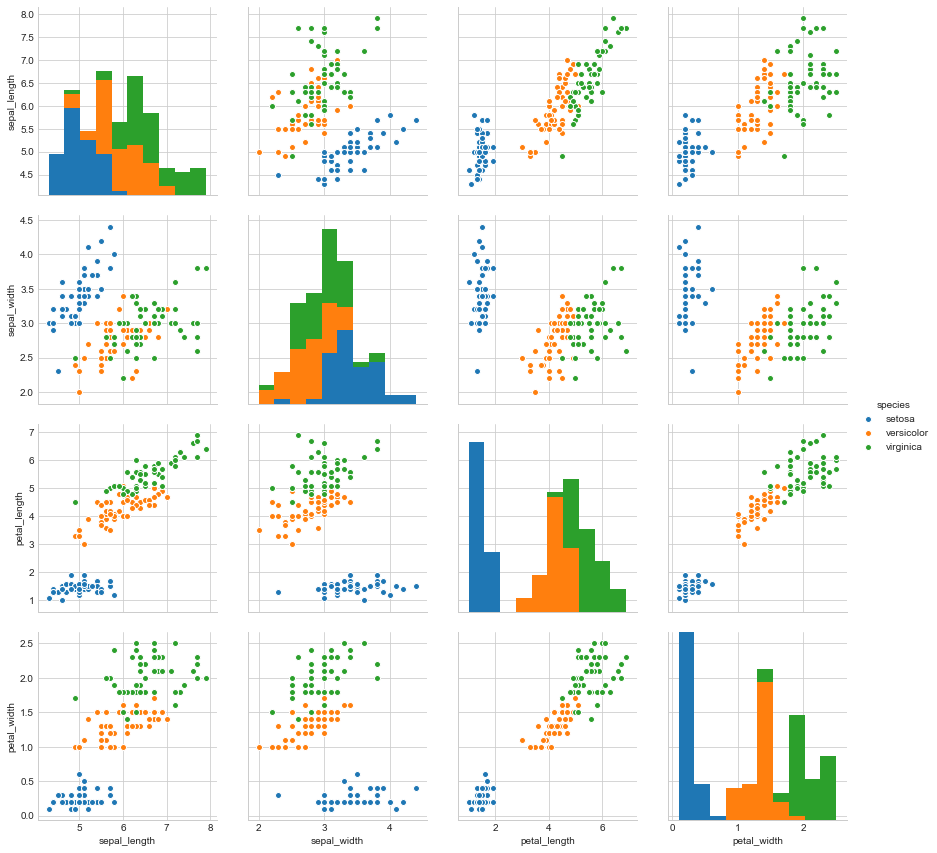

In [ ]:
# pairwise scatter plot: Pair-Plot
# Dis-advantages:
##Can be used when number of features are high.
##Cannot visualize higher dimensional patterns in 3-D and 4-D.
#Only possible to view 2D patterns.
plt.close();
sns.set_style("whitegrid");
sns.pairplot(iris, hue="species", size=3);
plt.show()
# NOTE: the diagnol elements are PDFs for each feature. PDFs are expalined below.

**Observations**
1. petal_length and petal_width are the most useful features to identify various flower types.
2. While Setosa can be easily identified (linearly seperable), Virnica and Versicolor have some overlap (almost linearly seperable).
3. We can find "lines" and "if-else" conditions to build a simple model to classify the flower types.

# (3.4) Histogram, PDF, CDF

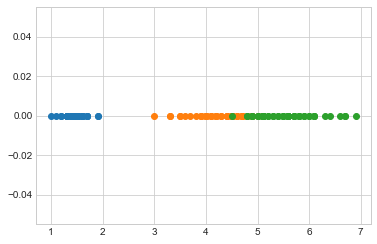

In [ ]:
# What about 1-D scatter plot using just one feature?
#1-D scatter plot of petal-length
import numpy as np
iris_setosa = iris.loc[iris["species"] == "setosa"];
iris_virginica = iris.loc[iris["species"] == "virginica"];
iris_versicolor = iris.loc[iris["species"] == "versicolor"];
#print(iris_setosa["petal_length"])
plt.plot(iris_setosa["petal_length"], np.zeros_like(iris_setosa['petal_length']), 'o')
plt.plot(iris_versicolor["petal_length"], np.zeros_like(iris_versicolor['petal_length']), 'o')
plt.plot(iris_virginica["petal_length"], np.zeros_like(iris_virginica['petal_length']), 'o')

plt.show()
#Disadvantages of 1-D scatter plot: Very hard to make sense as points
#are overlapping a lot.
#Are there better ways of visualizing 1-D scatter plots?

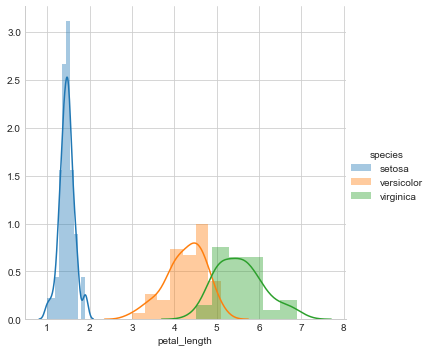

In [ ]:
sns.FacetGrid(iris, hue="species", size=5) \
   .map(sns.distplot, "petal_length") \
   .add_legend();
plt.show();



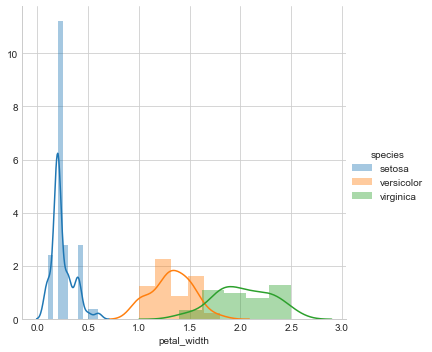

In [ ]:
sns.FacetGrid(iris, hue="species", size=5) \
   .map(sns.distplot, "petal_width") \
   .add_legend();
plt.show();

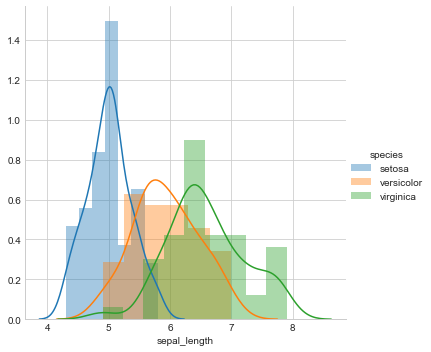

In [ ]:
sns.FacetGrid(iris, hue="species", size=5) \
   .map(sns.distplot, "sepal_length") \
   .add_legend();
plt.show();

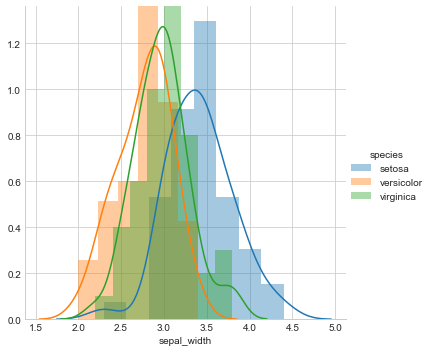

In [ ]:
sns.FacetGrid(iris, hue="species", size=5) \
   .map(sns.distplot, "sepal_width") \
   .add_legend();
plt.show();

In [ ]:
# Histograms and Probability Density Functions (PDF) using KDE
# How to compute PDFs using counts/frequencies of data points in each window.
# How window width effects the PDF plot.


# Interpreting a PDF:
## why is it called a density plot?
## Why is it called a probability plot?
## for each value of petal_length, what does the value on y-axis mean?
# Notice that we can write a simple if..else condition as if(petal_length) < 2.5 then flower type is setosa.
# Using just one feature, we can build a simple "model" suing if..else... statements.

# Disadv of PDF: Can we say what percentage of versicolor points have a petal_length of less than 5?

# Do some of these plots look like a bell-curve you studied in under-grad?
# Gaussian/Normal distribution.
# What is "normal" about normal distribution?
# e.g: Hieghts of male students in a class.
# One of the most frequent distributions in nature.


[ 0.02  0.02  0.04  0.14  0.24  0.28  0.14  0.08  0.    0.04]
[ 1.    1.09  1.18  1.27  1.36  1.45  1.54  1.63  1.72  1.81  1.9 ]


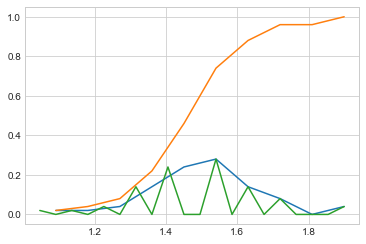

In [ ]:

# Need for Cumulative Distribution Function (CDF)
# We can visually see what percentage of versicolor flowers have a
# petal_length of less than 5?
# How to construct a CDF?
# How to read a CDF?

#Plot CDF of petal_length

counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=10,
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=20,
                                 density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);

plt.show();


[ 0.02  0.02  0.04  0.14  0.24  0.28  0.14  0.08  0.    0.04]
[ 1.    1.09  1.18  1.27  1.36  1.45  1.54  1.63  1.72  1.81  1.9 ]


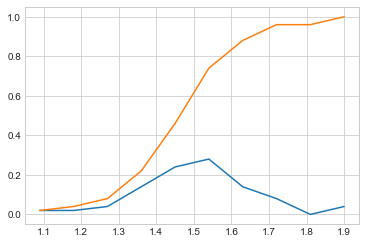

In [ ]:
# Need for Cumulative Distribution Function (CDF)
# We can visually see what percentage of versicolor flowers have a
# petal_length of less than 1.6?
# How to construct a CDF?
# How to read a CDF?

#Plot CDF of petal_length

counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=10,
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)



plt.show();

[ 0.02  0.02  0.04  0.14  0.24  0.28  0.14  0.08  0.    0.04]
[ 1.    1.09  1.18  1.27  1.36  1.45  1.54  1.63  1.72  1.81  1.9 ]
[ 0.02  0.1   0.24  0.08  0.18  0.16  0.1   0.04  0.02  0.06]
[ 4.5   4.74  4.98  5.22  5.46  5.7   5.94  6.18  6.42  6.66  6.9 ]
[ 0.02  0.04  0.06  0.04  0.16  0.14  0.12  0.2   0.14  0.08]
[ 3.    3.21  3.42  3.63  3.84  4.05  4.26  4.47  4.68  4.89  5.1 ]


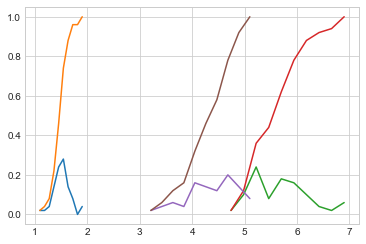

In [ ]:
# Plots of CDF of petal_length for various types of flowers.

# Misclassification error if you use petal_length only.

counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=10,
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


# virginica
counts, bin_edges = np.histogram(iris_virginica['petal_length'], bins=10,
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


#versicolor
counts, bin_edges = np.histogram(iris_versicolor['petal_length'], bins=10,
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


plt.show();

# (3.5) Mean, Variance and Std-dev

In [ ]:
#Mean, Variance, Std-deviation,
print("Means:")
print(np.mean(iris_setosa["petal_length"]))
#Mean with an outlier.
print(np.mean(np.append(iris_setosa["petal_length"],50)));
print(np.mean(iris_virginica["petal_length"]))
print(np.mean(iris_versicolor["petal_length"]))

print("\nStd-dev:");
print(np.std(iris_setosa["petal_length"]))
print(np.std(iris_virginica["petal_length"]))
print(np.std(iris_versicolor["petal_length"]))





Means:
1.464
2.41568627451
5.552
4.26

Std-dev:
0.171767284429
0.546347874527
0.465188133985


# (3.6) Median, Percentile, Quantile, IQR, MAD

In [ ]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(iris_setosa["petal_length"]))
#Median with an outlier
print(np.median(np.append(iris_setosa["petal_length"],50)));
print(np.median(iris_virginica["petal_length"]))
print(np.median(iris_versicolor["petal_length"]))


print("\nQuantiles:")
print(np.percentile(iris_setosa["petal_length"],np.arange(0, 100, 25)))
print(np.percentile(iris_virginica["petal_length"],np.arange(0, 100, 25)))
print(np.percentile(iris_versicolor["petal_length"], np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(iris_setosa["petal_length"],90))
print(np.percentile(iris_virginica["petal_length"],90))
print(np.percentile(iris_versicolor["petal_length"], 90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(iris_setosa["petal_length"]))
print(robust.mad(iris_virginica["petal_length"]))
print(robust.mad(iris_versicolor["petal_length"]))



Medians:
1.5
1.5
5.55
4.35

Quantiles:
[ 1.     1.4    1.5    1.575]
[ 4.5    5.1    5.55   5.875]
[ 3.    4.    4.35  4.6 ]

90th Percentiles:
1.7
6.31
4.8

Median Absolute Deviation
0.148260221851
0.667170998328
0.518910776477


# (3.7) Box plot and Whiskers

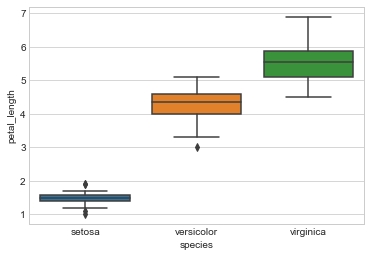

In [ ]:

#Box-plot with whiskers: another method of visualizing the  1-D scatter plot more intuitivey.
# The Concept of median, percentile, quantile.
# How to draw the box in the box-plot?
# How to draw whiskers: [no standard way] Could use min and max or use other complex statistical techniques.
# IQR like idea.

#NOTE: IN the plot below, a technique call inter-quartile range is used in plotting the whiskers.
#Whiskers in the plot below donot correposnd to the min and max values.

#Box-plot can be visualized as a PDF on the side-ways.

sns.boxplot(x='species',y='petal_length', data=iris)
plt.show()

# (3.8) Violin plots

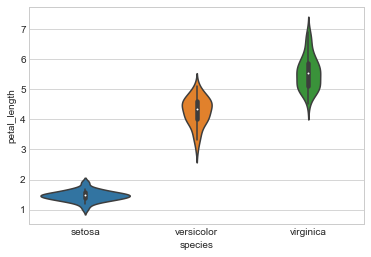

In [ ]:
# A violin plot combines the benefits of the previous two plots
#and simplifies them

# Denser regions of the data are fatter, and sparser ones thinner
#in a violin plot

sns.violinplot(x="species", y="petal_length", data=iris, size=8)
plt.show()

# (3.9) Summarizing plots in english
* Exaplain your findings/conclusions in plain english
* Never forget your objective (the probelm you are solving) . Perform all of your EDA aligned with your objectives.

# (3.10) Univariate, bivariate and multivariate analysis.

# (3.11) Multivariate probability density, contour plot.


In [ ]:
#2D Density plot, contors-plot
sns.jointplot(x="petal_length", y="petal_width", data=iris_setosa, kind="kde");
plt.show();


# (3.12) Exercise:

1. Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to donwload data. (https://www.kaggle.com/gilsousa/habermans-survival-data-set)
2. Perform a similar alanlaysis as above on this dataset with the following sections:
* High level statistics of the dataset: number of points, numer of   features, number of classes, data-points per class.
* Explain our objective.
* Perform Univaraite analysis(PDF, CDF, Boxplot, Voilin plots) to understand which features are useful towards classification.
* Perform Bi-variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in classfication.
* Write your observations in english as crisply and unambigously as possible. Always quantify your results.

## Different Techniques for EDA
-   Plotting: scatter plot (2D,3D,Pair Plots,PDF,CDf,box-plot,violin plot,contour plot)
-   Probability and Stats:
        1. counts, mean, std-dev, median,percentile,IQR(inter Quantile range)
        2. Distribution and skewness
        3. Correlations
        4. Hypothesis testing
    -  Visualising High Dimension data: PCA and t-sne
    -  Model Based , Rule Based ,Linear and logistic Regresssion , Feature Imp,Feature Colinearility
    -  cluster analysis
-   Questions(question that hepls to define the objective)
        1. different for different problems and different dataset
        2. pracctice on so many dataset
        3. High Level stats (asa above describe)
        4. Feature wise analysis:
            a. categorical feature , disttribution of categories
            b. Real value (distribution of feature)
            c. missing values and imputation
            d. outlier in feature value
        5. Feature vs output
            a. Correlation
            b. build model with only one feature
            c. P(Y_i=1|f_j=k)
        6. What other feature might work?
            i. Groupby + count on raw data
            ii. Binning features using Decision Tree
            iii. Intraction variable using DT.
            iv.Mathmetical transformation log,exp,sqr,box-cox
            v. Normalization , stdandization, one -hot encoding
            vii. Matrix Factorization based features
            vii. Autoencoder based features
            viii. clustring of features
            ix. different encoding W2V , tf-idf ...
        7. High dimension viz.
            i, are there clustering of in regirion where it perfrom badly?
            ii. why i am observing more error while classifying class-i and class_j
            iii. what example are messing model
        8. EDA on
            a. Text Data : word counts , like hood in naive bayes ,linear model and feature
            b. time series data: repeatation , fourier transform , maving averages
            c. image date: CNN featurization + tsne+see the raw images
            